# 📂 Labor Force Survery 2024
#### Goal: *Find what factors affect a person's employability*

___

### CSMODEL Major Course Output *Phase 1*

Members:
* AVELINO, Sophia Kylie
* BALINGIT, Andrei Luis
* WONG, Ching Man
* YOUNG, Cedric Francis

___

### Phase 1: data description, target research question, preprocessing, and exploratory data analysis

> Deliverables:
>
> A Jupyter Notebook containing all the data processing you did in the project. The Notebook should include Markdown
cells explaining each process, and highlighting the insights and conclusions. The Notebook should be structured in a
way that (1) is easy to understand, and (2) can be run sequentially to reproduce all outputs in your work.

---

## 📝 Section 1 - Dataset Description

### Section 1.1 - Introduction ###

This project entails exploring the Labor Force Survey (LFS) dataset, which is a nationwide survey of households every quarter that captures demographic and socio-economic information in regards to the current Labor Force of the Philippines. The primary purpose of the LFS is to obtain an estimate of employment and unemployment rates in the labor market and offer a quantitative framework for the formulation of labor market policies. The information encompasses a comprehensive range of individual and household characteristics for all the socio-economic factors.

The database, obtained from the Philippine Statistics Authority (PSA), contains records of a national sample of about 44,063 households (Batanes included) per round of surveys. It contains detailed data for each person in the households surveyed, namely demographic traits (age, sex, marital status), educational level, occupation, and work status. The reporting unit is the household, which in turn means that the statistics present the traits of people living in private households only and not those in institutions.

### Section 1.2 - Problem Statement 

The specific task we aim to address is a classification problem. In this notebook, we seek to predict whether an individual has worked in the past week(PUFC11_WORK) which is answered by a binary yes or no input, using the features provided in the LFS dataset. The target variable, PUFC11_WORK, is a binary variable indicating whether an individual has worked in the past week (Yes/No). This is a binary classification problem, where we aim to classify individuals into two groups: those who have worked and those who have not, based on their demographic and socio-economic characteristics. Thus, the goal of our models is to predict which of the two groups is a person a part of based on demographic variables, educational attainment, occupation, and household characteristics features provided by the LFS dataset. Namely, these feature columns are described as the following:

Included in the dataset is an Excel file titled 'lfs_march_2024_metadata(dictionary).xlsx' which contains a dictionary and a value set of the dataset. We have used the two in order to further understand and explore both the descriptions and categorical values of each feature provided. 

Considering this, we have categorized the features as below:

#### 1. Demographic Variables

* `PUFC04_SEX` → C04 - Sex
* `PUFC05_AGE` → C05 - Age as of Last Birthday
* `PUFC06_MSTAT` → C06 - Marital Status
* `PUFC03_REL` → C03 - Relationship to Household Head


#### 2. Household Characteristics

* `PUFREG` → Region
* `PUFHHNUM` → Household Unique Sequential Number
* `PUFHHSIZE` → Household Size
* `PUFC01_LNO` → Line Number (individual in household)


#### 3. Educational Attainment

* `PUFC07_GRADE` → C07 - Highest Grade Completed


#### 4. Migration & Overseas Work

* `PUFC08_CONWR` → C08 - Overseas Filipino Indicator


#### 5. Employment Status & Labor Force Participation

* `PUFC09_WORK` → C09 - Work Indicator
* `PUFC09A_WORK` → C09A - Work Arrangement
* `PUFC10_JOB` → C10 - Job Indicator
* `PUFC11A_PROVMUN` → C11 - Location of Work (Province, Municipality)
* `PUFC13_PROCC` → C13 - Major Occupation Group
* `PUFC15_PKB` → C15 - Major Industry Group
* `PUFC16_NATEM` → C16 - Nature of Employment
* `PUFC17_PNWHRS` → C17 - Normal Working Hours per Day
* `PUFC18_PHOURS` → C18 - Total Number of Hours Worked during the Past Week
* `PUFC19_PWMORE` → C19 - Wants More Hours of Work
* `PUFC20_PLADDW` → C20 - Looks for Additional Work
* `PUFC20B_FTWORK` → C20B - First Time Doing Any Work
* `PUFC21_PCLASS` → C21 - Class of Worker
* `PUFC22_OJOB` → C22 - Other Job Indicator
* `PUFC23_THOURS` → C23 - Total Hours Worked (All Jobs)
* `PUFC24_WWM48H` → C24 - Reason for Working >48 Hours
* `PUFC25_LOOKW` → C25 - Looked for Work or Tried to Start a Business
* `PUFC25B_FTWORK` → C25B - First Time Looking for Work
* `PUFC26_WYNOT` → C26 - Reason for Not Looking for Work
* `PUFC27_AVAIL` → C27 - Availability for Work
* `PUFC28_PREVJOB` → C28 - Previous Job Indicator
* `PUFC29_YEAR` → C29 - Last Worked (Year)
* `PUFC29_MONTH` → C29 - Last Worked (Month)
* `PUFC31_POCC` → C31 - Previous Occupation
* `PUFC33_QKB` → C33 - Kind of Business (Past Quarter)
* `PUFNEWEMPSTAT` → New Employment Criteria (Jul 2005)


#### 6. Survey Design & Weighting

* `PUFPWGTPRV` → Final Weight Based on Projection
* `PUFSVYMO` → Survey Month
* `PUFSVYYR` → Survey Year
* `PUFPSU` → PSU Number
* `PUFRPL` → Replicate

##  Labor Force Definition

The Philippine labor force is comprised of individuals aged 15 years and older who are either employed or unemployed. It includes those who are working, as well as those actively seeking work but currently without a job. The labor force is categorized into three broad sectors: agriculture, industry, and services. 

<br>

### NOT in the Labor Force

To further support the statement above, according to the included pdf file describing the dataset:

<br>

>persons not in the Labor Force are persons who are 15 years old and over who are neither employed nor unemployed according to the definitions mentioned. Those not in the labor force are persons who are not looking for work because of reasons such:
>
> - housekeeping,
> - schooling, and
> - permanent disability.
> 
> Examples of such are: housewives, students, persons with disability, or retired persons.

<br>

### So What?

By the definition of the Philippine Statistics Authority in the included PDF in their 2019 LFS Survey, there are only three explicitly defined classifications for the Labor Force in the Philippines:

1. Those who are `EMPLOYED` Employment Status
2. Those who are `UNEMPLOYED` Employment Status
3. Those who do not belong to either; `OUTSIDE THE LABOR FORCE` Employment Status

But we will see later on in this notebook that there exists a fourth category that we can implicitly infer: that is those who are *outside* the definition of both (1) the definition of the labor force and outside (2) the definition of those outside the labor force. We will later on call these instances as:

4. `NULL` Employment Status

### Section 1.3 - Libraries needed

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.stats import norm
from scipy.stats import chi2_contingency
from scipy import stats

plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.style.use('ggplot')

# autoreload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Section 1.4 - Importing LFS PUF March 2024.CSV

In [3]:
try:
    lfs_data = pd.read_csv("src/data/PHL-PSA-LFS-2024-03-PUF/LFS PUF March 2024.CSV")
except FileNotFoundError:
    print("Error: CSV file not found. Please make sure the file exists in the correct directory or provide the correct path.")
    exit()

## 🛀 Section 2 - Data Cleaning

### Section 2.1 - Research Questions

Given that the dataset from the Philippine Statistics Authority is a sample of the entire Filipino population's working class, we also want to investigate areas of the said sector with regards to how any of these factors have an effect on the likelihood of employment for each individual. With this in mind, the following is our main research question:

1. What demographic, educational, and work-related factors are significantly associated with a Filipino citizen's likelihood of being employed in and out of the Philippines?
    - or in simpler terms: **What factors affect a Filipino citizen's employability?**


This study examines demographic characteristics, educational attainment, and work-related variables to determine which factors are most associated with employment status in the Philippines and employment status of OFWs abroad.

### Section 2.2 - Data Pre-Processing

But before we can even proceed with analyzing such, we first must pre-process our dataset and prepare it for further analysis.

We shall start by checking for the raw data's data type per column, in order to understand what dataset we are handling.

In [4]:
lfs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44063 entries, 0 to 44062
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PUFREG           44063 non-null  int64  
 1   PUFHHNUM         44063 non-null  int64  
 2   PUFPWGTPRV       44063 non-null  float64
 3   PUFSVYMO         44063 non-null  int64  
 4   PUFSVYYR         44063 non-null  int64  
 5   PUFPSU           44063 non-null  int64  
 6   PUFRPL           44063 non-null  int64  
 7   PUFHHSIZE        44063 non-null  int64  
 8   PUFC01_LNO       44063 non-null  int64  
 9   PUFC03_REL       44063 non-null  int64  
 10  PUFC04_SEX       44063 non-null  int64  
 11  PUFC05_AGE       44063 non-null  int64  
 12  PUFC06_MSTAT     44063 non-null  object 
 13  PUFC07_GRADE     44063 non-null  object 
 14  PUFC08_CONWR     44063 non-null  object 
 15  PUFC09_WORK      44063 non-null  object 
 16  PUFC09A_WORK     44063 non-null  object 
 17  PUFC10_JOB  

---
Of interest to us, there are:
<ul><li>1 contains float values, </li>
<li>11 contain integer values, and </li>
<li><b>29 are object values</b>.</li></ul>


It is immediately evident now that there could be entries within the dataset that need to be processed because of the `object` datatype, and converted to some other attribute that could be mathematically analyzed.

---
Let's check for duplicates:

In [5]:
lfs_data.duplicated().sum()

np.int64(0)

No duplicates here, and therefore no cleaning is needed in this regard.

However, the dataset seems to contain null values in the form of whitespaces. Let's count those:

In [6]:
has_null = lfs_data.apply(lambda col: col.str.isspace().sum() if col.dtype == 'object' else 0)

print("Number Empty Cells:")
print(has_null[has_null > 0])

Number Empty Cells:
PUFC06_MSTAT        3009
PUFC07_GRADE        3009
PUFC08_CONWR       11539
PUFC09_WORK         3818
PUFC09A_WORK       24231
PUFC10_JOB         23650
PUFC11A_PROVMUN    24096
PUFC13_PROCC       24096
PUFC15_PKB         24096
PUFC16_NATEM       24215
PUFC17_PNWHRS      24215
PUFC18_PHOURS      24215
PUFC19_PWMORE      24215
PUFC20_PLADDW      24215
PUFC20B_FTWORK     24215
PUFC21_PCLASS      24215
PUFC22_OJOB        24215
PUFC23_THOURS      24215
PUFC24_WWM48H      34303
PUFC25_LOOKW       32196
PUFC25B_FTWORK     43587
PUFC26_WYNOT       32672
PUFC27_AVAIL       42875
PUFC28_PREVJOB     32196
PUFC29_YEAR        38375
PUFC29_MONTH       38375
PUFC31_POCC        38375
PUFC33_QKB         38375
PUFNEWEMPSTAT      12348
dtype: int64


We will analyze the dataset later on within this Notebook as to why there exists so much whitespaces in each column.

But for now, we shall standardize these whitespaces by replacing the values with -1:

In [7]:
lfs_data.replace(r"^\s+$", -1, regex=True, inplace=True)
nan_counts_per_column = lfs_data.isna().sum()
print(nan_counts_per_column[nan_counts_per_column > 0])

Series([], dtype: int64)


Now that these are -1, let's return to the data types, and find if our object columns from earlier are convertible to `integers` (or `float`) instead of `object`:

In [8]:
int_convertible_columns = []

for col in lfs_data.columns:
    if lfs_data[col].dtypes == 'object':  
        try:
            float_vals = lfs_data[col].dropna().astype(float)
            if (float_vals % 1 == 0).all():
                int_convertible_columns.append(col)
        except ValueError:
            pass 

print("Safely convertable to int:\n")
for i in range(0, len(int_convertible_columns), 5):
    line_items = int_convertible_columns[i : i + 5]
    print(line_items)

Safely convertable to int:

['PUFC06_MSTAT', 'PUFC07_GRADE', 'PUFC08_CONWR', 'PUFC09_WORK', 'PUFC09A_WORK']
['PUFC10_JOB', 'PUFC11A_PROVMUN', 'PUFC13_PROCC', 'PUFC15_PKB', 'PUFC16_NATEM']
['PUFC17_PNWHRS', 'PUFC18_PHOURS', 'PUFC19_PWMORE', 'PUFC20_PLADDW', 'PUFC20B_FTWORK']
['PUFC21_PCLASS', 'PUFC22_OJOB', 'PUFC23_THOURS', 'PUFC24_WWM48H', 'PUFC25_LOOKW']
['PUFC25B_FTWORK', 'PUFC26_WYNOT', 'PUFC27_AVAIL', 'PUFC28_PREVJOB', 'PUFC29_YEAR']
['PUFC29_MONTH', 'PUFC31_POCC', 'PUFC33_QKB', 'PUFNEWEMPSTAT']


In [9]:
for col in int_convertible_columns:
    lfs_data[col] = lfs_data[col].astype(int) 

---
Let's also apply the unique() function to our dataset.

In [10]:
lfs_data.apply(lambda x: x.nunique())

PUFREG                17
PUFHHNUM           11114
PUFPWGTPRV          9442
PUFSVYMO               1
PUFSVYYR               1
PUFPSU               536
PUFRPL                 7
PUFHHSIZE             17
PUFC01_LNO            20
PUFC03_REL            11
PUFC04_SEX             2
PUFC05_AGE           100
PUFC06_MSTAT           7
PUFC07_GRADE         308
PUFC08_CONWR           5
PUFC09_WORK            3
PUFC09A_WORK           6
PUFC10_JOB             4
PUFC11A_PROVMUN      762
PUFC13_PROCC          44
PUFC15_PKB            81
PUFC16_NATEM           4
PUFC17_PNWHRS         17
PUFC18_PHOURS         85
PUFC19_PWMORE          3
PUFC20_PLADDW          3
PUFC20B_FTWORK         3
PUFC21_PCLASS          8
PUFC22_OJOB            3
PUFC23_THOURS        100
PUFC24_WWM48H         18
PUFC25_LOOKW           3
PUFC25B_FTWORK         3
PUFC26_WYNOT          13
PUFC27_AVAIL           3
PUFC28_PREVJOB         3
PUFC29_YEAR           62
PUFC29_MONTH          14
PUFC31_POCC           44
PUFC33_QKB            79


If we cross-check these unique values with those within the included dictionary, we can see that all columns have exactly the same number of unique categories, except for the occasional +1 (Unknown/Null Values). This therefore proves that, at least in terms of inputted data, our dataset is clean.

And so now, if we recheck the datatypes of each of the columns within the dataset, we can see that they all have a specific type and not just `object`.

In [11]:
lfs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44063 entries, 0 to 44062
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PUFREG           44063 non-null  int64  
 1   PUFHHNUM         44063 non-null  int64  
 2   PUFPWGTPRV       44063 non-null  float64
 3   PUFSVYMO         44063 non-null  int64  
 4   PUFSVYYR         44063 non-null  int64  
 5   PUFPSU           44063 non-null  int64  
 6   PUFRPL           44063 non-null  int64  
 7   PUFHHSIZE        44063 non-null  int64  
 8   PUFC01_LNO       44063 non-null  int64  
 9   PUFC03_REL       44063 non-null  int64  
 10  PUFC04_SEX       44063 non-null  int64  
 11  PUFC05_AGE       44063 non-null  int64  
 12  PUFC06_MSTAT     44063 non-null  int64  
 13  PUFC07_GRADE     44063 non-null  int64  
 14  PUFC08_CONWR     44063 non-null  int64  
 15  PUFC09_WORK      44063 non-null  int64  
 16  PUFC09A_WORK     44063 non-null  int64  
 17  PUFC10_JOB  

Now that we have verified that most data on the dataset are superficially clean, we can now proceed with our EDA and process our data further from there.

### Section 2.3 - Exploratory Data Analysis

In writing the EDA portion of this notebook, it would be easiest for one to begin the investigation over the dataset by first looking at the correlation matrix and using that as a starting point.

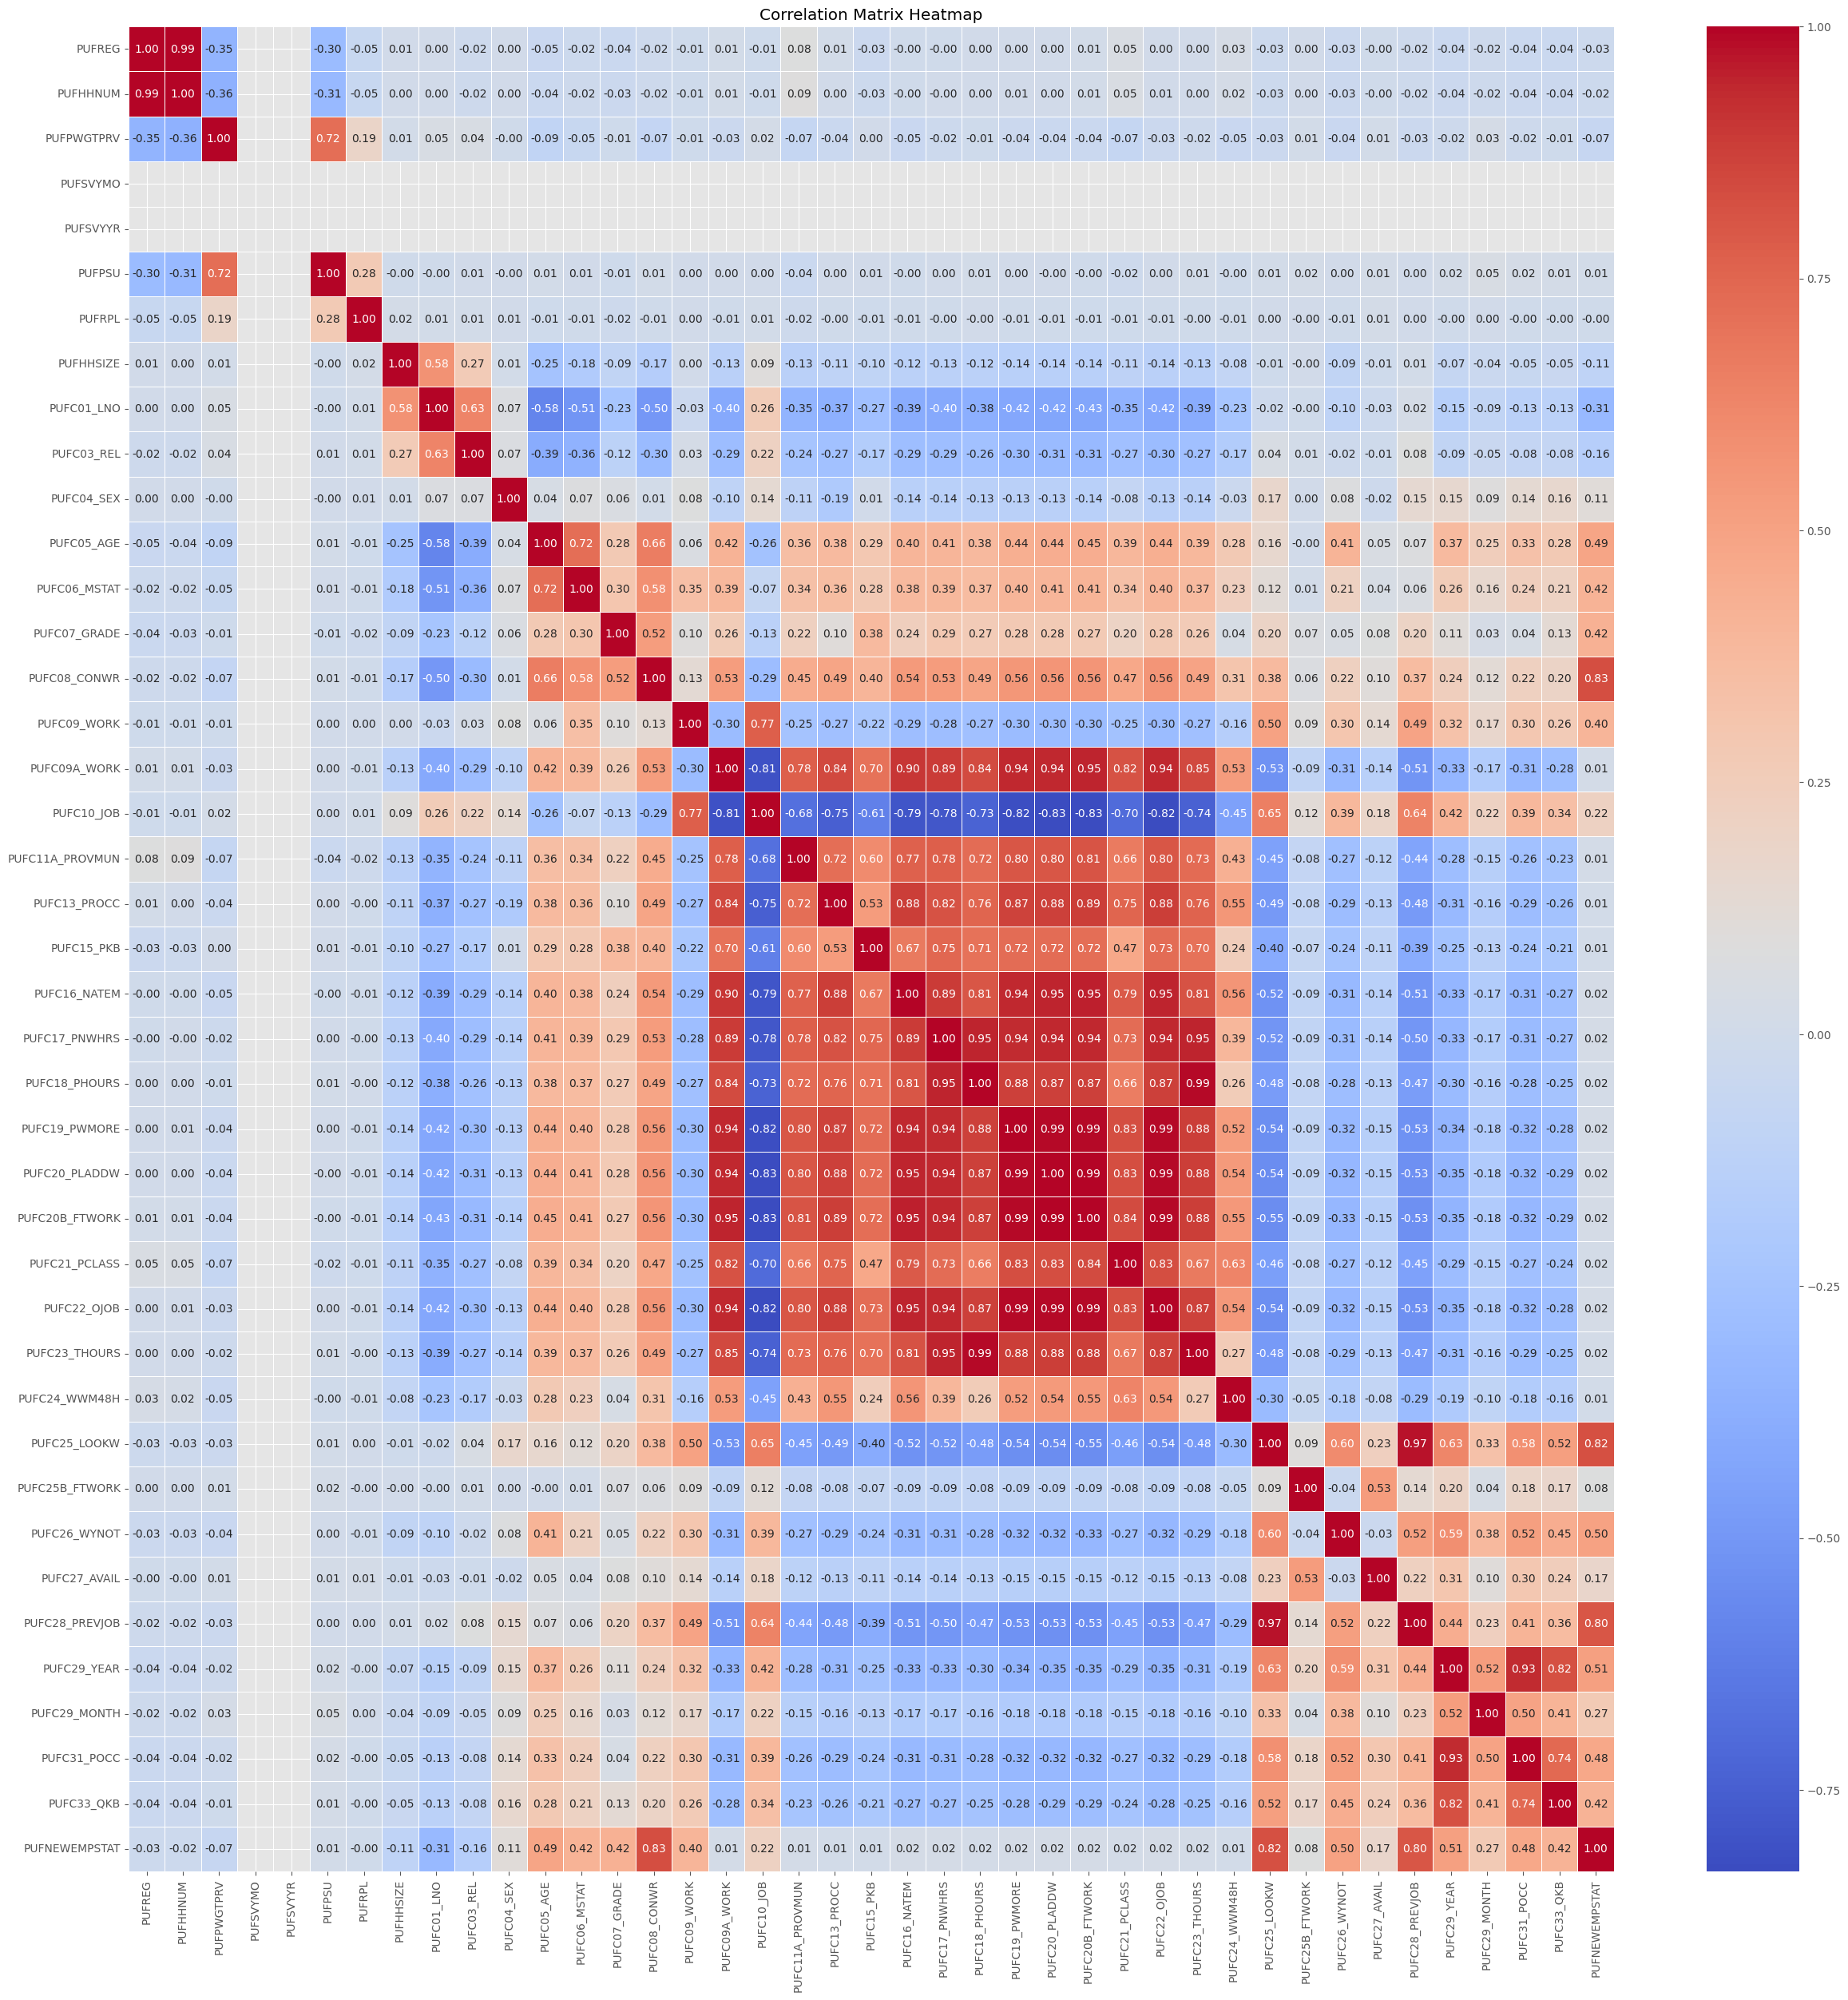

In [12]:
correlation_matrix = lfs_data.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

However, given that the one of our group members has already done a deep dive into the nooks and crannies of this dataset, specifically investigating the dataset's included column dictionary and survey questionnaire, we will be proceeding with the feature engineering of the columns with the said member's domain knowledge.

The primary point of interest, moving forward, is the `PUFNEWEMPSTAT` column which identifies the individual's employability by analyzing its complex, and often composite, relationships with other columns.

#### Section 2.3.1 - **Demographics & Employability**

##### *Research Sub-Question:*
* How do age, sex, marital status, and region influence the probability of being employed?
<br><br>
> ##### *Why This Matters:*
> * Demographic characteristics such as age, sex, marital status, and region often correlate with labor force participation and are foundational predictors in labor market analysis. These variables capture both social structures and systemic inequalities that may influence hiring, availability, and types of employment. Understanding these patterns allows for contextualizing broader employment trends in the Philippines.

Now, let us explore those different variables individually according to each individual's Employment status; whether they are employed or unemployed. **Let's start by observing the histogram according to age.**

##### Histogram of Age split by `Employed` vs. `Unemployed`

Displayed below are the aggregated histograms of the different categories of the dataset's *Employed/Unemployed status* in comparison to the *Age* of the individual. 

Looking at employment status alone gives you a number. But comparing it with age gives you a story about the challenges and opportunities within a society. It allows for a much deeper, more nuanced understanding that is essential for effective and equitable policymaking

By interpreting these descriptive statistics on the context of one's age, we can gain significant insights into the demographic characteristics of the workforce represented in this dataset. 

First, we shall copy the Labor Force Survey DataFrame into a temporary variable, in order for us to temporarily change the equivalent values of each of the entries.

> * -1 for Unknown Employment Status (previously denoted as "  " or some whitespace in the dataset)
>
> * 1 for Employed Individuals
>
> * 2 for Unemployed Individuals
> 
> * 3 for Individuals Not in the Labor Force

The latter 3 values came from the included dictionary Excel file of the dataset. The `-1` value is an imputation made in order to convert the entire column to become of integer64 data type.

We ought to separate the histograms for these four in order for us to better see the relationship of one's age is in relation to their current employment status.

In [13]:
df = lfs_data.copy()
df = df.rename(columns={
    'PUFC05_AGE': 'Age',
    'PUFNEWEMPSTAT': 'EmploymentStatus'
})

null_ages = df[df['EmploymentStatus'] == -1]['Age'].dropna()
employed_ages = df[df['EmploymentStatus'] == 1]['Age'].dropna()
unemployed_ages = df[df['EmploymentStatus'] == 2]['Age'].dropna()
not_in_labor_force_ages = df[df['EmploymentStatus'] == 3]['Age'].dropna()

In order to properly overlay the different histograms according to age, we shall combine all age series into a single series and create consistent bins for such.

In [14]:
all_ages_for_bins = pd.concat([null_ages, employed_ages, unemployed_ages, not_in_labor_force_ages]).dropna()
min_age = int(all_ages_for_bins.min())
max_age = int(all_ages_for_bins.max())

common_bins = np.linspace(min_age, max_age, 100)

All that's left to do is to actually plot the age distributions split by employment status and display statistics for each status.

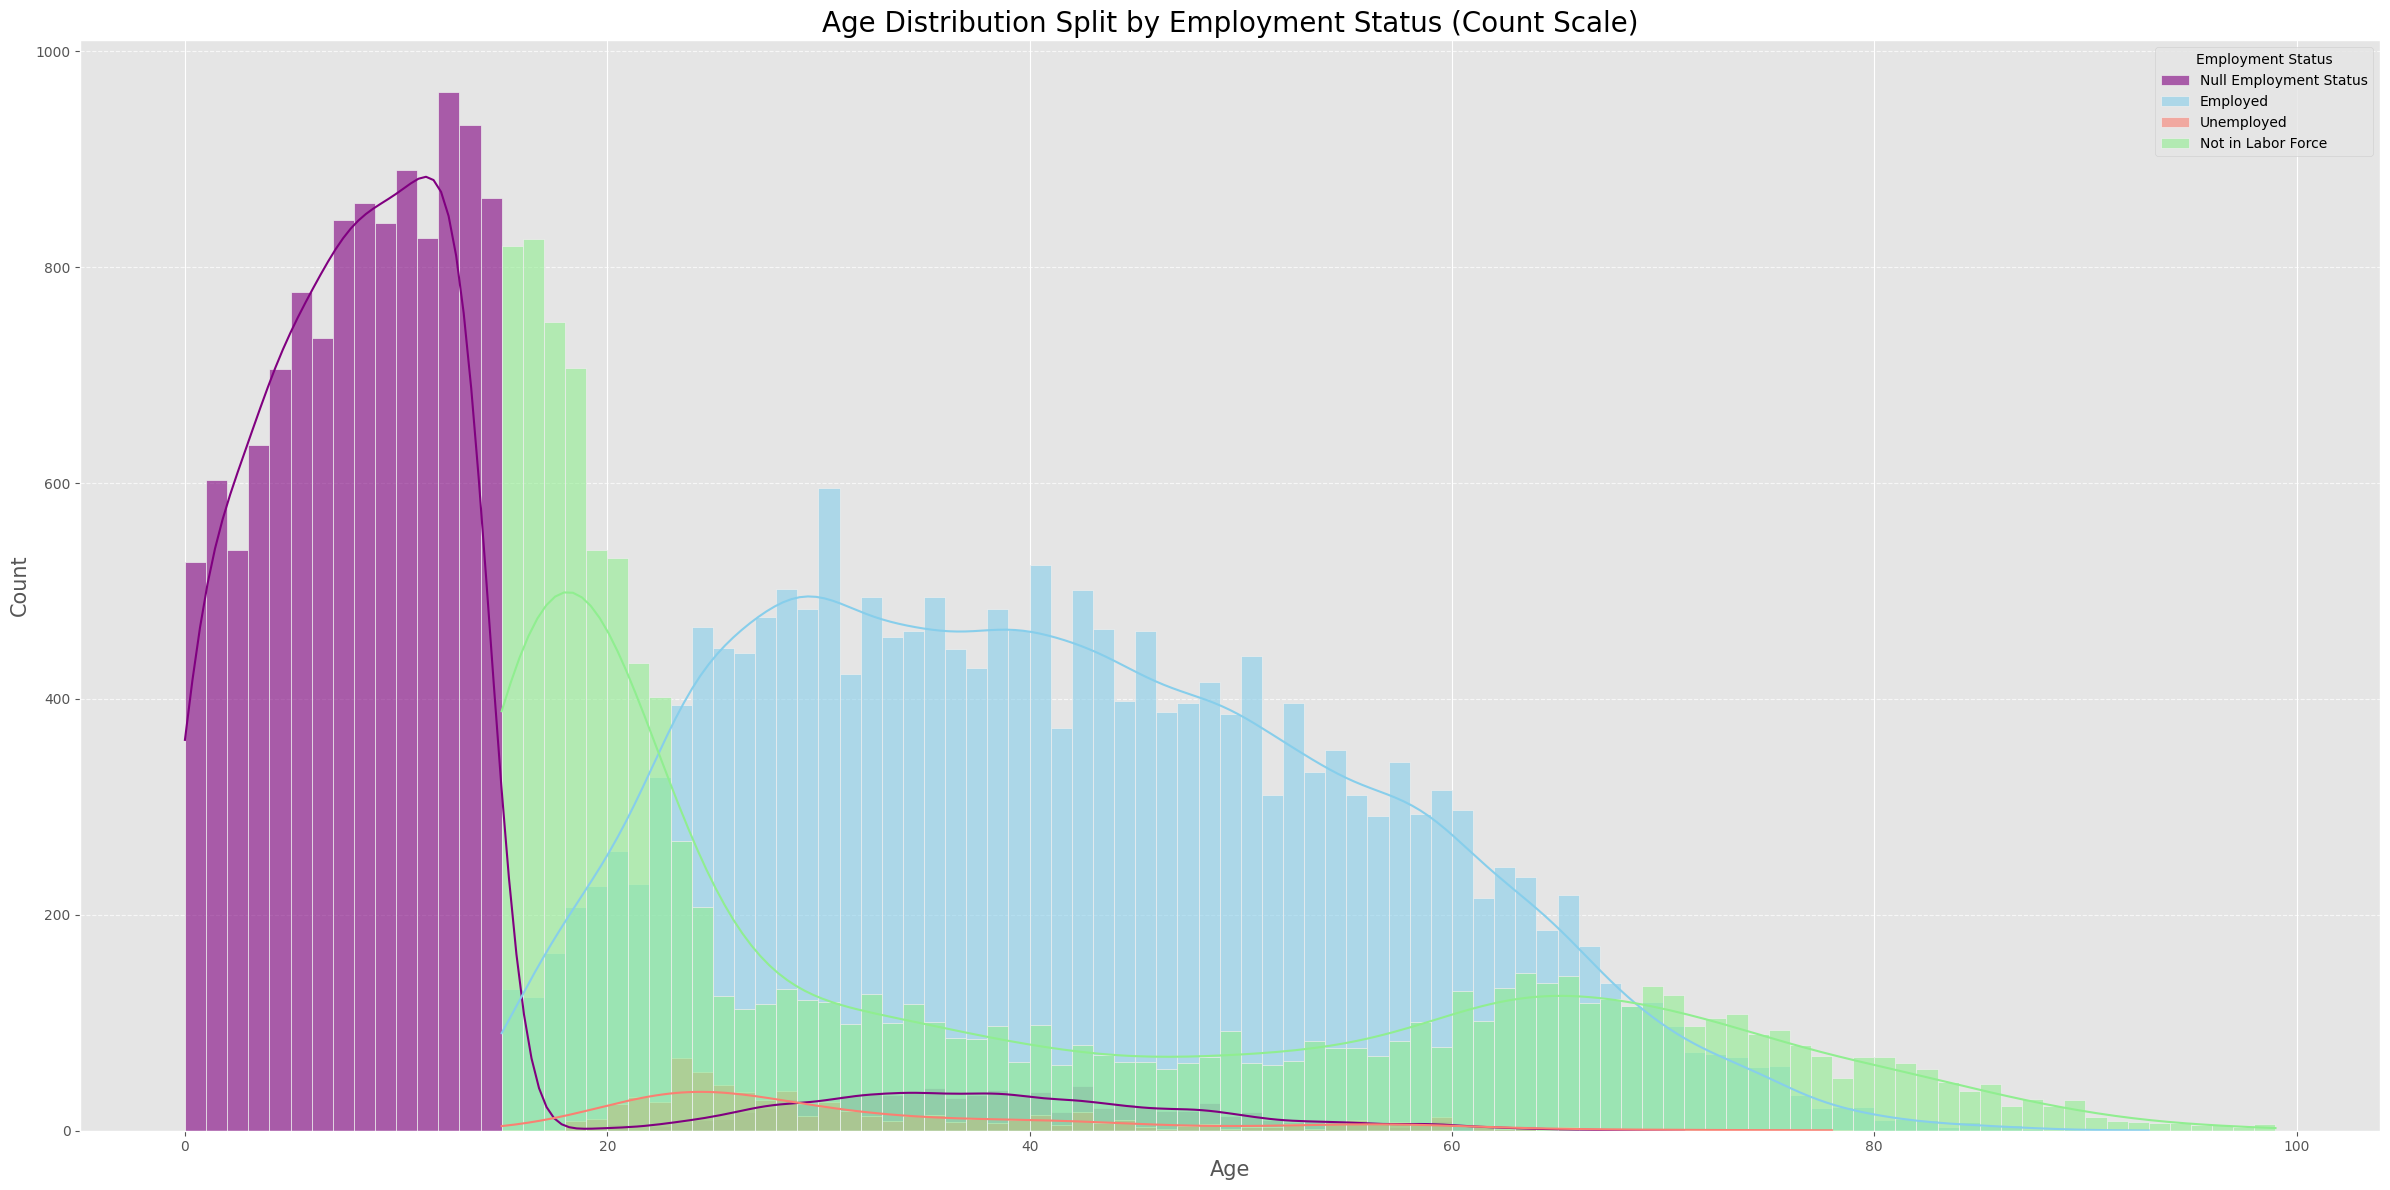

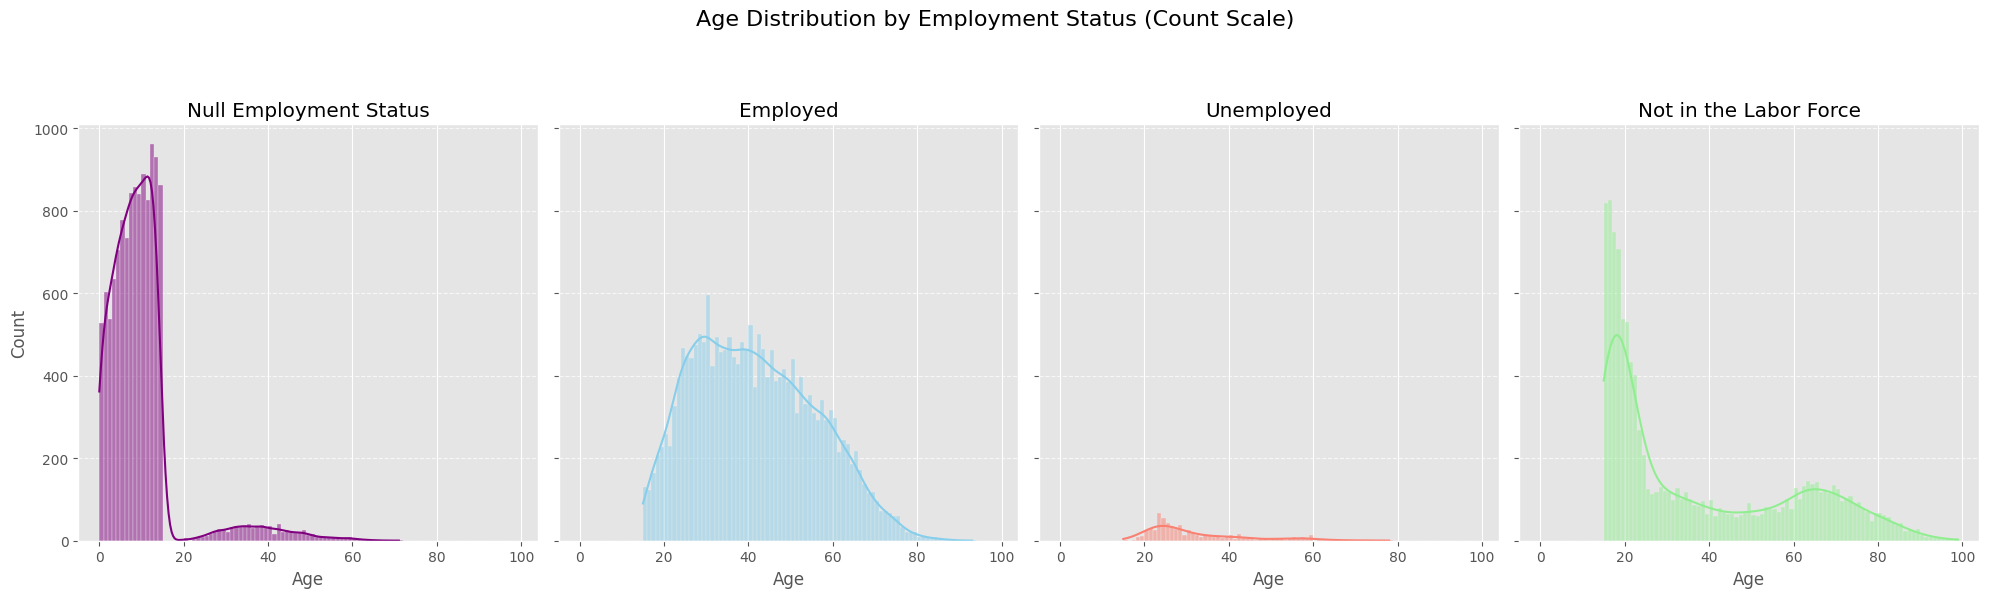

In [15]:
plt.figure(figsize=(24, 12))

plot_stat = 'count'

sns.histplot(null_ages, bins=common_bins, color='purple', label='Null Employment Status', alpha=0.6, kde=True, stat=plot_stat)
sns.histplot(employed_ages, bins=common_bins, color='skyblue', label='Employed', alpha=0.6, kde=True, stat=plot_stat)
sns.histplot(unemployed_ages, bins=common_bins, color='salmon', label='Unemployed', alpha=0.6, kde=True, stat=plot_stat)
sns.histplot(not_in_labor_force_ages, bins=common_bins, color='lightgreen', label='Not in Labor Force', alpha=0.6, kde=True, stat=plot_stat)

plt.title(f'Age Distribution Split by Employment Status ({plot_stat.capitalize()} Scale)', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel(f'{plot_stat.capitalize()}', fontsize=15)
plt.legend(title='Employment Status', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# show individual plots for each employment status for better clarity in comparison
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True) # 4 subplots

# plot for Null Employment Status
sns.histplot(null_ages, bins=common_bins, color='purple', kde=True, ax=axes[0], stat=plot_stat)
axes[0].set_title('Null Employment Status')
axes[0].set_xlabel('Age')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# plot for Employed
sns.histplot(employed_ages, bins=common_bins, color='skyblue', kde=True, ax=axes[1], stat=plot_stat)
axes[1].set_title('Employed')
axes[1].set_xlabel('Age')
axes[1].set_ylabel(f'{plot_stat.capitalize()}')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# plot for Unemployed
sns.histplot(unemployed_ages, bins=common_bins, color='salmon', kde=True, ax=axes[2], stat=plot_stat)
axes[2].set_title('Unemployed')
axes[2].set_xlabel('Age')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# plot for Not in Labor Force
sns.histplot(not_in_labor_force_ages, bins=common_bins, color='lightgreen', kde=True, ax=axes[3], stat=plot_stat)
axes[3].set_title('Not in the Labor Force')
axes[3].set_xlabel('Age')
axes[3].grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle(f'Age Distribution by Employment Status ({plot_stat.capitalize()} Scale)', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

All these charts 

In [16]:
def classify_PUFNEWEMPSTAT(code):
    if code == 1:
        return 'Employed'
    elif code == 2:
        return 'Unemployed'
    elif code == 3:
        return 'Not in the Labor Force'
    else:
        return 'Unknown'

def classify_education(code):
    if 0 <= code <= 2000:
        return 'No Grade Completed'
    elif 10011 <= code <= 10015 or 10004 <= code <= 10006:
        return 'Elementary Undergraduate'
    elif 10016 <= code <= 10018:
        return 'Elementary Graduate'
    elif 24011 <= code <= 24013 or 24004 <= code <= 24006:
        return 'Junior High School Undergraduate'
    elif code == 24015:
        return 'Junior High School Graduate'
    elif code in [34011, 34021, 34031, 35011]:
        return 'Senior High School Undergraduate'
    elif code in [34013, 34023, 34033, 35013]:
        return 'Senior High School Graduate'
    elif 40001 <= code <= 40003 or 50001 <= code <= 50003:
        return 'Post Secondary Undergraduate'
    elif 40011 <= code <= 49999 or 50011 <= code <= 59999:
        return 'Post Secondary Graduate'
    elif 60001 <= code <= 60006:
        return 'College Undergraduate'
    elif 60000 <= code <= 89999:
        return 'College Graduate'
    else:
        return 'Unknown'

def classify_PUFC09_WORK(code):
    if code == 1:
        return 'Looking for Work'
    elif code == 2:
        return 'Not Looking for Work'
    else:
        return 'Unknown'
    
def classify_PUFC09A_WORK(code):
    if code == 1:
        return 'Working in the default place of work except home'
    elif code == 2:
        return 'Telecommuting/work from home'
    elif code == 3:
        return 'Home-based work'
    elif code == 4:
        return 'On job rotation'
    elif code == 5:
        return 'On a mixed mode working arrangement'
    elif code == 6:
        return 'On reduced hours'
    else:
        return 'Unknown'
    
def classify_PUFC10_JOB(code):
    if code == 1:
        return 'Has a Job'
    elif code == 2:
        return 'Does not have a Job'
    elif code == 3:
        return 'Temporarily does not have a Job'
    else:
        return 'Unknown'

def classify_PUFC16_NATEM(code):
    if code == 1:
        return 'Permanent Job'
    elif code == 2:
        return 'Short Term Job'
    elif code == 3:
        return 'Different Employer'
    else:
        return 'Unknown'

def classify_PUFC19_PWMORE(code):
    if code == 1:
        return 'Wants More Work'
    elif code == 2:
        return 'Does Not Want More Work'
    else:
        return 'Unknown'

def classify_PUFC26_WYNOT(code):
    if code == 0:
        return 'ECQ/Lockdown/Covid-19 Pandemic'
    elif code == 1:
        return 'Tired/Believe no Work Available'
    elif code == 2:
        return 'Awaiting Results of Previous Job Application'
    elif code == 3:
        return 'Temporary Illness/Disability'
    elif code == 4:
        return 'Bad Weather'
    elif code == 5:
        return 'Wait for rehire/Job Recall'
    elif code == 61:
        return 'Too young/old'
    elif code == 62:
        return 'Retired'
    elif code == 63:
        return 'Permanent disability'
    elif code == 7:
        return 'Household, family duties'
    elif code == 8:
        return 'Schooling'
    elif code == 9:
        return 'Others'
    else:
        return 'Unknown'

In [17]:
pd.set_option('display.max_rows', None)

filtered_data = lfs_data[lfs_data['PUFNEWEMPSTAT'] == -1].sort_values(by='PUFC05_AGE', ascending=False)

filtered_data['Age'] = filtered_data['PUFC05_AGE']
filtered_data['Employment_Status'] = filtered_data['PUFNEWEMPSTAT'].apply(classify_PUFNEWEMPSTAT)
filtered_data['Education_Level'] = filtered_data['PUFC07_GRADE'].apply(classify_education)
filtered_data['Work_Indicator'] = filtered_data['PUFC09_WORK'].apply(classify_PUFC09_WORK)
filtered_data['Work_Arrangement'] = filtered_data['PUFC09A_WORK'].apply(classify_PUFC09A_WORK)
filtered_data['Job_Indicator'] = filtered_data['PUFC10_JOB'].apply(classify_PUFC10_JOB)
filtered_data['Nature_of_Employment'] = filtered_data['PUFC16_NATEM'].apply(classify_PUFC16_NATEM)
filtered_data['Want_More_Work_Hours'] = filtered_data['PUFC19_PWMORE'].apply(classify_PUFC19_PWMORE)
filtered_data['Reason_for_not_Looking_for_Work'] = filtered_data['PUFC26_WYNOT'].apply(classify_PUFC26_WYNOT)

display_columns = ['Age', 'Employment_Status', 'Education_Level',
                   'Work_Indicator', 'Work_Arrangement', 'Job_Indicator',
                   'Nature_of_Employment', 'Want_More_Work_Hours', 
                   'Reason_for_not_Looking_for_Work']


# print(filtered_data[display_columns])

print("Employment_Status: ", filtered_data['Employment_Status'].unique())
print("Age: ", filtered_data['Age'].unique())
print("Education_Level: ", filtered_data['Education_Level'].unique())
print("Work_Indicator: ", filtered_data['Work_Indicator'].unique())
print("Work_Arrangement: ", filtered_data['Work_Arrangement'].unique())
print("Job_Indicator: ", filtered_data['Job_Indicator'].unique())
print("Nature_of_Employment: ", filtered_data['Nature_of_Employment'].unique())
print("Want_More_Work_Hours: ", filtered_data['Want_More_Work_Hours'].unique())
print("Reason_for_not_Looking_for_Work: ", filtered_data['Reason_for_not_Looking_for_Work'].unique())

Employment_Status:  ['Unknown']
Age:  [71 68 66 65 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48 47 46 45 44
 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23 22 20 14
 13 12 11 10  9  8  7  6  5  4  3  2  1  0]
Education_Level:  ['College Undergraduate' 'Junior High School Graduate' 'College Graduate'
 'Elementary Undergraduate' 'Junior High School Undergraduate'
 'No Grade Completed' 'Post Secondary Graduate' 'Elementary Graduate'
 'Senior High School Graduate' 'Unknown']
Work_Indicator:  ['Unknown' 'Not Looking for Work' 'Looking for Work']
Work_Arrangement:  ['Unknown' 'Working in the default place of work except home'
 'Home-based work']
Job_Indicator:  ['Unknown' 'Does not have a Job' 'Temporarily does not have a Job']
Nature_of_Employment:  ['Unknown']
Want_More_Work_Hours:  ['Unknown']
Reason_for_not_Looking_for_Work:  ['Unknown']


In [18]:
filtered_data = lfs_data[lfs_data['PUFNEWEMPSTAT'] == 3].sort_values(by='PUFC05_AGE', ascending=False)

filtered_data['Age'] = filtered_data['PUFC05_AGE']
filtered_data['Employment_Status'] = filtered_data['PUFNEWEMPSTAT'].apply(classify_PUFNEWEMPSTAT)
filtered_data['Education_Level'] = filtered_data['PUFC07_GRADE'].apply(classify_education)
filtered_data['Work_Indicator'] = filtered_data['PUFC09_WORK'].apply(classify_PUFC09_WORK)
filtered_data['Work_Arrangement'] = filtered_data['PUFC09A_WORK'].apply(classify_PUFC09A_WORK)
filtered_data['Job_Indicator'] = filtered_data['PUFC10_JOB'].apply(classify_PUFC10_JOB)
filtered_data['Nature_of_Employment'] = filtered_data['PUFC16_NATEM'].apply(classify_PUFC16_NATEM)
filtered_data['Want_More_Work_Hours'] = filtered_data['PUFC19_PWMORE'].apply(classify_PUFC19_PWMORE)
filtered_data['Reason_for_not_Looking_for_Work'] = filtered_data['PUFC26_WYNOT'].apply(classify_PUFC26_WYNOT)

display_columns = ['Age', 'Employment_Status', 'Education_Level',
                   'Work_Indicator', 'Work_Arrangement', 'Job_Indicator',
                   'Nature_of_Employment', 'Want_More_Work_Hours', 
                   'Reason_for_not_Looking_for_Work']


# print(filtered_data[display_columns])

print("Employment_Status: ", filtered_data['Employment_Status'].unique())
print("Age: ", filtered_data['Age'].unique())
print("Education_Level: ", filtered_data['Education_Level'].unique())
print("Work_Indicator: ", filtered_data['Work_Indicator'].unique())
print("Work_Arrangement: ", filtered_data['Work_Arrangement'].unique())
print("Job_Indicator: ", filtered_data['Job_Indicator'].unique())
print("Nature_of_Employment: ", filtered_data['Nature_of_Employment'].unique())
print("Want_More_Work_Hours: ", filtered_data['Want_More_Work_Hours'].unique())
print("Reason_for_not_Looking_for_Work: ", filtered_data['Reason_for_not_Looking_for_Work'].unique())

Employment_Status:  ['Not in the Labor Force']
Age:  [99 98 97 96 95 94 93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76
 75 74 73 72 71 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52
 51 50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28
 27 26 25 24 23 22 21 20 19 18 17 16 15]
Education_Level:  ['Elementary Graduate' 'College Graduate' 'Elementary Undergraduate'
 'Junior High School Graduate' 'No Grade Completed'
 'College Undergraduate' 'Junior High School Undergraduate'
 'Post Secondary Graduate' 'Post Secondary Undergraduate'
 'Senior High School Graduate' 'Senior High School Undergraduate']
Work_Indicator:  ['Not Looking for Work']
Work_Arrangement:  ['Unknown']
Job_Indicator:  ['Does not have a Job' 'Temporarily does not have a Job']
Nature_of_Employment:  ['Unknown']
Want_More_Work_Hours:  ['Unknown']
Reason_for_not_Looking_for_Work:  ['Too young/old' 'Permanent disability' 'Retired'
 'Household, family duties' 'Temporary Illness/Disability' 'Ot

In [19]:
null_ages_adjusted = null_ages[
    (df['Age'] <= 15) |
    (df['Age'] >= 65)
]

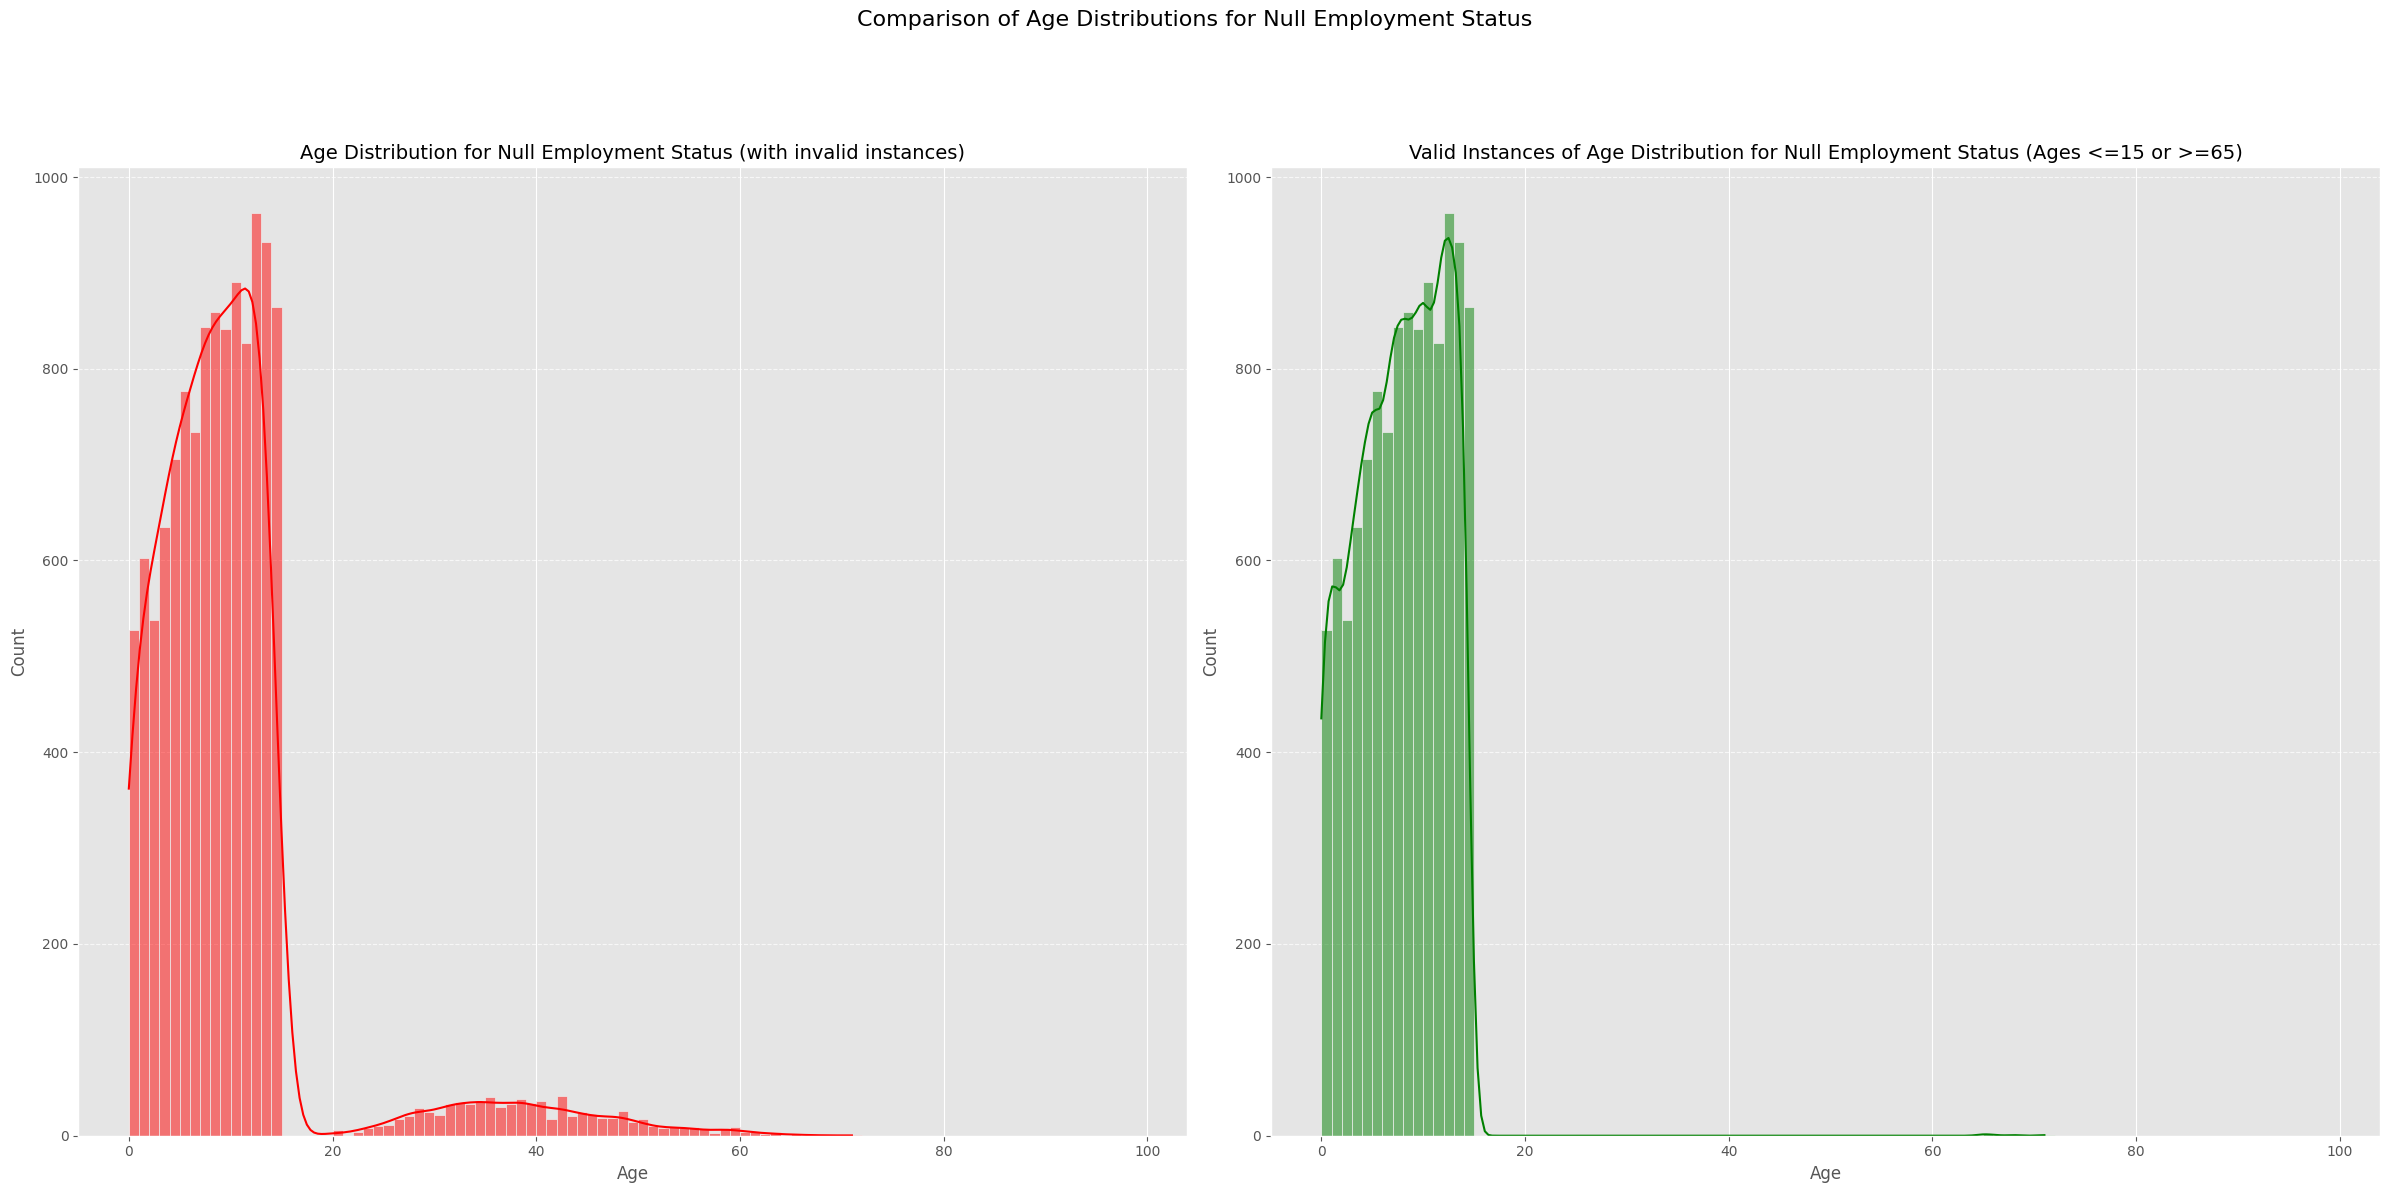

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(24,12))

sns.histplot(null_ages, bins=common_bins, color='red', kde=True, ax=axes[0], stat='count')
axes[0].set_title('Age Distribution for Null Employment Status (with invalid instances)', fontsize=14)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.histplot(null_ages_adjusted, bins=common_bins, color='green', kde=True, ax=axes[1], stat='count')
axes[1].set_title('Valid Instances of Age Distribution for Null Employment Status (Ages <=15 or >=65)', fontsize=14)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle('Comparison of Age Distributions for Null Employment Status', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to make space for suptitle
plt.show()


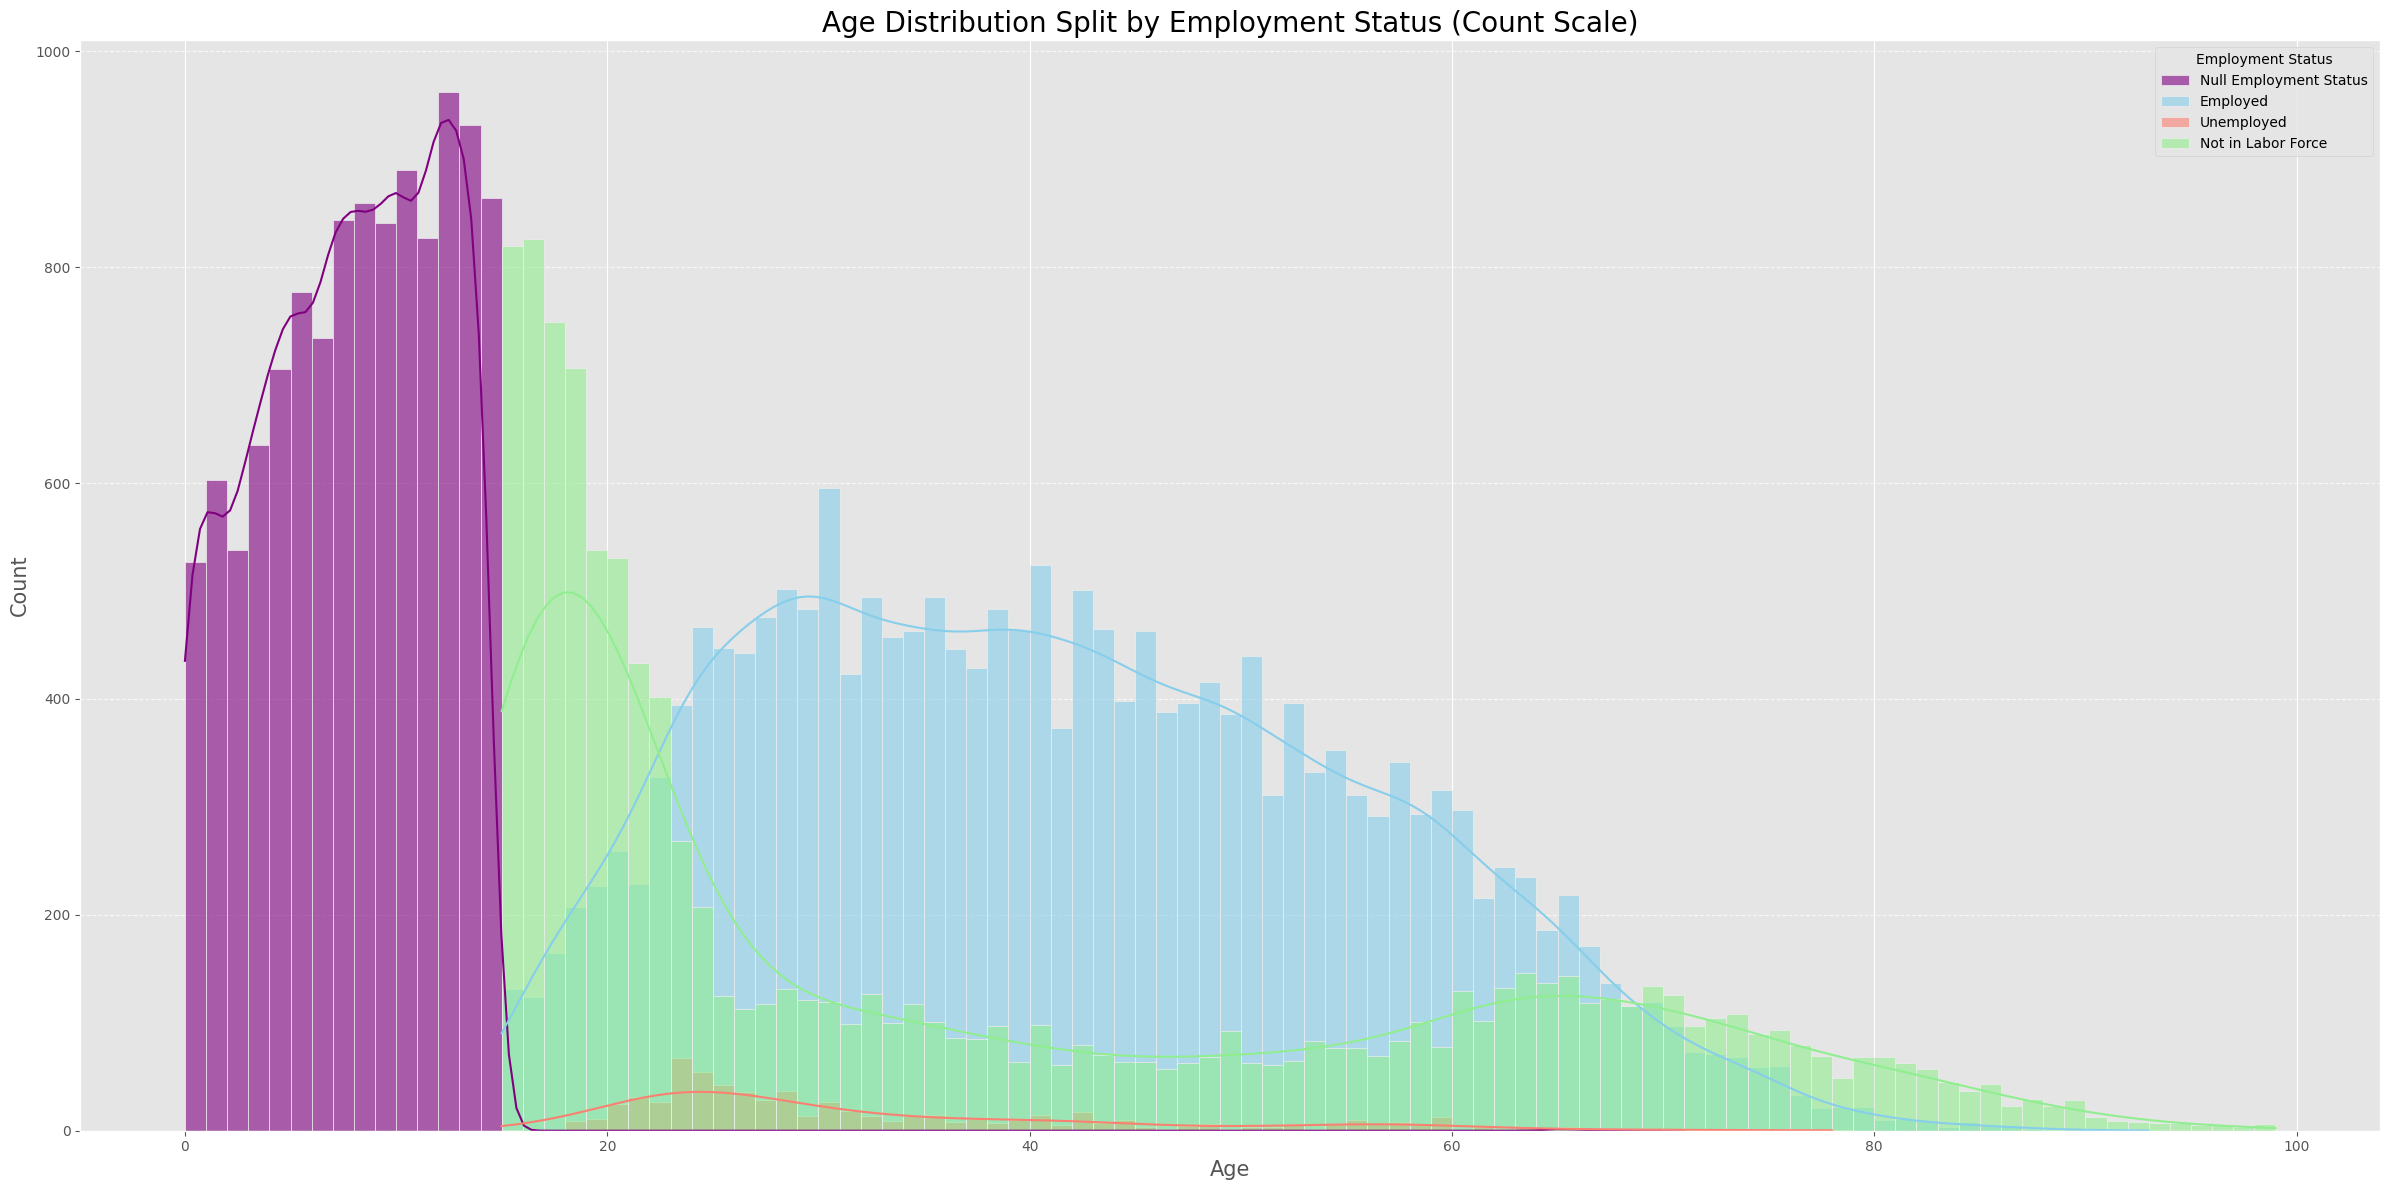

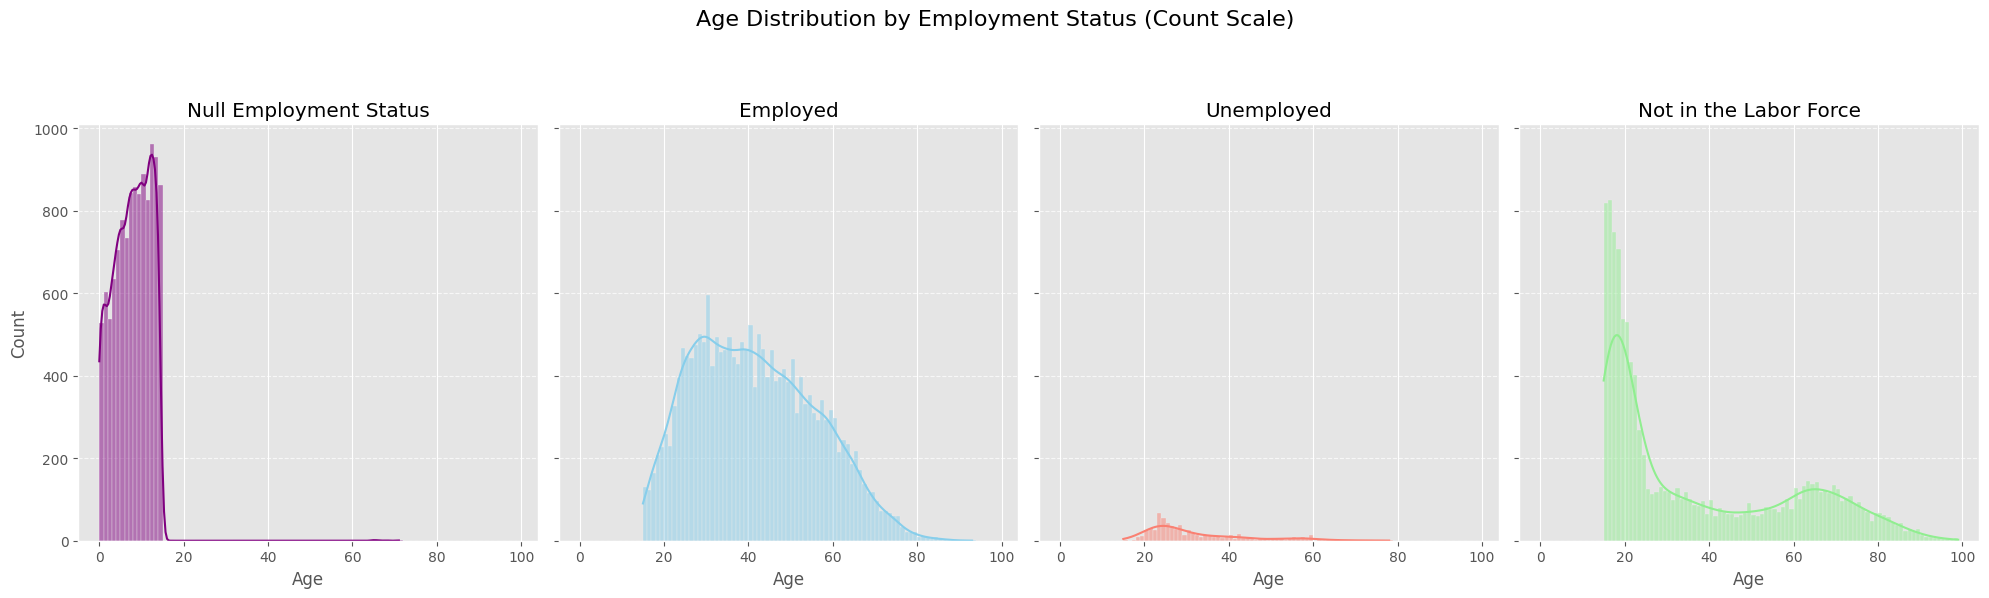

Statistics for all employment statuses:

--- Individuals with Null Employment Status ---
  Number of Individuals: 11544
  Mean Age: 7.72
  Median Age: 8.00
  Mode Age: [12]
  Standard Deviation of Age: 4.35

--- Individuals with Employed Status ---
  Number of Individuals: 19848
  Mean Age: 41.34
  Median Age: 40.00
  Mode Age: [30]
  Standard Deviation of Age: 14.46

--- Individuals with Unemployed Status ---
  Number of Individuals: 670
  Mean Age: 32.15
  Median Age: 28.00
  Mode Age: [23]
  Standard Deviation of Age: 12.19

--- Individuals Not in the Labor Force ---
  Number of Individuals: 11197
  Mean Age: 36.87
  Median Age: 25.00
  Mode Age: [16]
  Standard Deviation of Age: 22.34


In [21]:
null_ages = null_ages_adjusted

plt.figure(figsize=(24, 12))

plot_stat = 'count'

sns.histplot(null_ages_adjusted, bins=common_bins, color='purple', label='Null Employment Status', alpha=0.6, kde=True, stat=plot_stat)
sns.histplot(employed_ages, bins=common_bins, color='skyblue', label='Employed', alpha=0.6, kde=True, stat=plot_stat)
sns.histplot(unemployed_ages, bins=common_bins, color='salmon', label='Unemployed', alpha=0.6, kde=True, stat=plot_stat)
sns.histplot(not_in_labor_force_ages, bins=common_bins, color='lightgreen', label='Not in Labor Force', alpha=0.6, kde=True, stat=plot_stat)

plt.title(f'Age Distribution Split by Employment Status ({plot_stat.capitalize()} Scale)', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel(f'{plot_stat.capitalize()}', fontsize=15)
plt.legend(title='Employment Status', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# show individual plots for each employment status for better clarity in comparison
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True) # 4 subplots

# plot for Null Employment Status
sns.histplot(null_ages_adjusted, bins=common_bins, color='purple', kde=True, ax=axes[0], stat=plot_stat)
axes[0].set_title('Null Employment Status')
axes[0].set_xlabel('Age')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# plot for Employed
sns.histplot(employed_ages, bins=common_bins, color='skyblue', kde=True, ax=axes[1], stat=plot_stat)
axes[1].set_title('Employed')
axes[1].set_xlabel('Age')
axes[1].set_ylabel(f'{plot_stat.capitalize()}')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# plot for Unemployed
sns.histplot(unemployed_ages, bins=common_bins, color='salmon', kde=True, ax=axes[2], stat=plot_stat)
axes[2].set_title('Unemployed')
axes[2].set_xlabel('Age')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# plot for Not in Labor Force
sns.histplot(not_in_labor_force_ages, bins=common_bins, color='lightgreen', kde=True, ax=axes[3], stat=plot_stat)
axes[3].set_title('Not in the Labor Force')
axes[3].set_xlabel('Age')
axes[3].grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle(f'Age Distribution by Employment Status ({plot_stat.capitalize()} Scale)', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("Statistics for all employment statuses:")
i=0
for status_name, ages_series in {
    "Individuals with Null Employment Status": null_ages_adjusted,
    "Individuals with Employed Status": employed_ages,
    "Individuals with Unemployed Status": unemployed_ages,
    "Individuals Not in the Labor Force": not_in_labor_force_ages
}.items():
    if not ages_series.empty:
        print(f"\n--- {status_name} ---")
        print(f"  Number of Individuals: {len(ages_series)}")
        print(f"  Mean Age: {ages_series.mean():.2f}")
        print(f"  Median Age: {ages_series.median():.2f}")
        print(f"  Mode Age: {ages_series.mode().tolist()}")
        print(f"  Standard Deviation of Age: {ages_series.std():.2f}")

        i+=1
    else:
        print(f"\n--- {status_name} (No data) ---")

Let us now interpret the data we have received.

#### --- **Individuals with Null Employment Status** ---

This group predominantly consists of children and young adolescents.

* The mean age of approximately 10 years old and a median age of 8 strongly indicate a very young demographic.
    * This is further supported by the way that the survey is structured: children under the recommended age (of 15 years old) to participate in the labor force are excluded from being *employed* in the eyes of the Philippine Statistics Authority. We shall investigate this further in the sections below.
* The mode of 12 shows that this is the most frequent age in this category.
    * **Most kids are not employed**; as they should not be.
* A standard deviation of 9.01 suggests some variability, likely including some infants and older teenagers, but the central tendency is clearly in childhood.
* The "Null" employment status is appropriate for this group as they are generally not part of the labor force. This category likely includes students and individuals too young to work.
* As for those within the **16 to 80 age range** that have a **Null Employment Status**, no part of the physical questionnaire indicate why they might have such status. And so these entries in the dataset are excellent **candidates to be cleaned** and deleted from the data frame.

<br>

#### --- **Individuals with Employed Status** ---

* This group represents the core of the workforce in their prime working years.

* The mean age of 41.34 and median age of 40 are **typical ages for an established workforce**; 41.6 according to the *US Bureau of Labor Statistics* (2024)
* The mode of 30 suggests a significant number of individuals in their early-to-mid career stages.
* The standard deviation of 14.46 indicates a broader age range compared to the "Null" group, which is expected as it encompasses early-career professionals to those nearing retirement. This is the largest group in this dataset, which is a **positive economic indicator**.

<br>

#### --- **Individuals with Unemployed Status** ---

* This group appears to be composed of younger adults who are actively seeking work.

* The mean age of 32.15 and median of 28 are significantly younger than the employed group.
* The mode of 23 is particularly telling, as this is an age when many have **recently completed their education and are entering the job market**.
* The relatively smaller number of individuals (670) in this category is a positive sign for the overall employment situation in this dataset.

<br>

#### --- **Individuals not in the Labor Force** ---

* K=Just to reiterate what was mentioned above, the people within this categoery are not counted as employed or unemployed. Typically this group includes:
    - Students (full‑time, who aren’t seeking work yet)
    - Retirees
    - Stay‑at‑home caregivers
    - People with long‑term disabilities or other reasons they’re not looking for work


* This is a very (if not, the most) interesting and diverse group, likely representing a mix of individuals with different circumstances.

* The mean age is 36.87, which is closer to the employed group. However, the median age is much lower at 25. This large difference between the mean and median suggests a *right-skewed distribution*. This means there is a **substantial number of younger individuals**, but also a **long tail of older individuals** who are **without a job** and are categoerized as **not in the labor force**, and so are pulling the average age up for this category.
* The mode of 16 is quite young and could represent students who have part-time or seasonal jobs and are currently in an "off" period, or individuals who have just finished basic education and are in a transitional phase.
* The very high standard deviation of 22.34 confirms the wide age spread in this category. It likely includes:
    * Younger individuals in seasonal or contractual work.
    * Older individuals who might be between contracts, on temporary leave, or experiencing a short-term layoff.
* The "Temporarily Unemployed" status could encompass a wide range of situations, from students on break to gig economy workers between assignments.

<br>

#### --- **Summary** ---
- The "Null" status correctly identifies a population group that is largely too young to be part of the workforce.
- The "Employed" group is concentrated in the prime working ages, as expected.
- The "Unemployed" are younger individuals likely at the start of their careers and actively seeking employment.
- The "Not in Labor Force" category is the most varied in terms of age. The skewed distribution points to a mix of younger individuals in precarious work situations and a smaller number of older, more experienced workers who are not looking for work. This group warrants further investigation to understand the different sub-populations within it.

Now, lets reflect back the changes made to the Null Employment Status Category back to the original dataframe: `lfs_data`. That way, we wont have to worry about the instances we have removed earlier in our EDAs moving forward.

In [22]:
mask_plausible_null = (
    (lfs_data['PUFNEWEMPSTAT'] == -1)
    & ((lfs_data['PUFC05_AGE'] <= 15) | (lfs_data['PUFC05_AGE'] >= 65))
)

null_ages = lfs_data.loc[mask_plausible_null, 'PUFC05_AGE']

lfs_data = lfs_data.loc[~(
    (lfs_data['PUFNEWEMPSTAT'] == -1)
    & ((lfs_data['PUFC05_AGE'] > 15) & (lfs_data['PUFC05_AGE'] < 65))
)]

##### For further analysis as to why the Employed/Unemployed status was a chosen feature columns:

> `PUFNEWEMPSTAT` is the PSA's new category (implemented for 2005 onwards) for a Filipino individual's employment status. This was not present in the previous datasets from the previous years provided by the government agency and is only a recent addition.
>
> Previously, the only columns that allowed for the prediction of employment status are the columns:
>
> - `PUFC09_WORK` (which asked the question: _Did the person do any work for at least one hour during the past week?_) and 
>
> - `PUFC30_LOOKW` (which asked the question: _Did the person look for work or try to establish a business in the past week?_)
>
> Although these variables are technically related to whether or not a person is a professional who may have a career, who is waged, and is hired, these two variables are unable to accurately tell whether the same person is ***employed***. This is due to different factors in the Philippine setting (still within the dataset) such as: (1) having contractual work only for the week, (2) is hired but only receive pay through goods and not legal tender, (3) has work but has insufficient number of paid hours to pay bills, etc.
> 
> These variables are still available in the current version and will thus still be investigated later on within this notebook. But as there exists an easier way to identify the current status of an individual in terms of whether they are currently employed or not, we have decided to use this variable.

___

#### Histogram of Age split by `PUFC09_WORK` (WorkIndicator - _Did the person do any work for at least one hour during the past week?_)

As mentioned in the cell above, `PUFC09_WORK` asks a similar question to the Employed/Unemployed column but in a more specific sense. The survey asks the individual whether or not they have exerted any form of labor for an employer at any point during the week. This is crucial to the survey because it acquires a straightforward **Yes/No answer** (Boolean Data Type in the dataset) from the respondent regarding their **recent work activity *for the week***, which paves the way to further investigation or questioning along the survey: regarding whether they're currently working with no pay (non-profit, family business therefore no official payment), whether they have done less than so-so number of hours this week (part-time, freelancing, or even unstable work hours), etc.

Its primary purpose is to capcure some of the economic activity of a person, may their activity be formal or informal. It serves as a gateway question for more in-depth investigation, as indicated by the structure of the survey questionnaire. This column is *extremely crucial* especially in the Philippine context because of the the broad definition of "work", where the informal economy (e.g., street vendors, unpaid family farm workers) is a significant part of total employment, and therefore a significant part of the economy as well.

#### How is `PUFC09_WORK` different from `PUFNEWEMPSTAT`?

- **PUFC09_WORK is a behavioral screening question**. Its purpose is to capture any form of work, no matter how small or informal.
    - It helps prevent misclassifying a regular employee who was simply on a one-week vacation as "unemployed."
    - The "work for at least one hour" standard is intentionally low to capture everyone. By combining this with data from other columns like `PUFC18_PHOURS` (_What is the total number of hours you have worked in the past week?_) and `PUFC20_PWMORE` (_Did you want to work more hours this week?_), you can identify the underemployed—people who are employed but worked less than 40 hours and wanted more work.
- **PUFNEWEMPSTAT is a derived classification**. It is not a question asked directly to the respondent but is a final status assigned by the Philippine Statistics Authority after considering the answers to several questions.
- PUFC09_WORK is the raw input, while PUFNEWEMPSTAT is the refined, analytical output.

With all that in mind and the use of the `PUFNEWEMPSTAT` column proven, let us just take a look at how the `PUFC09_WORK` column looks like when compared to the Age collumn; as done similarly in the previous histogram overlay comparison.

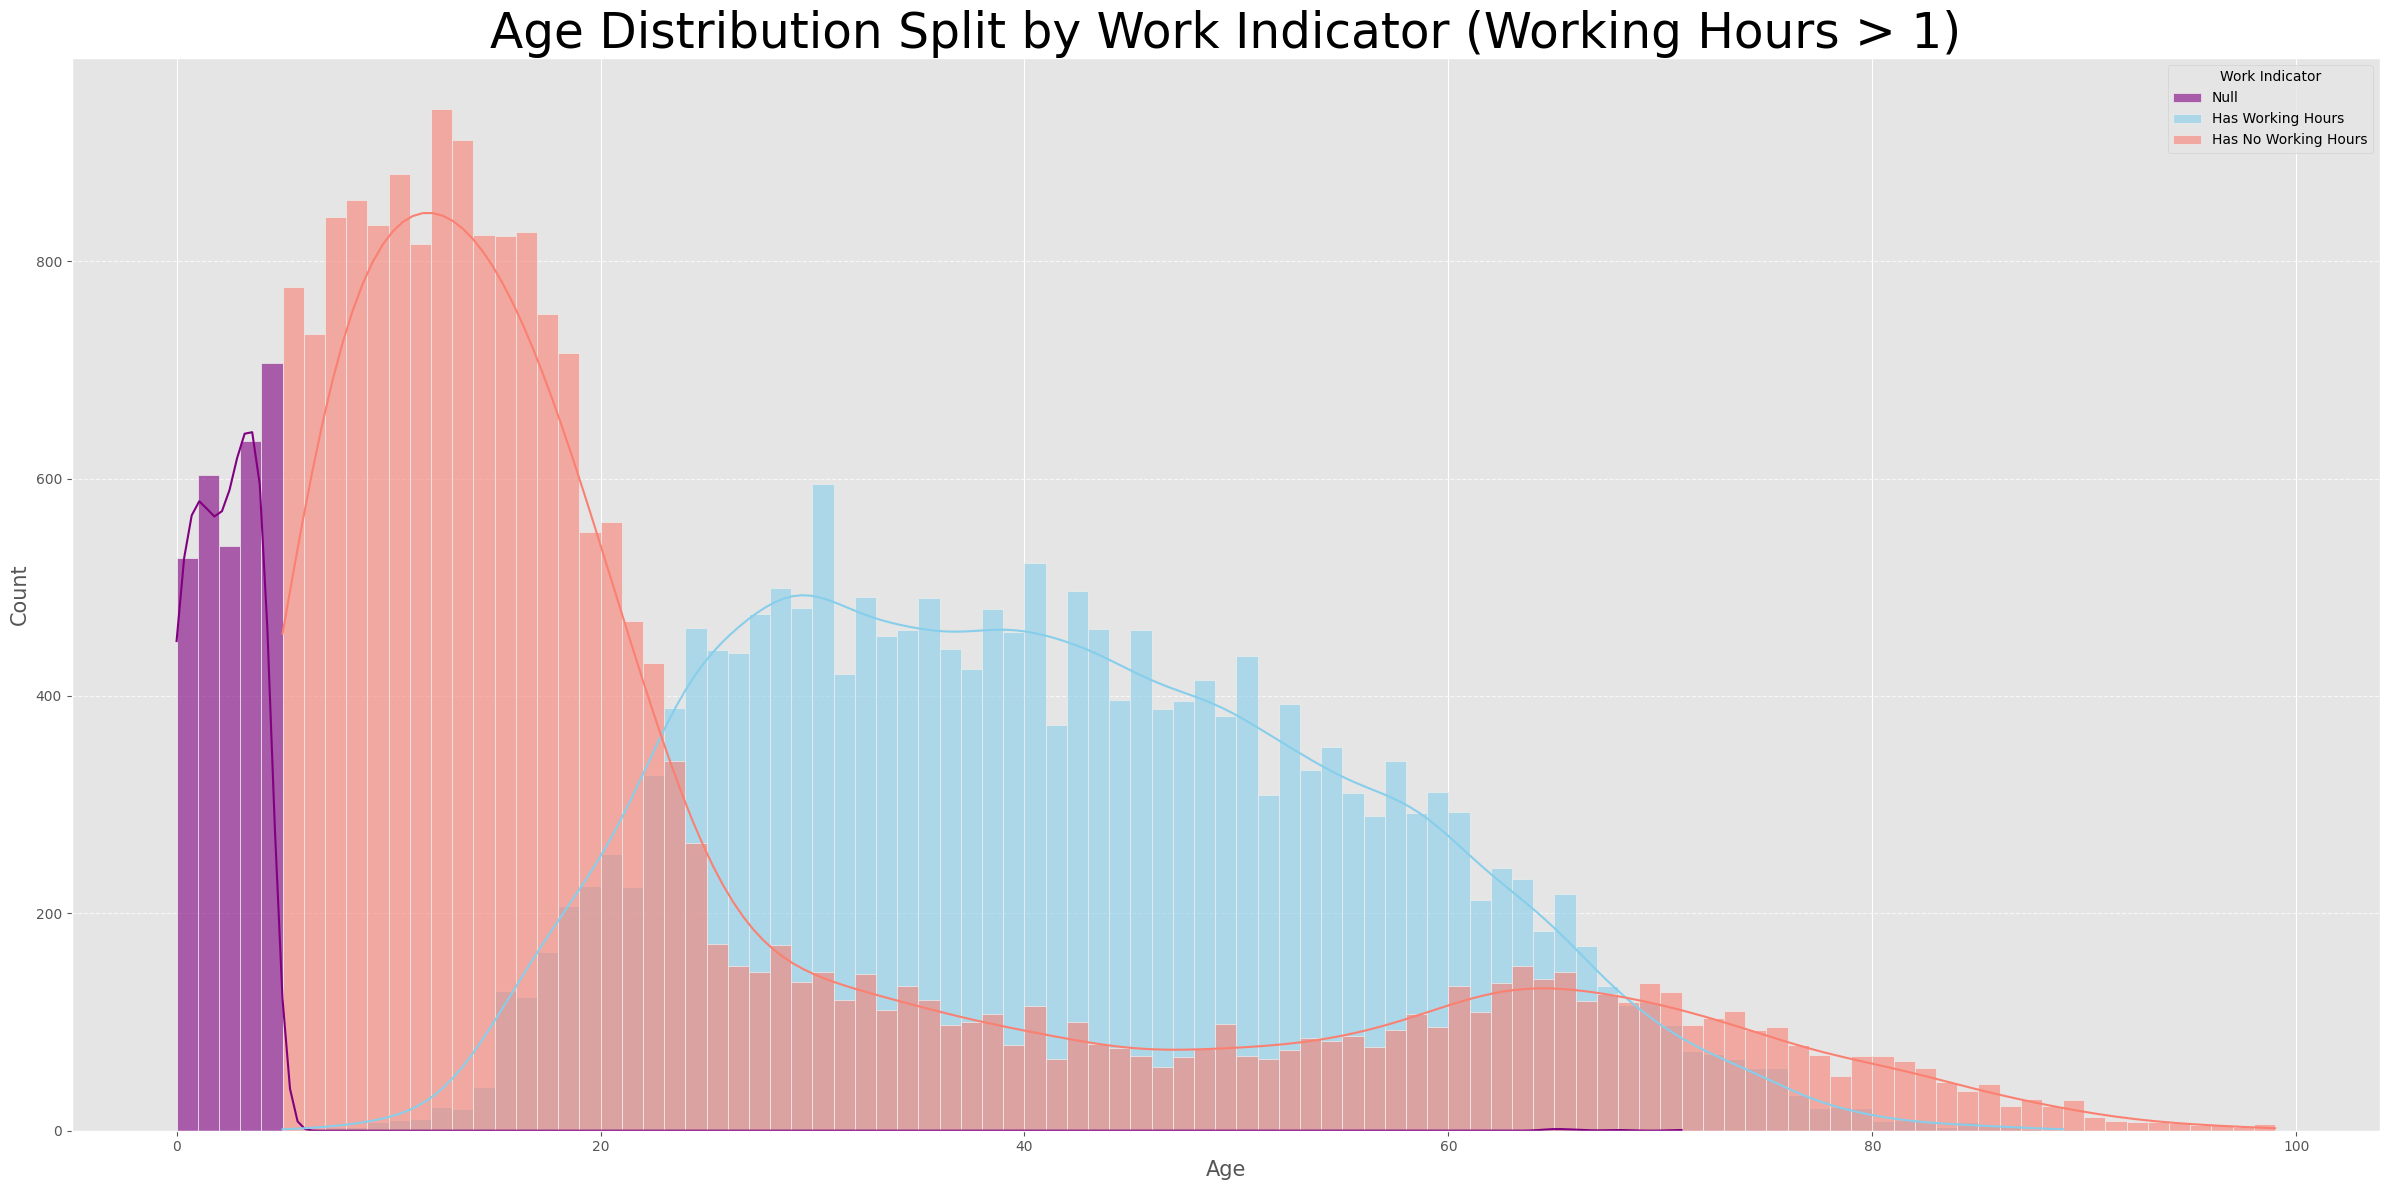

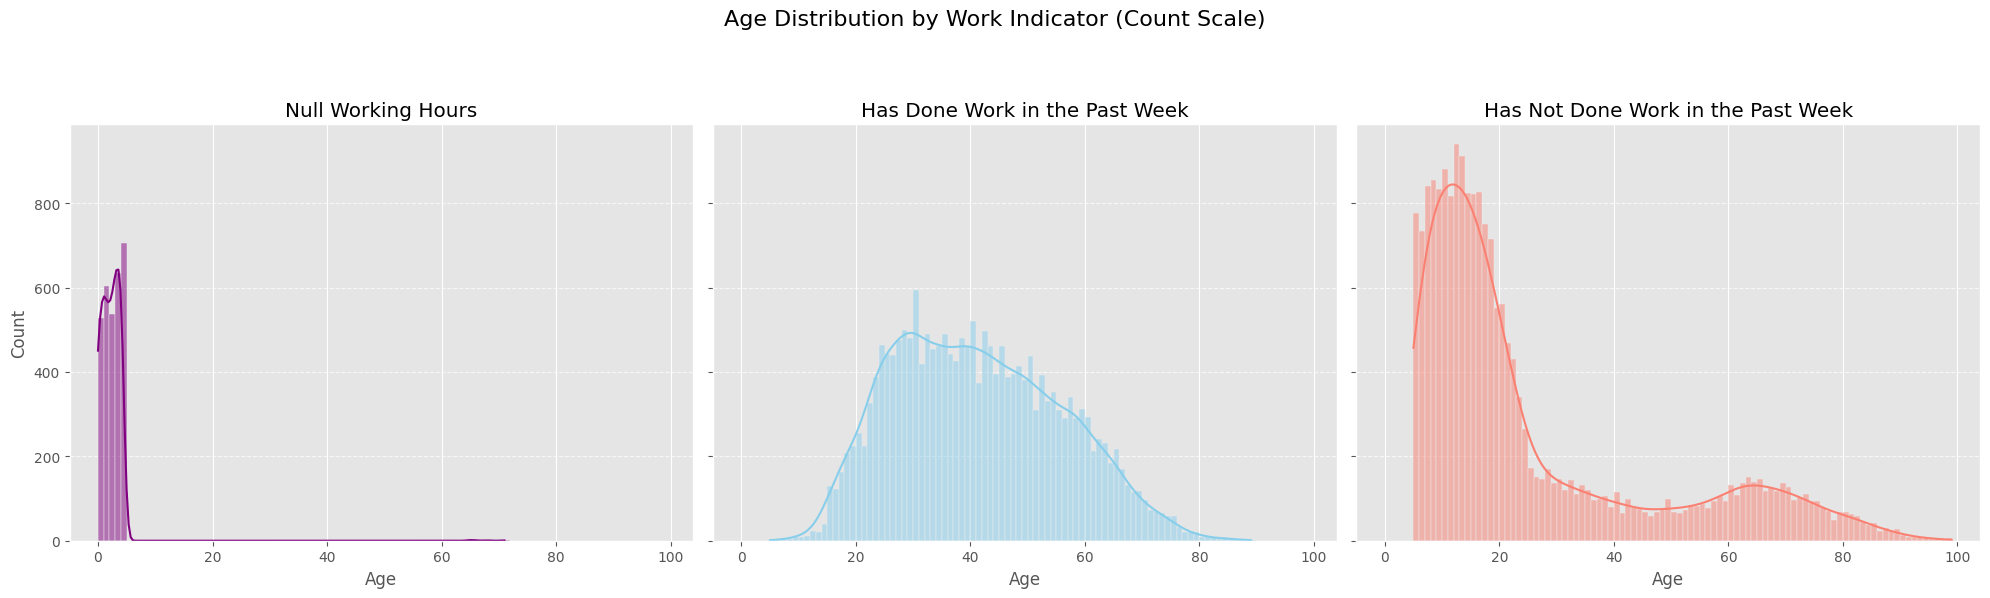

Statistics for all employment statuses:

--- Individuals with Null Working Hours in the Past Week ---
  Number of Individuals: 3014
  Mean Age: 2.24
  Median Age: 2.00
  Mode Age: [4]
  Standard Deviation of Age: 3.00

--- Individuals with at least 1 Working Hour in the Past Week ---
  Number of Individuals: 19832
  Mean Age: 41.16
  Median Age: 40.00
  Mode Age: [30]
  Standard Deviation of Age: 14.56

--- Individuals with no Working Hours in the Past Week ---
  Number of Individuals: 20413
  Mean Age: 25.53
  Median Age: 17.00
  Mode Age: [12]
  Standard Deviation of Age: 21.50


In [23]:
df = lfs_data.copy()
df = df.rename(columns={
    'PUFC05_AGE': 'Age',
    'PUFC09_WORK': 'WorkIndicator'
})

null_work = df[df['WorkIndicator'] == -1]['Age'].dropna()
has_work = df[df['WorkIndicator'] == 1]['Age'].dropna()
no_work = df[df['WorkIndicator'] == 2]['Age'].dropna()

all_ages_for_bins = pd.concat([null_work, has_work, no_work]).dropna()
min_age = int(all_ages_for_bins.min())
max_age = int(all_ages_for_bins.max())

common_bins = np.linspace(min_age, max_age, 100)

plt.figure(figsize=(24, 12))

plot_stat = 'count'

sns.histplot(null_work, bins=common_bins, color='purple', label='Null', alpha=0.6, kde=True, stat=plot_stat)
sns.histplot(has_work, bins=common_bins, color='skyblue', label='Has Working Hours', alpha=0.6, kde=True, stat=plot_stat)
sns.histplot(no_work, bins=common_bins, color='salmon', label='Has No Working Hours', alpha=0.6, kde=True, stat=plot_stat)

plt.title(f'Age Distribution Split by Work Indicator (Working Hours > 1)', fontsize=35)
plt.xlabel('Age', fontsize=15)
plt.ylabel(f'{plot_stat.capitalize()}', fontsize=15)
plt.legend(title='Work Indicator', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

sns.histplot(null_work, bins=common_bins, color='purple', kde=True, ax=axes[0], stat=plot_stat)
axes[0].set_title('Null Working Hours')
axes[0].set_xlabel('Age')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.histplot(has_work, bins=common_bins, color='skyblue', kde=True, ax=axes[1], stat=plot_stat)
axes[1].set_title('Has Done Work in the Past Week')
axes[1].set_xlabel('Age')
axes[1].set_ylabel(f'{plot_stat.capitalize()}')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

sns.histplot(no_work, bins=common_bins, color='salmon', kde=True, ax=axes[2], stat=plot_stat)
axes[2].set_title('Has Not Done Work in the Past Week')
axes[2].set_xlabel('Age')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle(f'Age Distribution by Work Indicator ({plot_stat.capitalize()} Scale)', fontsize=16, y=1.02) # Main title for subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()

print("Statistics for all employment statuses:")
i=0
for status_name, ages_series in {
    "Individuals with Null Working Hours in the Past Week": null_work,
    "Individuals with at least 1 Working Hour in the Past Week": has_work,
    "Individuals with no Working Hours in the Past Week": no_work,
}.items():
    if not ages_series.empty:
        print(f"\n--- {status_name} ---")
        print(f"  Number of Individuals: {len(ages_series)}")
        print(f"  Mean Age: {ages_series.mean():.2f}")
        print(f"  Median Age: {ages_series.median():.2f}")
        print(f"  Mode Age: {ages_series.mode().tolist()}")
        print(f"  Standard Deviation of Age: {ages_series.std():.2f}")

        i+=1
    else:
        print(f"\n--- {status_name} (No data) ---")

As we can see, the **Null Work Indicator**, **True Working Hours** (Has Done Work in the Past Week), and **False Work Indicator** (Has Not Done Work in the Past Week) all coincide and look similar to the histograms in the previous section of this notebook. 

At this point, it is unnecessary to perform a Goodness of Fit Test as our primary goal for investigating this Age vs WorkIndicator comparison is to understand the purpose of the `PUFNEWEMPSTAT` column (proving that the `PUFC09_WORK` WordIndicator column is insufficient to be used as a primary indicator for employability). These Summary Statistics are enough proof for such.

___

##### Stacked bar plot: `Sex` vs. `Employment Status`

Let's move forward by comparing Sex with `PUFNEWEMPSTAT`.


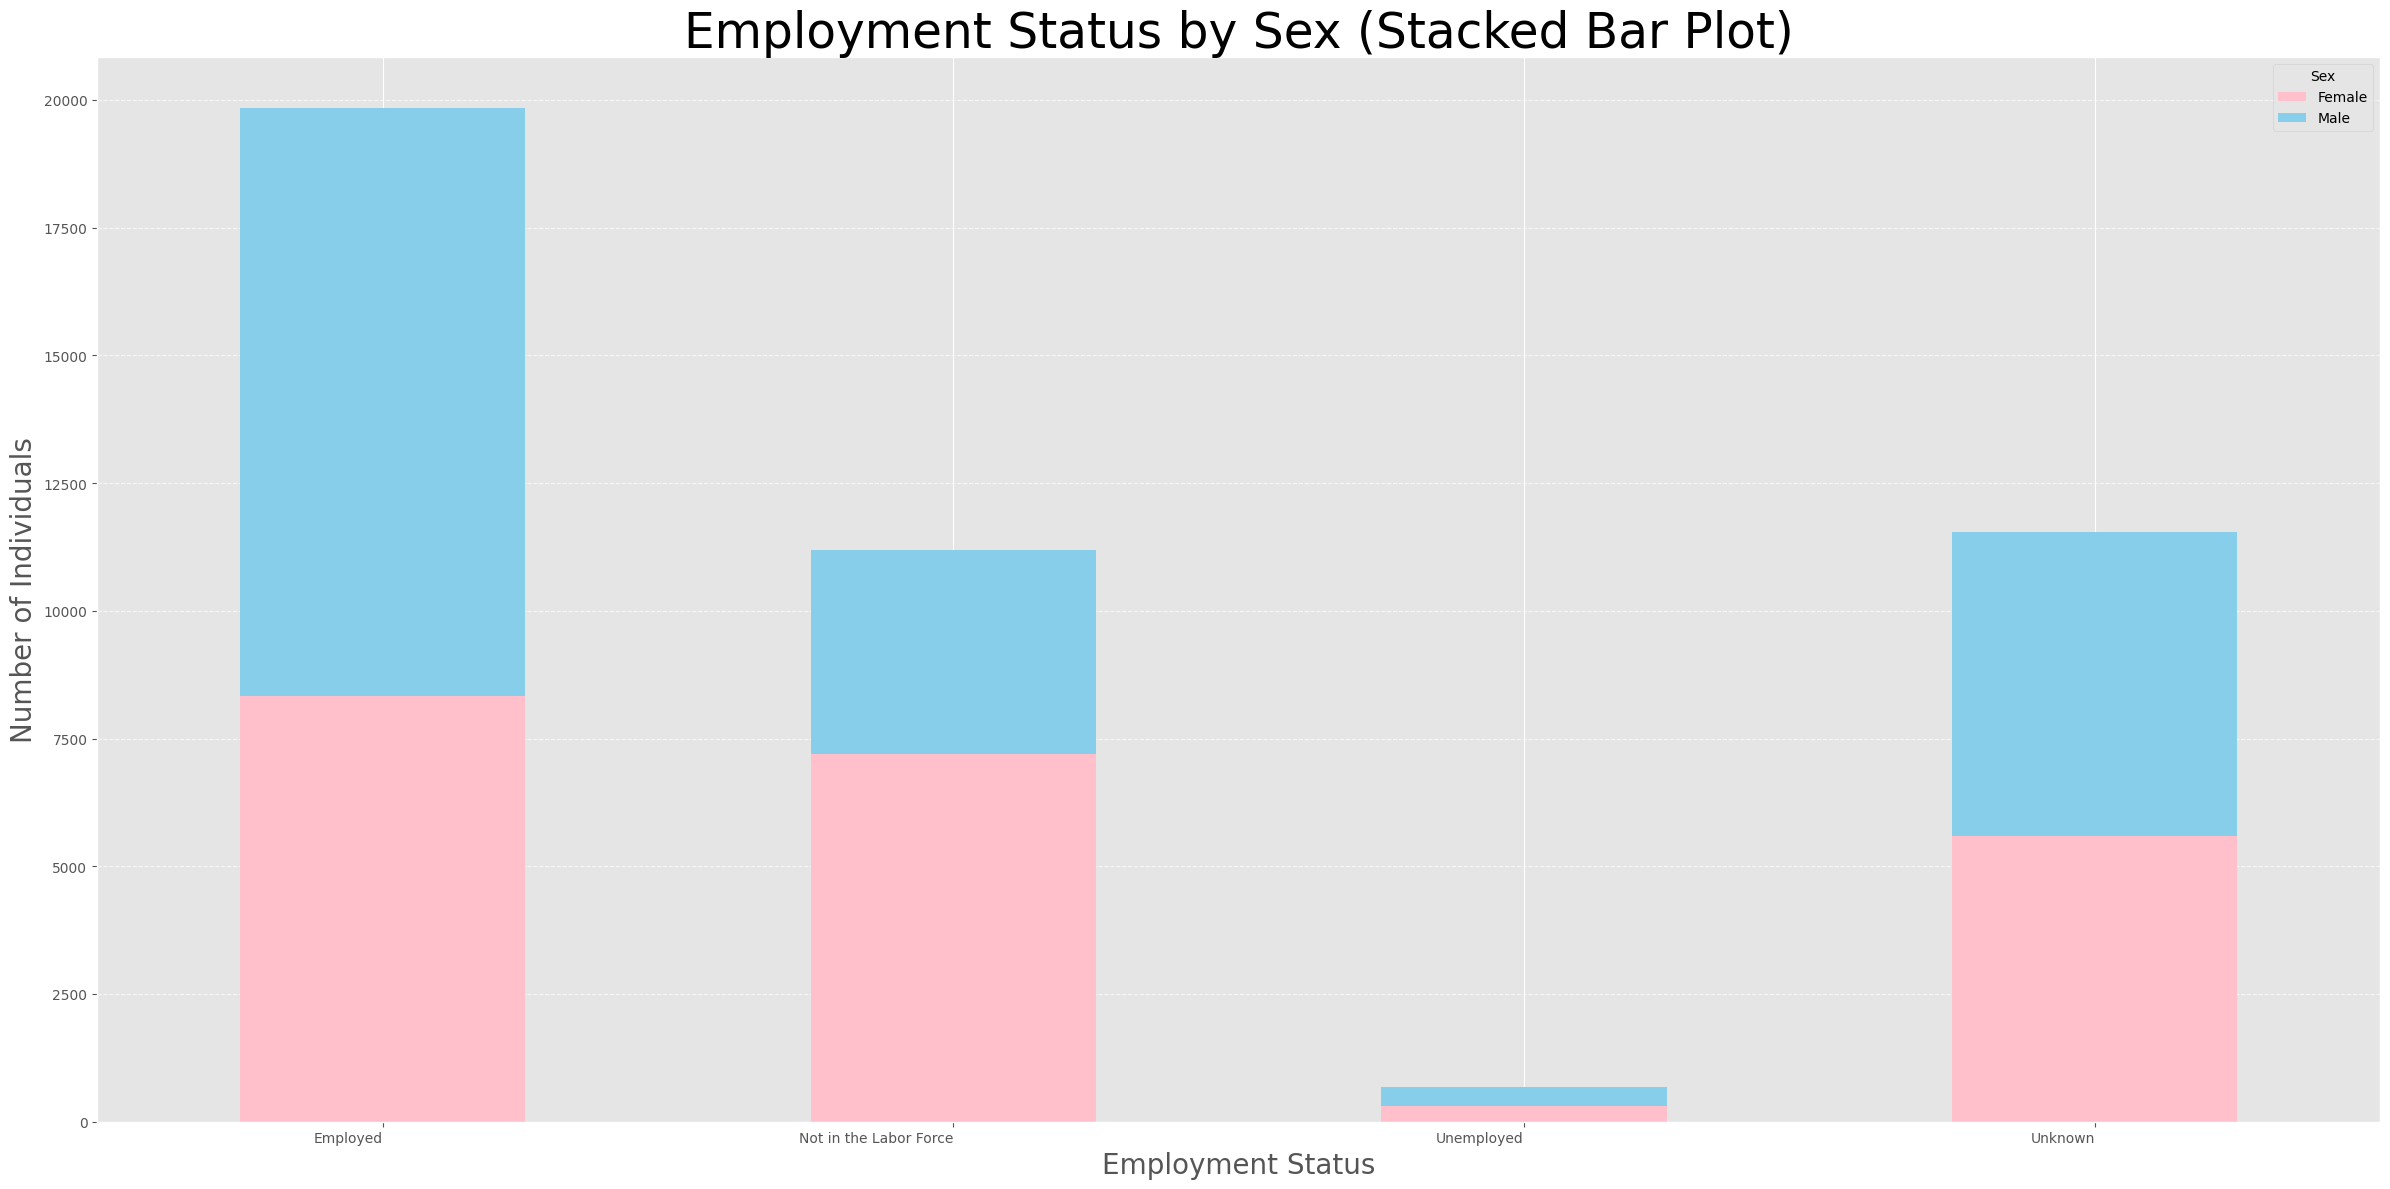

In [24]:
lfs_mapped = lfs_data.copy()
sex_mapping = {1: 'Male', 2: 'Female'}
employment_status_mapping = {-1: 'Unknown', 1: 'Employed', 2: 'Unemployed', 3: 'Not in the Labor Force'}
lfs_mapped['PUFC04_SEX'] = lfs_mapped['PUFC04_SEX'].map(sex_mapping)
lfs_mapped['PUFNEWEMPSTAT'] = lfs_mapped['PUFNEWEMPSTAT'].map(employment_status_mapping)

employment_sex_counts = lfs_mapped.groupby(['PUFNEWEMPSTAT', 'PUFC04_SEX']).size().unstack(fill_value=0)

plt.figure(figsize=(24, 12))

columns_to_plot = employment_sex_counts.columns.tolist()
custom_colors = ['skyblue' for _ in columns_to_plot]
if 'Female' in columns_to_plot:
    female_index = columns_to_plot.index('Female')
    custom_colors[female_index] = 'pink'
employment_sex_counts.plot(kind='bar', stacked=True, color=custom_colors, ax=plt.gca())

plt.title('Employment Status by Sex (Stacked Bar Plot)', fontsize=35)
plt.xlabel('Employment Status', fontsize=20)
plt.ylabel('Number of Individuals', fontsize=20)
plt.xticks(rotation=0, ha='right')
plt.legend(title='Sex', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

While looking at age and employment tells you when people work in their lifecycle, and looking at sex and employment shows differences between men and women, combining age and sex uncovers the crucial interaction between the two. We want to compare age and sex in this context to move beyond generalities and identify specific, actionable insights into how societal roles, economic pressures, and life events affect men and women differently at different stages of their lives.

Let us try comparing two of the demographic characteristics columns with each other. Let's compare the Age of an individual to their Sex.

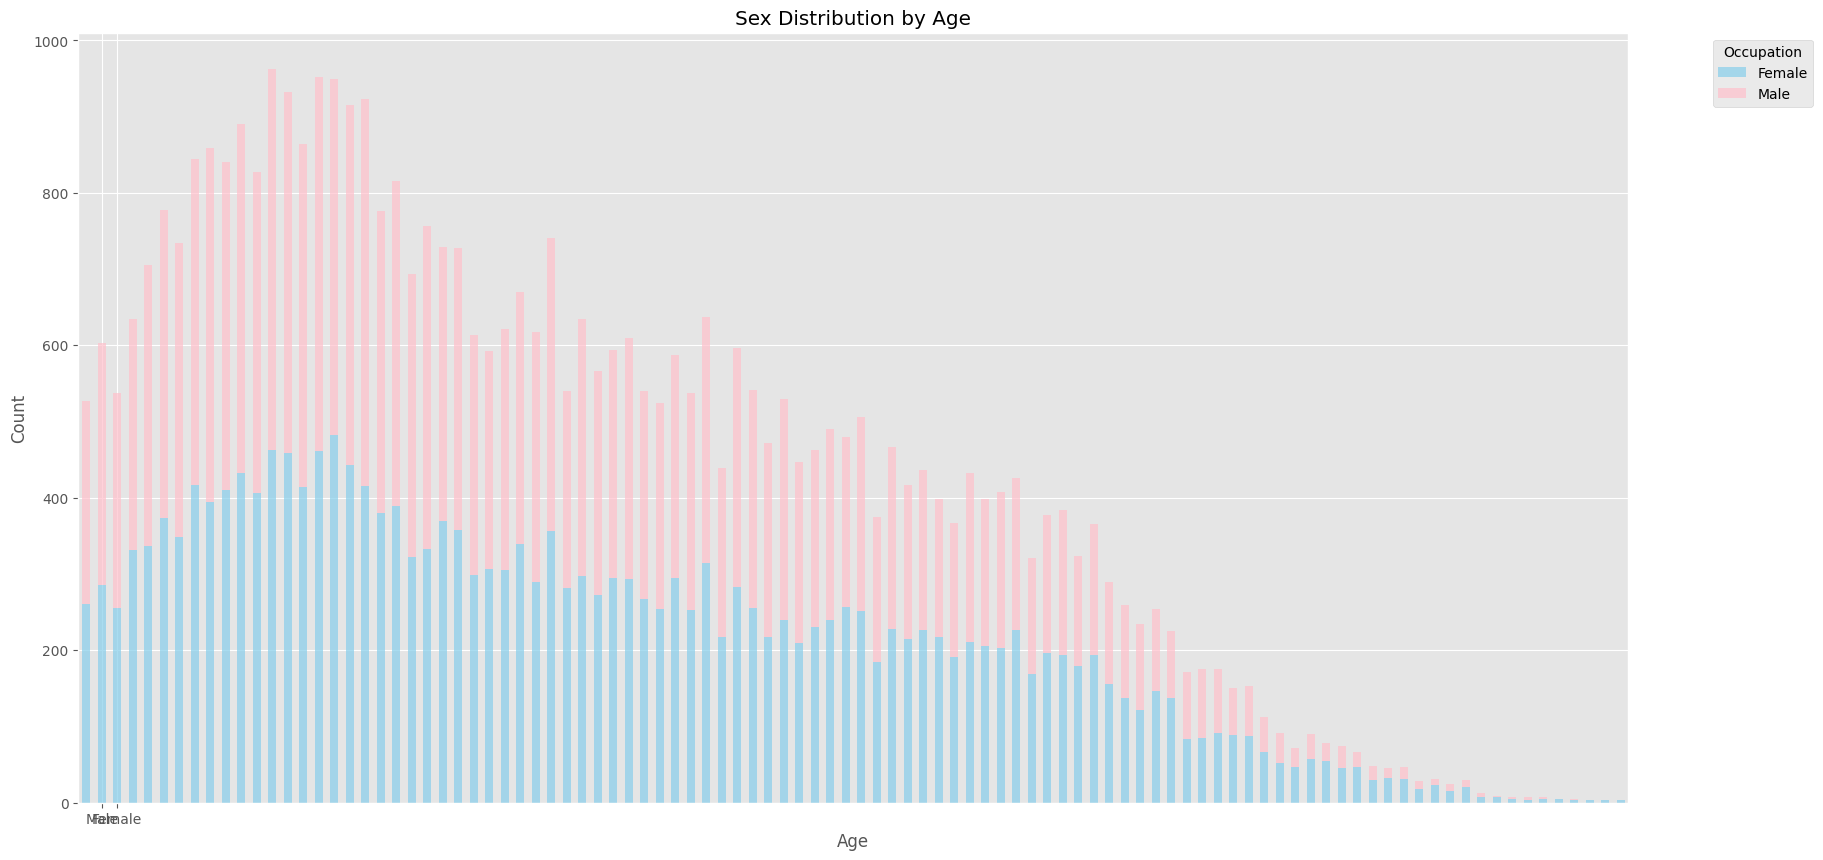

In [25]:
age_sex = lfs_mapped.groupby(['PUFC05_AGE', 'PUFC04_SEX']).size().unstack(fill_value=0)
age_sex.plot(kind='bar', stacked=True, figsize=(20, 10), color=['skyblue', 'pink'], alpha=0.7)
plt.title('Sex Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks([1, 2], ['Male', 'Female'], rotation=0)
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

With this distribution of the relationship of sex to age, we can confirm that even across all ages, both sexes are relatively equal.

There also exists a positive skew on the distribution, where majority of the population are mostly the young, and those above the age of 60 are way lower.

Let's view this with a different lens; compare the occupations of the Filipino population with their ages.

In [26]:
sex_colors = {
    'Male': 'skyblue',
    'Female': 'lightpink'
}

employment_statuses = [
    'Unknown',
    'Employed',
    'Unemployed',
    'Not in the Labor Force'
]

df = lfs_mapped.copy()
df = df.rename(columns={
    'PUFC05_AGE': 'Age',
    'PUFNEWEMPSTAT': 'EmploymentStatus',
    'PUFC04_SEX': 'Sex'
})

all_ages_for_bins = df['Age'].dropna()
min_age = int(all_ages_for_bins.min())
max_age = int(all_ages_for_bins.max())
common_bins = np.linspace(min_age, max_age, 100)
bin_centers = (common_bins[:-1] + common_bins[1:]) / 2


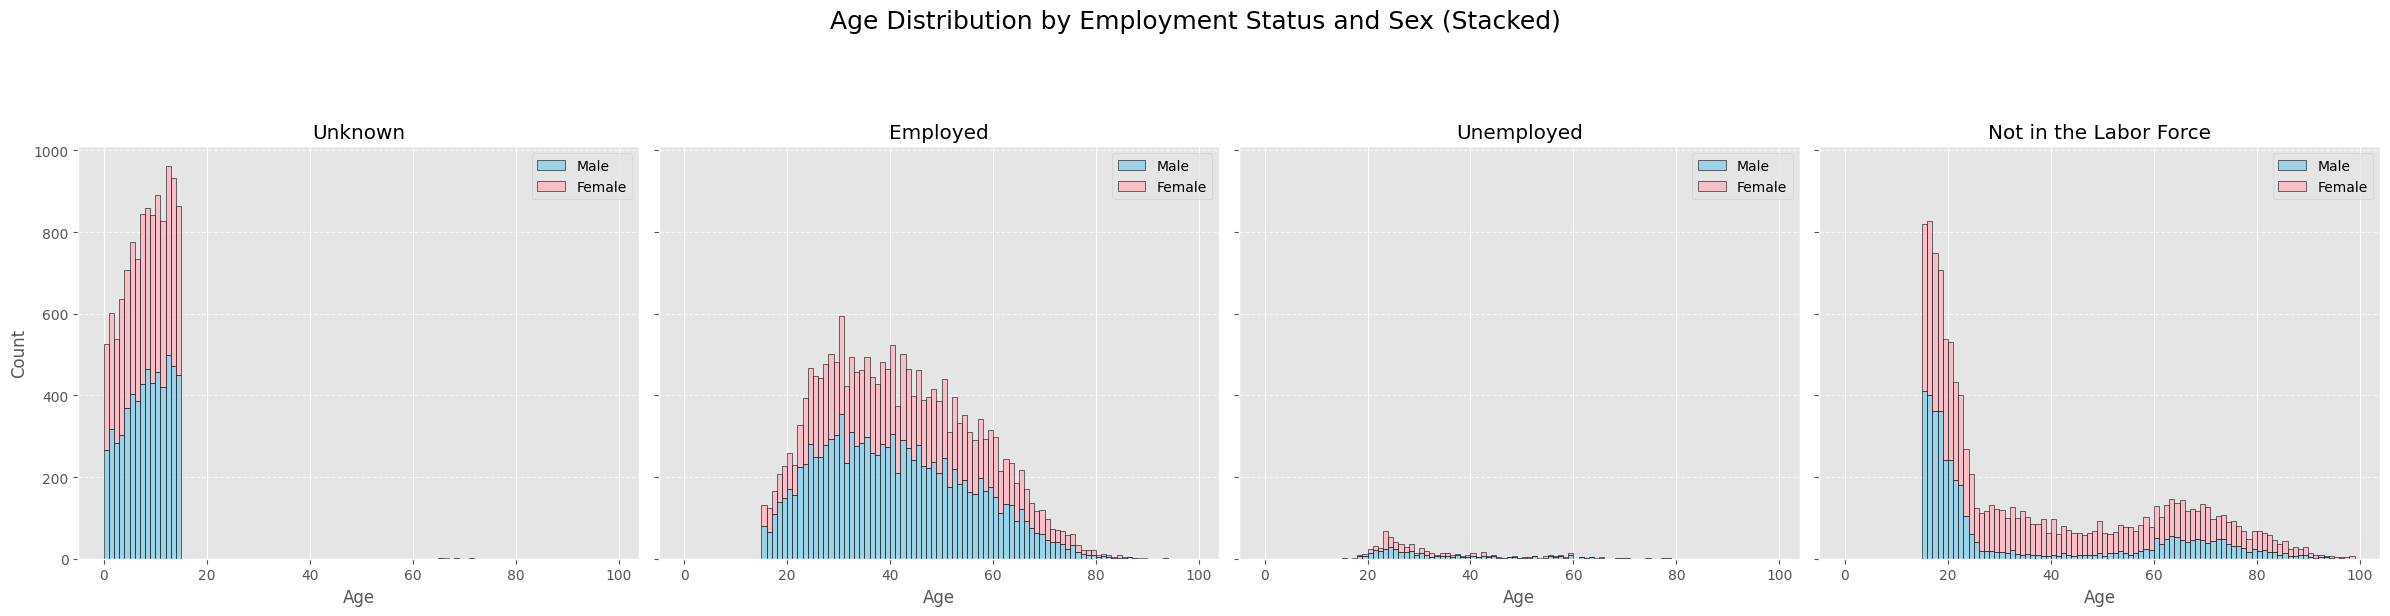

In [27]:
fig, axes = plt.subplots(1, 4, figsize=(24, 6), sharey=True)

for i, status in enumerate(employment_statuses):
    ax = axes[i]
    subset = df[df['EmploymentStatus'] == status]
    
    # Hist counts for Male and Female separately
    counts_by_sex = {}
    for sex_value in sex_colors.keys():
        sex_subset = subset[subset['Sex'] == sex_value]['Age'].dropna()
        counts, _ = np.histogram(sex_subset, bins=common_bins)
        counts_by_sex[sex_value] = counts

    # Stack bars
    bottom = np.zeros_like(bin_centers)
    for sex_value, color in sex_colors.items():
        counts = counts_by_sex[sex_value]
        ax.bar(
            bin_centers,
            counts,
            width=np.diff(common_bins)[0],
            label=sex_value,
            bottom=bottom,
            color=color,
            alpha=0.8,
            edgecolor='black'
        )
        bottom += counts  # Update bottom for next stack

    ax.set_title(status)
    ax.set_xlabel('Age')
    if i == 0:
        ax.set_ylabel('Count')
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle('Age Distribution by Employment Status and Sex (Stacked)', fontsize=18, y=1.05)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


If we compare this to the first stacked bar chart of this section, we can see that the individuals who are employed are truly the largest group among the 4 categories with a relatively equal distribution between Male and Female.

So goes for the other two: Unknown (the kids who are not in the workforce yet) and the Unemployed.

What could be interesting to look at, however, is that those who are not in the labor force  have a greater Female to Male ratio; meaning that there currently exists more women who currently do not have employment. This could be an indicator of: 
- cultural factors (ie. these women in their "caregiving years" as indicated by the high ratio of females in the 20 to 40 year old range who are temporarily unemployed); or
- periodic factors (ie. lay-offs in Male-Dominated Fields/Female-Dominated Fields for this specific year)

Without investigating the previous dataset as well, this might be a difficult question to answer. 

In [28]:
mode_sex_by_employment_status = df.groupby('EmploymentStatus')['Sex'].apply(lambda x: x.mode()[0])
mode_sex_by_employment_status

EmploymentStatus
Employed                    Male
Not in the Labor Force    Female
Unemployed                  Male
Unknown                     Male
Name: Sex, dtype: object

In [29]:
# ratio of male to female per employment status
male_female_ratio = employment_sex_counts['Male'] / employment_sex_counts['Female']
ratio_df = male_female_ratio.reset_index().rename(columns={0: 'Male to Female Ratio', 'PUFNEWEMPSTAT': 'Employment Status'})
print(ratio_df)

        Employment Status  Male to Female Ratio
0                Employed              1.380142
1  Not in the Labor Force              0.556003
2              Unemployed              1.196721
3                 Unknown              1.065855


However, if we do a simple function call to find the (Measure of Central Tendency) Mode of the Sexes for each Employment Status, we can see that this claim on cultural factors might prove, though unfortunate, much more plausible.

All things considered, we could say that at least for the Employed individuals of the current workforce, there exists a good balance between Male and Female Filipinos.

___

##### Bar plot: `Marital Status` vs. % `Employed`

Lastly, for the final demographic characteristic of interest in the dataset, let us investigate the Marital Status of Filipino individuals compared to their Employment Status.

Investigating the relationship between marital status and employment status in the Philippines is not just an interesting demographic exercise; it is crucial for uncovering the deep-seated economic and social structures that shape an individual's life and the nation's economy as a whole.

In the Philippines, family is the central social unit, and traditional gender roles, while evolving, still exert a powerful influence. Analyzing marital status against employment data allows us to quantify the impact of these norms.

Just by culturally observing the population alone, we can notice a lot of cultural norms in play:
1. The "Marriage Effect" on Labor Participation
    - Men getting married often increases labor force participation. The societal role of the "haligi ng tahanan" creates pressure for the individual to be the primary breadwinner, leading to greater job stability and higher earnings (a "wage premium").
    - Marriage for women, and especially childbearing, might be strongly correlated with a decrease in labor force participation. A significant number of women leave the workforce or shift to more flexible, often informal and lower-paying jobs, to manage household and childcare duties.

2. The "Motherhood Penalty"
    - By comparing married women with and without children to single women, we can potentially statistically identify the "motherhood penalty" — the career and wage disadvantages women face when they become mothers. 

Create mappings for the columns

In [30]:
marital_status_map = {
    1: 'Single',
    2: 'Married',
    3: 'Widowed',
    4: 'Divorced/Separated',
    5: 'Annulled',
    6: 'Unknown'
}

employment_status_map = {
    1: 'Employed',
    2: 'Unemployed',
    3: 'Not in Labor Force'
}

df_marriage_employment = lfs_data.copy()

df_marriage_employment['Marital_Status_Label'] = df_marriage_employment['PUFC06_MSTAT'].map(marital_status_map)
df_marriage_employment['Employment_Status_Label'] = df_marriage_employment['PUFNEWEMPSTAT'].map(employment_status_map)

df_marriage_employment = df_marriage_employment.dropna(subset=['Marital_Status_Label', 'Employment_Status_Label'])

crosstab = pd.crosstab(df_marriage_employment['Marital_Status_Label'], 
                       df_marriage_employment['Employment_Status_Label'])

Display population by martial status vs employment status

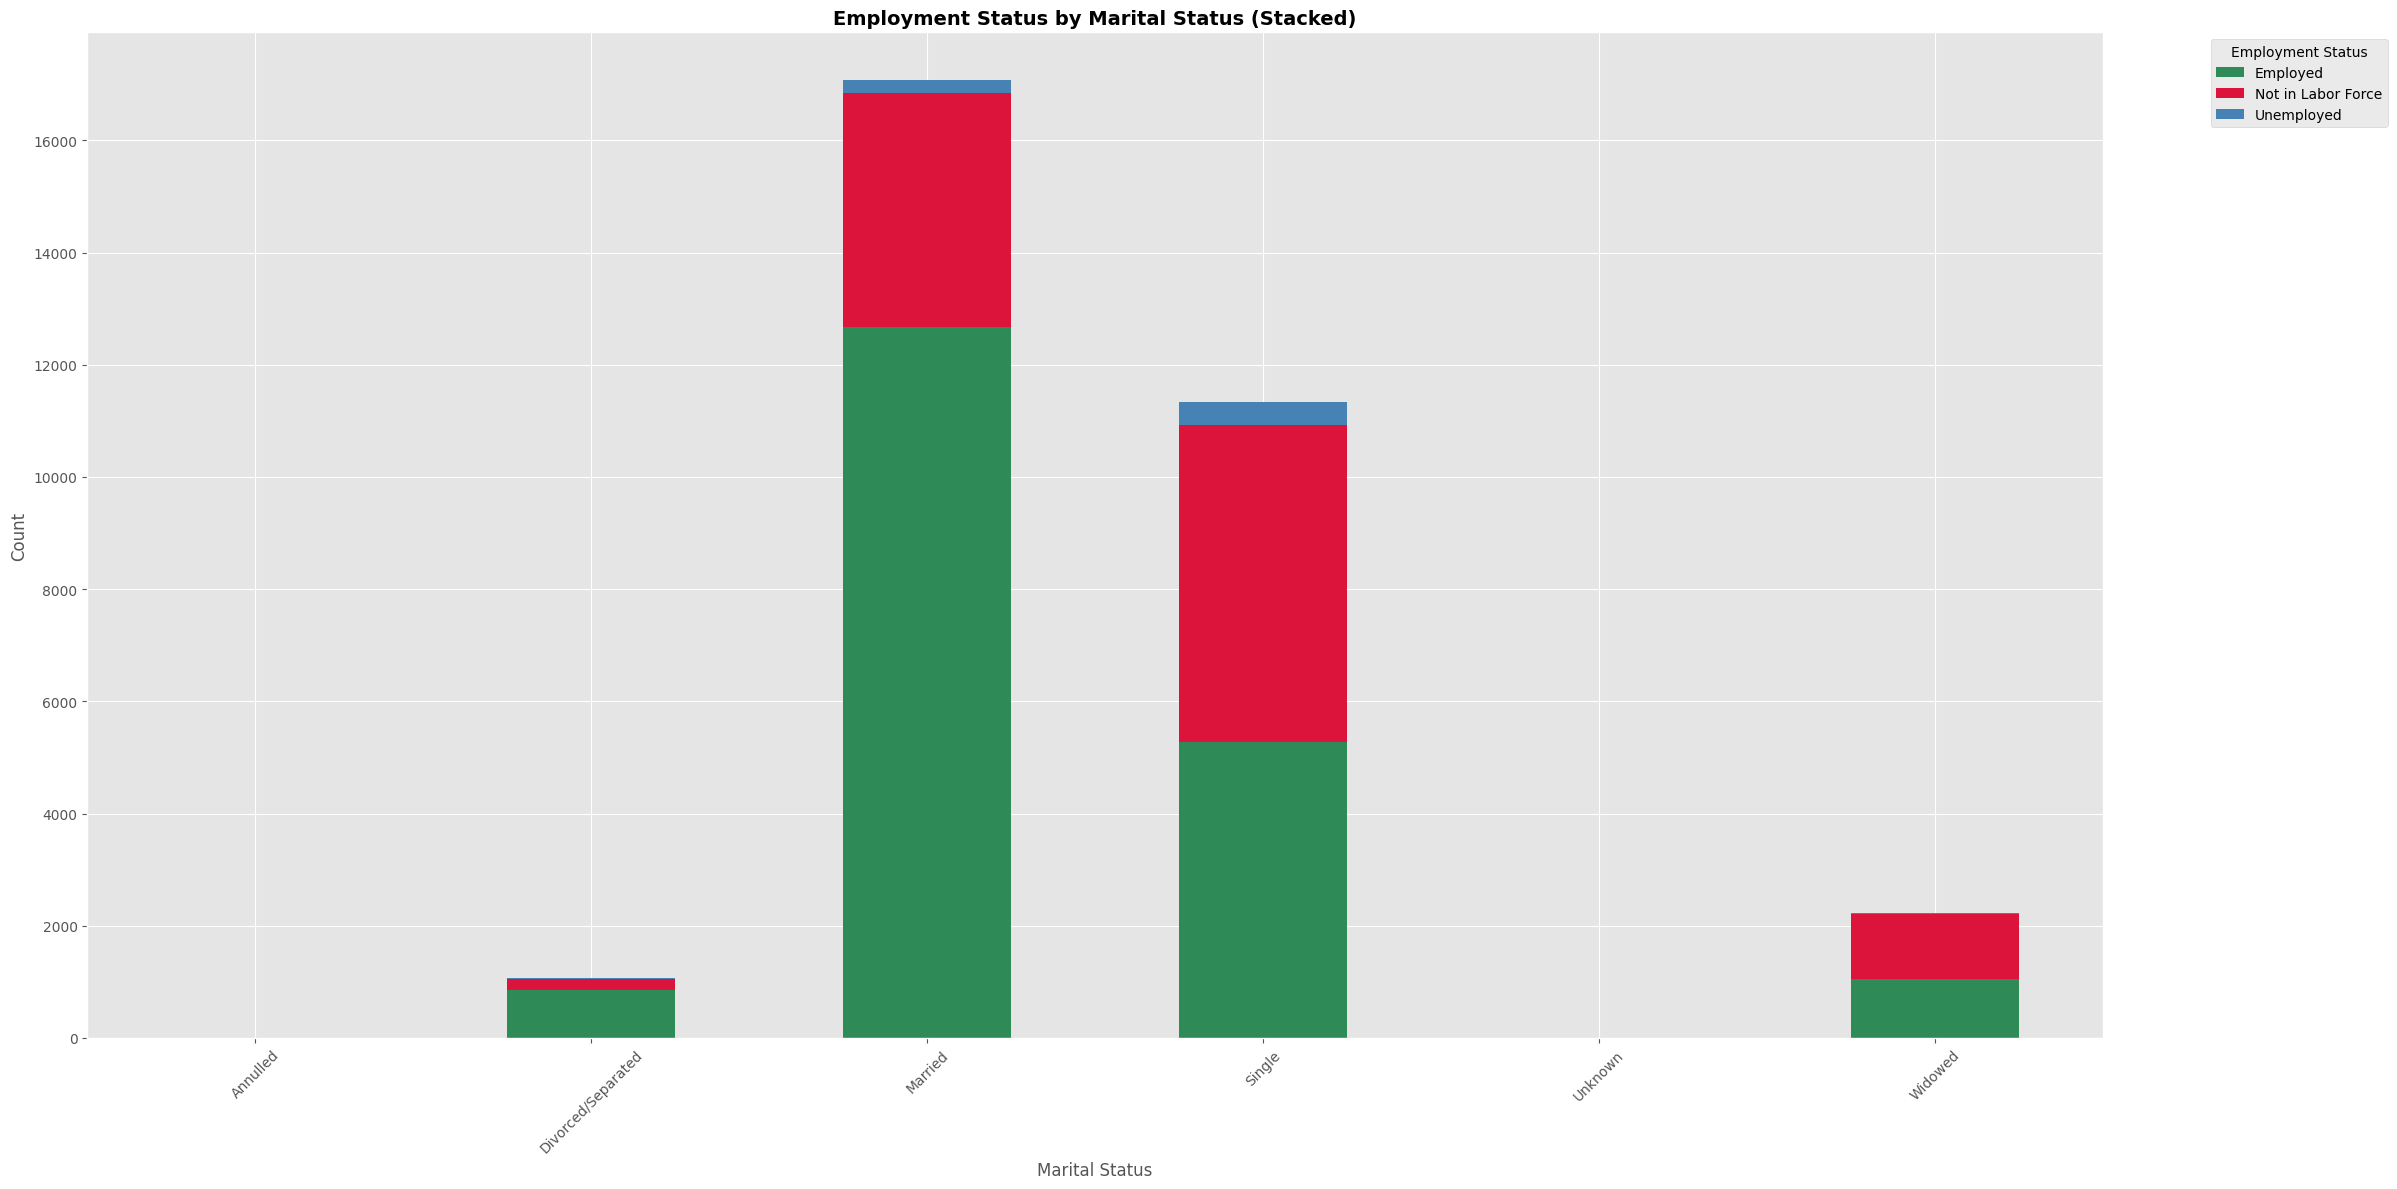

Cross-tabulation of Marital Status vs Employment Status:
Employment_Status_Label  Employed  Not in Labor Force  Unemployed
Marital_Status_Label                                             
Annulled                        3                   2           0
Divorced/Separated            862                 181          32
Married                     12672                4178         222
Single                       5266                5664         399
Unknown                         2                   1           0
Widowed                      1043                1171          17


In [31]:
crosstab.plot(kind='bar', stacked=True, figsize=(24, 12), color=['#2E8B57', '#DC143C', '#4682B4'])
plt.title('Employment Status by Marital Status (Stacked)', fontsize=14, fontweight='bold')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
print("Cross-tabulation of Marital Status vs Employment Status:")
print(crosstab)

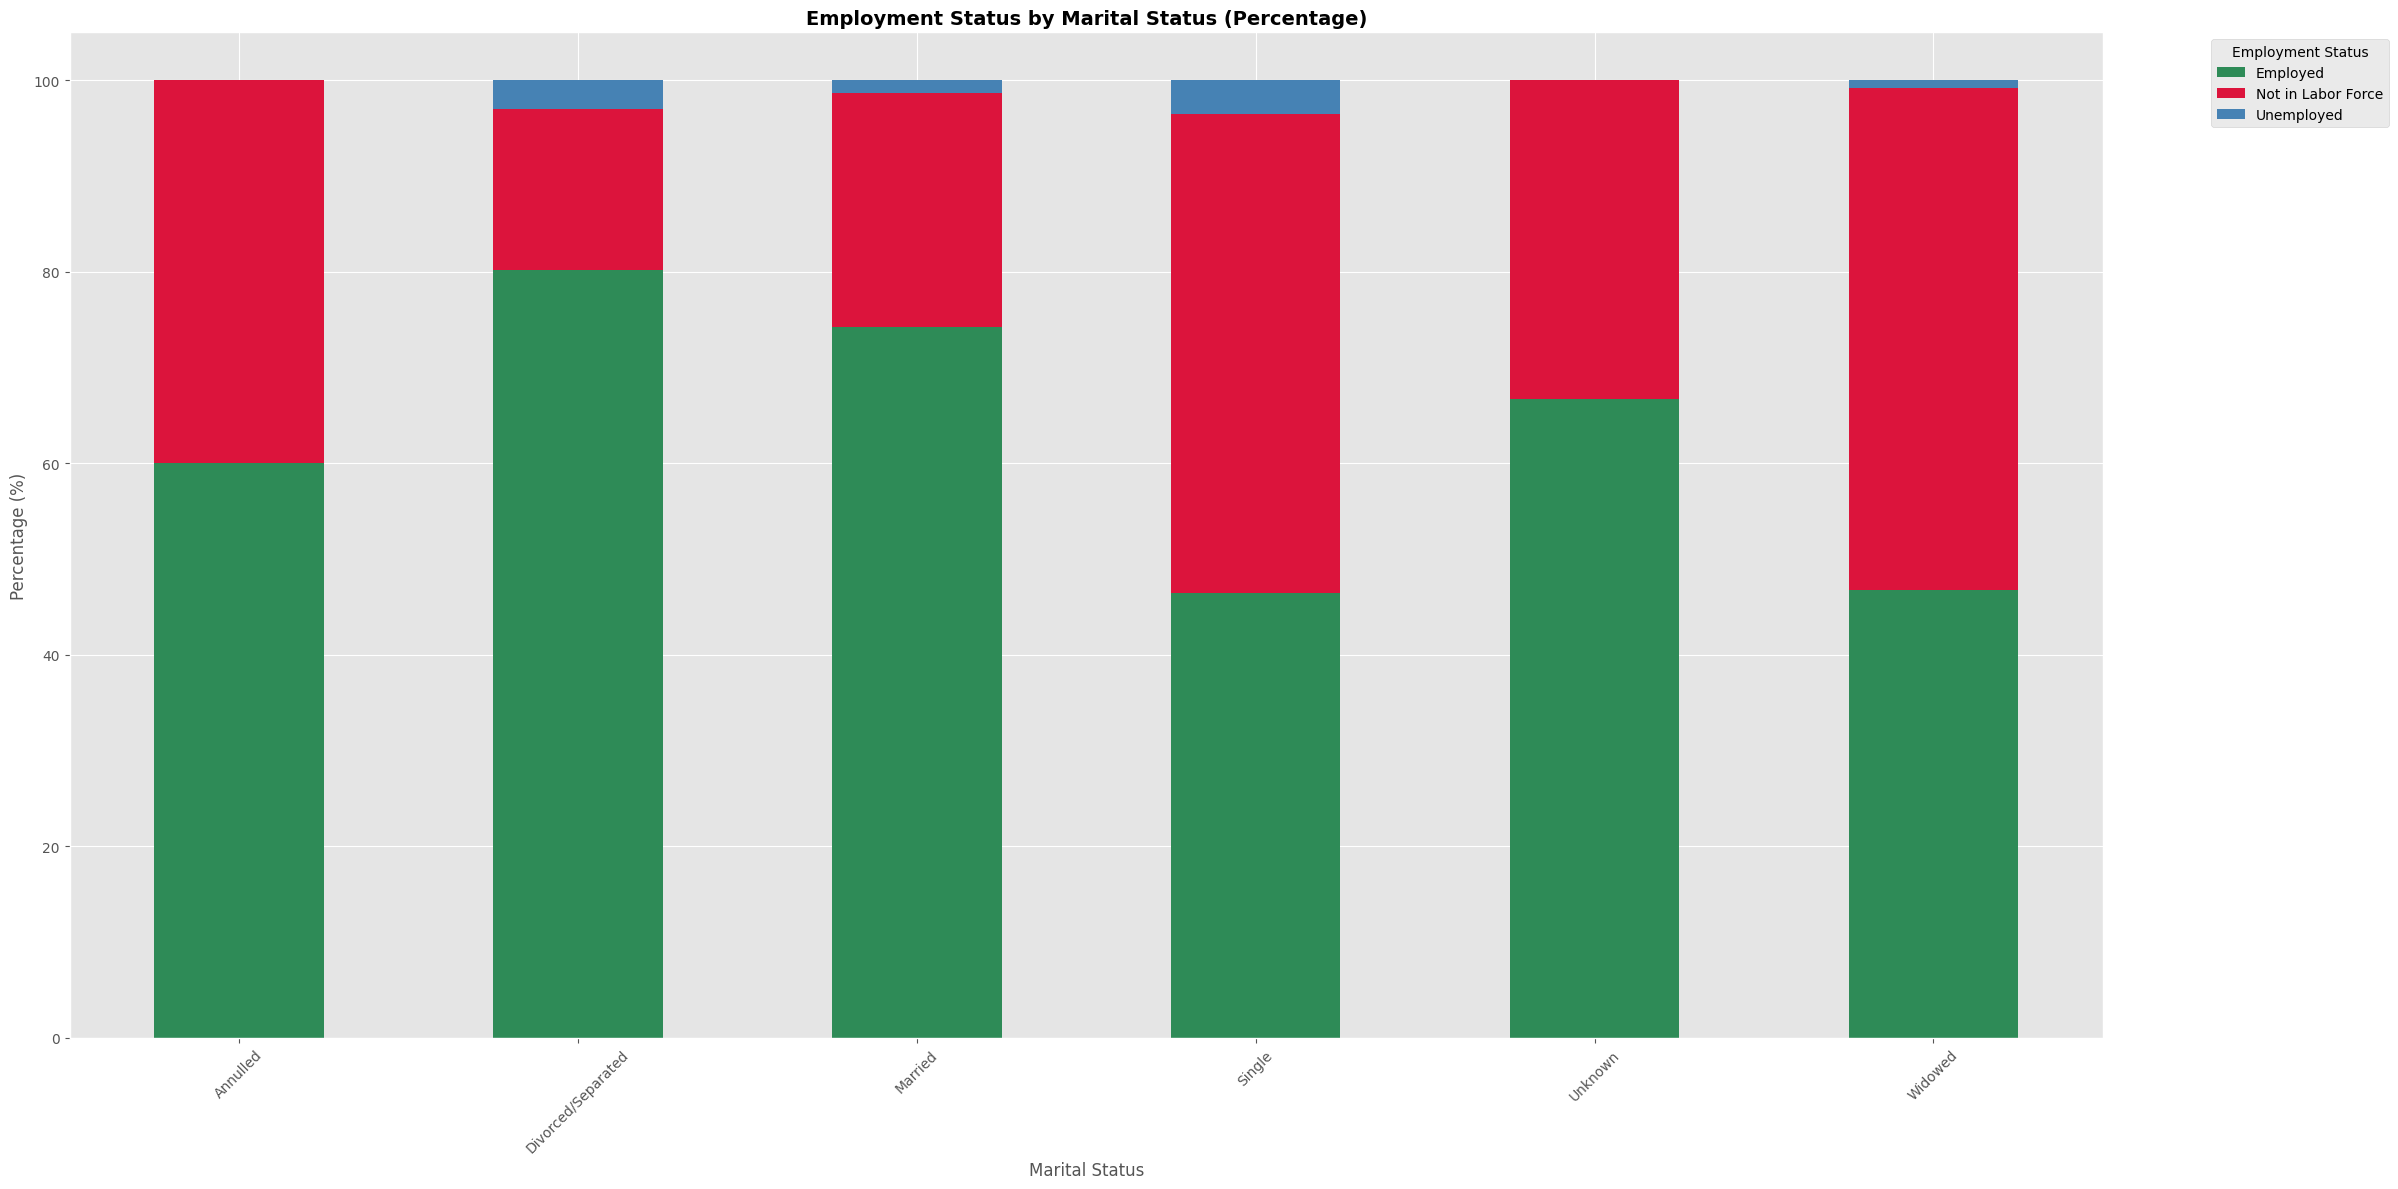


Percentages by Marital Status:
Employment_Status_Label  Employed  Not in Labor Force  Unemployed
Marital_Status_Label                                             
Annulled                    60.00               40.00        0.00
Divorced/Separated          80.19               16.84        2.98
Married                     74.23               24.47        1.30
Single                      46.48               50.00        3.52
Unknown                     66.67               33.33        0.00
Widowed                     46.75               52.49        0.76


In [32]:
crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0) * 100
crosstab_pct.plot(kind='bar', stacked=True, figsize=(24, 12), color=['#2E8B57', '#DC143C', '#4682B4'])
plt.title('Employment Status by Marital Status (Percentage)', fontsize=14, fontweight='bold')
plt.xlabel('Marital Status')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\nPercentages by Marital Status:")
print((crosstab.div(crosstab.sum(axis=1), axis=0) * 100).round(2))

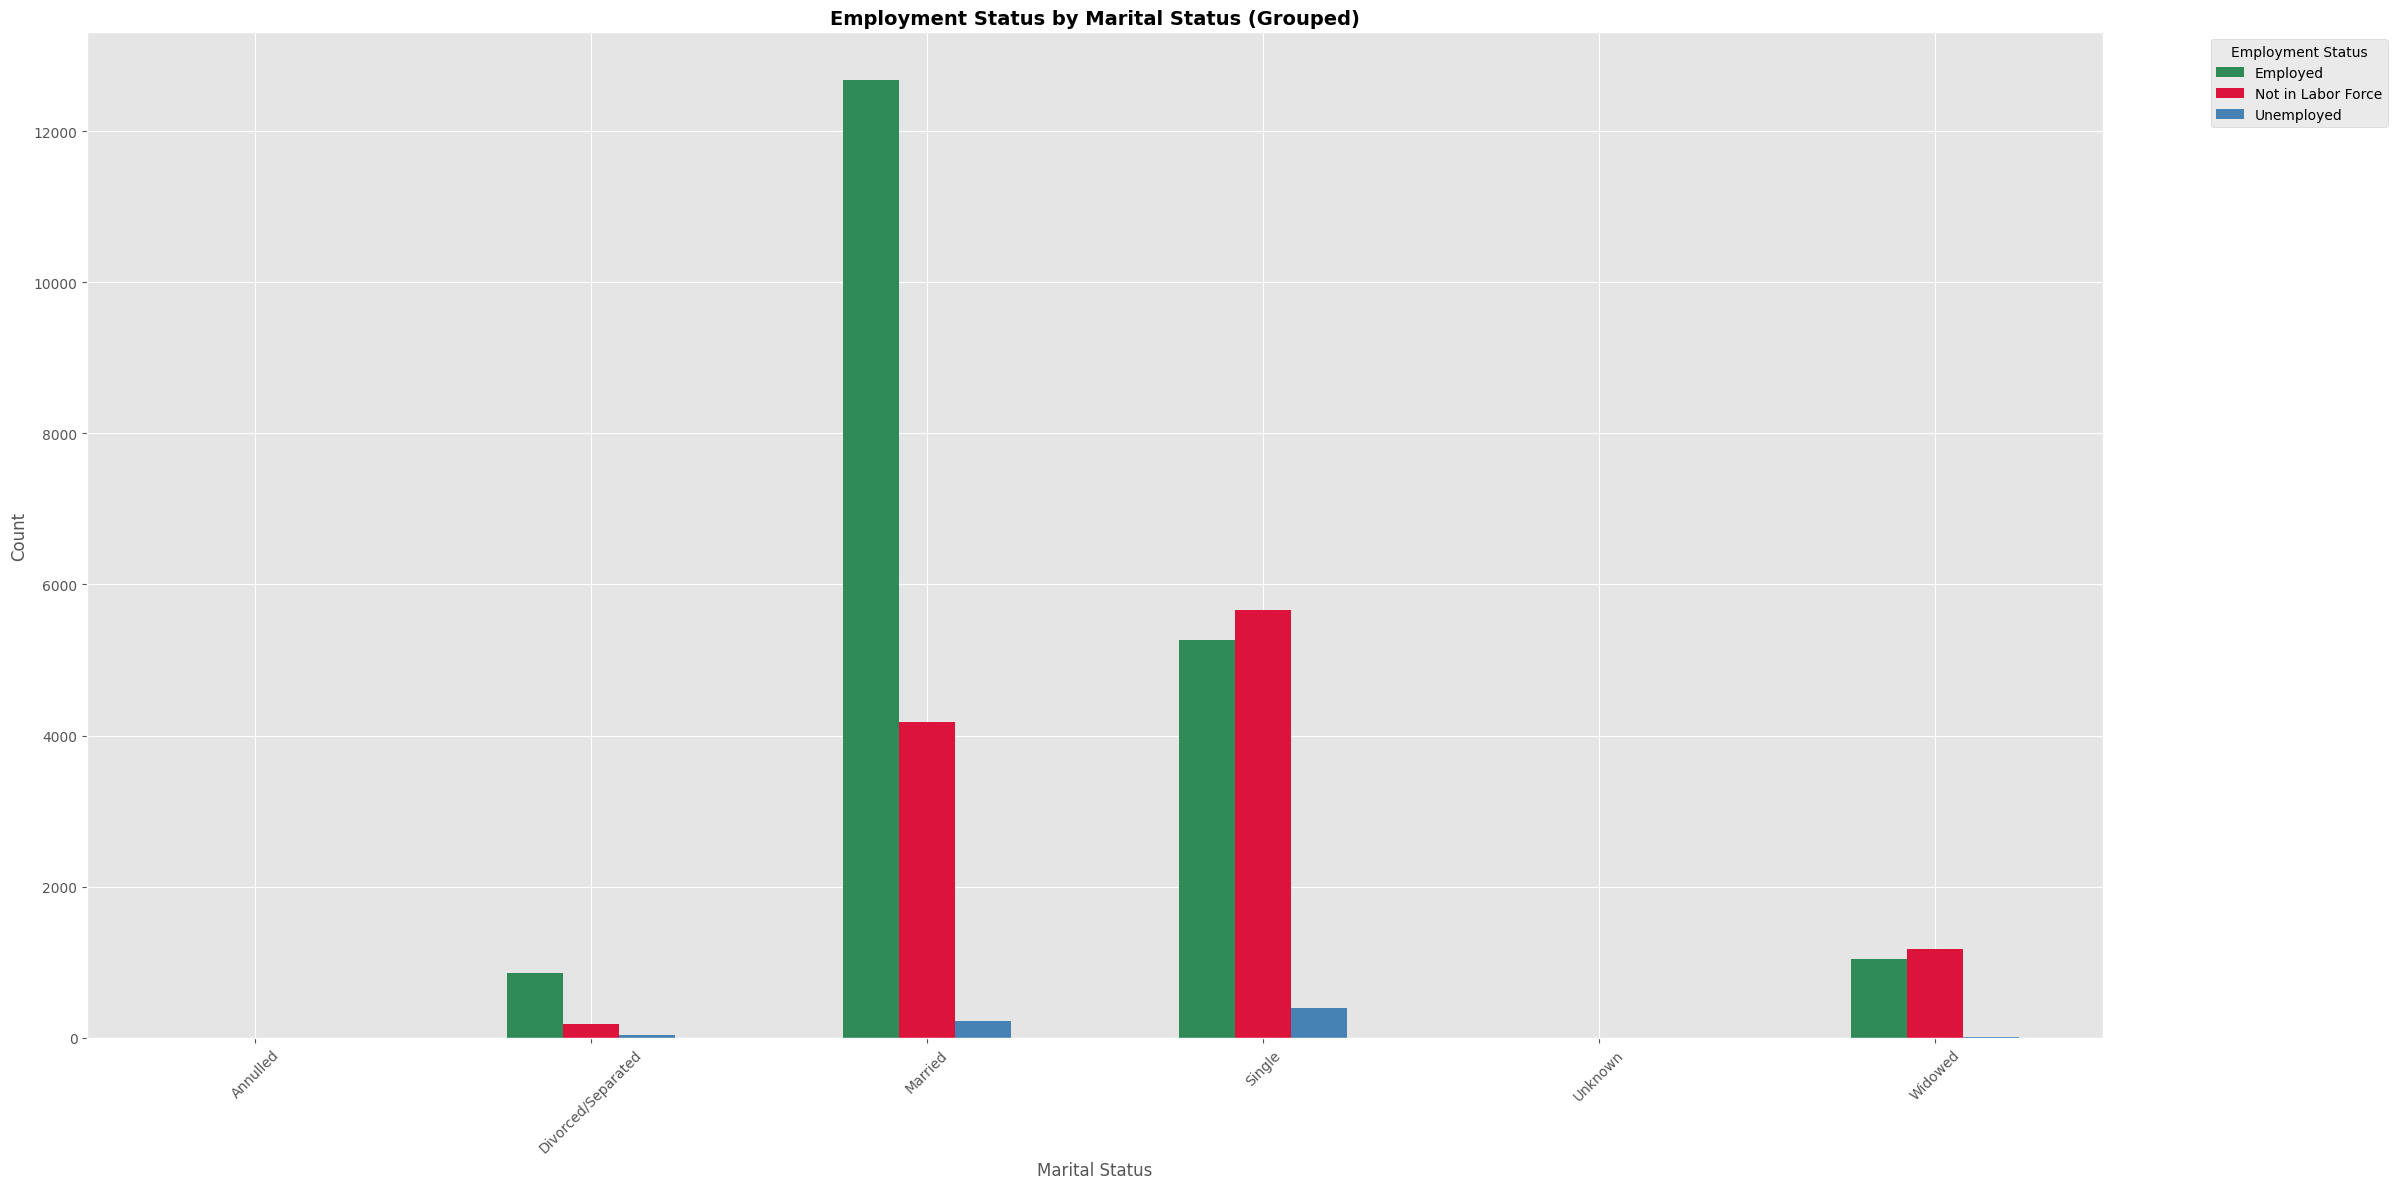

In [33]:
crosstab.plot(kind='bar', figsize=(24, 12), color=['#2E8B57', '#DC143C', '#4682B4'])
plt.title('Employment Status by Marital Status (Grouped)', fontsize=14, fontweight='bold')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [34]:
df_marriage_employment['Sex'] = df_marriage_employment['PUFC04_SEX'].map({1: 'Male', 2: 'Female'})
df_marriage_employment = df_marriage_employment.dropna(
    subset=['Marital_Status_Label', 'Employment_Status_Label', 'Sex']
)

colors = {'Male': 'skyblue', 'Female': 'pink'}

crosstab = pd.crosstab(
    [df_marriage_employment['Employment_Status_Label'], df_marriage_employment['Marital_Status_Label']],
    df_marriage_employment['Sex']
)

crosstab = crosstab.reindex(index=pd.MultiIndex.from_product(
    [employment_status_map.values(), marital_status_map.values()],
    names=['Employment Status', 'Marital Status']
), fill_value=0)


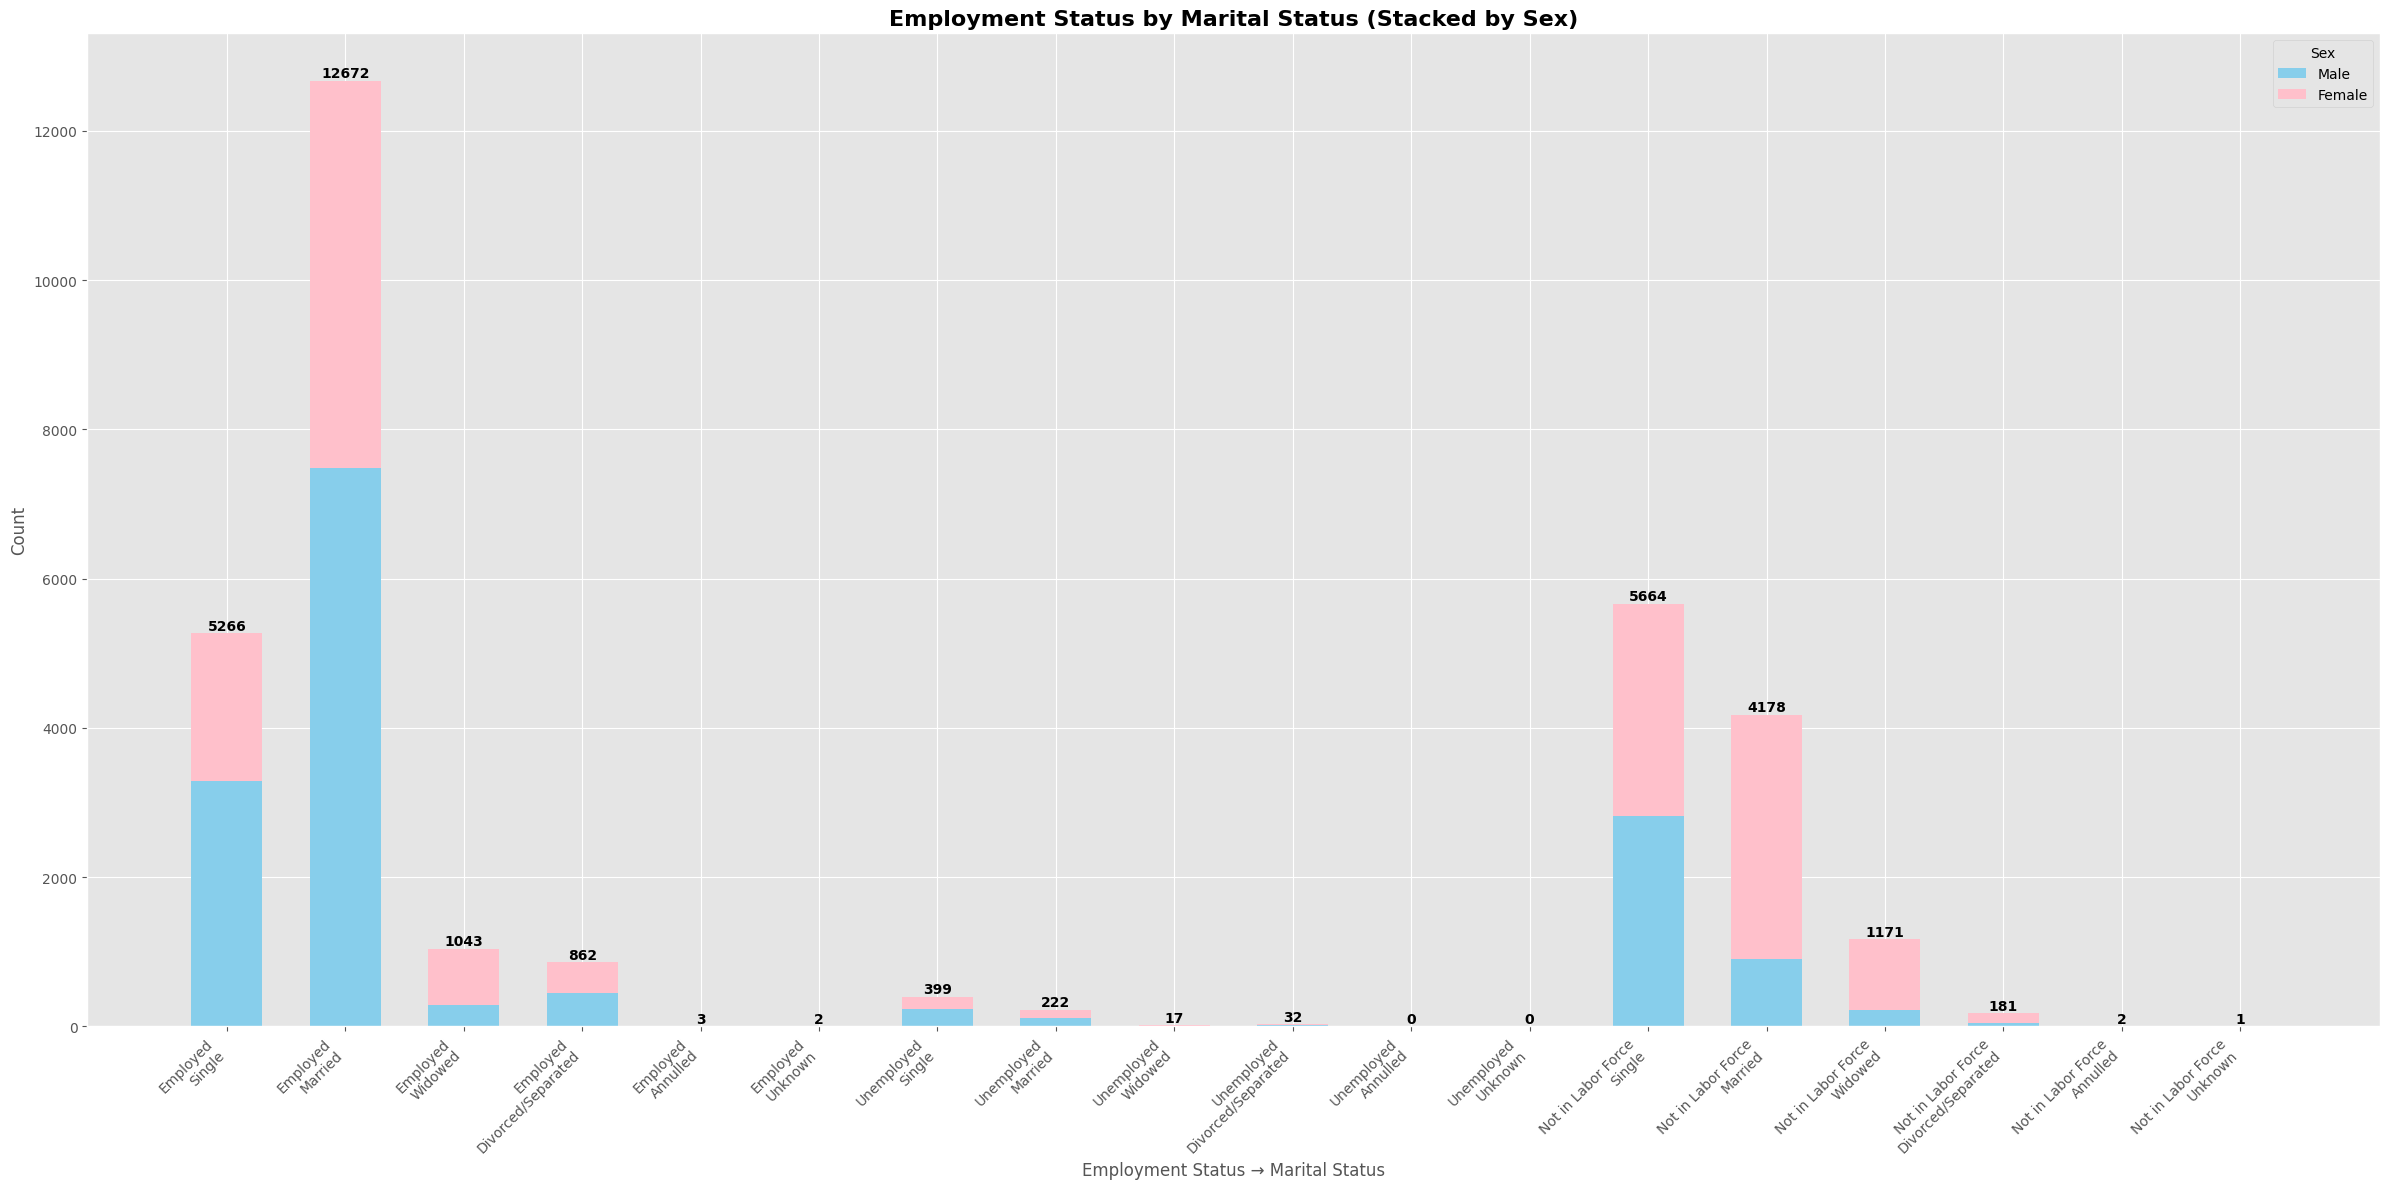

In [35]:
fig, ax = plt.subplots(figsize=(24, 12))

x = np.arange(len(crosstab))
bar_width = 0.6

ax.bar(x, crosstab['Male'], width=bar_width, label='Male', color=colors['Male'])

ax.bar(x, crosstab['Female'], width=bar_width, bottom=crosstab['Male'], label='Female', color=colors['Female'])

#add total counts on top para kita yung parang empty bars
totals = crosstab['Male'] + crosstab['Female']
for i, total in enumerate(totals):
    ax.text(x[i], total + 5, str(total), ha='center', va='bottom', fontsize=10, fontweight='bold')

labels = [f"{e}\n{m}" for e, m in crosstab.index]
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')

ax.set_title('Employment Status by Marital Status (Stacked by Sex)', fontsize=16, fontweight='bold')
ax.set_xlabel('Employment Status → Marital Status')
ax.set_ylabel('Count')
ax.legend(title='Sex')
plt.tight_layout()
plt.show()

In [36]:
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)
print(f"Total records analyzed: {len(df_marriage_employment)}")
print(f"Marital status categories: {df_marriage_employment['Marital_Status_Label'].nunique()}")
print(f"Employment status categories: {df_marriage_employment['Employment_Status_Label'].nunique()}")

print("\nEmployment rate by marital status:")
employment_rate = df_marriage_employment.groupby('Marital_Status_Label')['Employment_Status_Label'].apply(
    lambda x: (x == 'Employed').sum() / len(x) * 100
).round(2)
print(employment_rate)


SUMMARY STATISTICS
Total records analyzed: 31715
Marital status categories: 6
Employment status categories: 3

Employment rate by marital status:
Marital_Status_Label
Annulled              60.00
Divorced/Separated    80.19
Married               74.23
Single                46.48
Unknown               66.67
Widowed               46.75
Name: Employment_Status_Label, dtype: float64


##### Bar plot: `Region` vs. 'Employment Status'

In [37]:
region_map = {
    13: 'NCR',
    14: 'CAR',
    1: 'Reg 1',
    2: 'Reg 2',
    3: 'Reg 3',
    4: 'Reg 4A',
    17: 'Reg 4B',
    5: 'Reg 5',
    6: 'Reg 6',
    7: 'Reg 7',
    8: 'Reg 8',
    9: 'Reg 9',
    10: 'Reg 10',
    11: 'Reg 11',
    12: 'Reg 12',
    16: 'Reg 13',
    19: 'ARMM',
}

# National Capital Region  (NCR)	13
# Cordillera Administrative Region  (CAR)	14
# Region I  (Ilocos Region)	1
# Region II  (Cagayan Valley)	2
# Region III  (Central Luzon)	3
# Region IV-A  (CALABARZON)	4
# MIMAROPA Region	17
# Region V  (Bicol Region)	5
# Region VI  (Western Visayas)	6
# Region VII  (Central Visayas)	7
# Region VIII  (Eastern Visayas)	8
# Region IX  (Zamboanga Peninsula)	9
# Region X  (Northern Mindanao)	10
# Region XI  (Davao Region)	11
# Region XII  (SOCCSKSARGEN)	12
# Region XIII  (Caraga)	16
# Autonomous Region in Muslim Mindanao  (ARMM)	19

df_region_employment = lfs_data.copy()
df_region_employment['Region'] = df_region_employment['PUFREG'].map(region_map)
df_region_employment['Employment_Status_Label'] = df_region_employment['PUFNEWEMPSTAT'].map(employment_status_map)

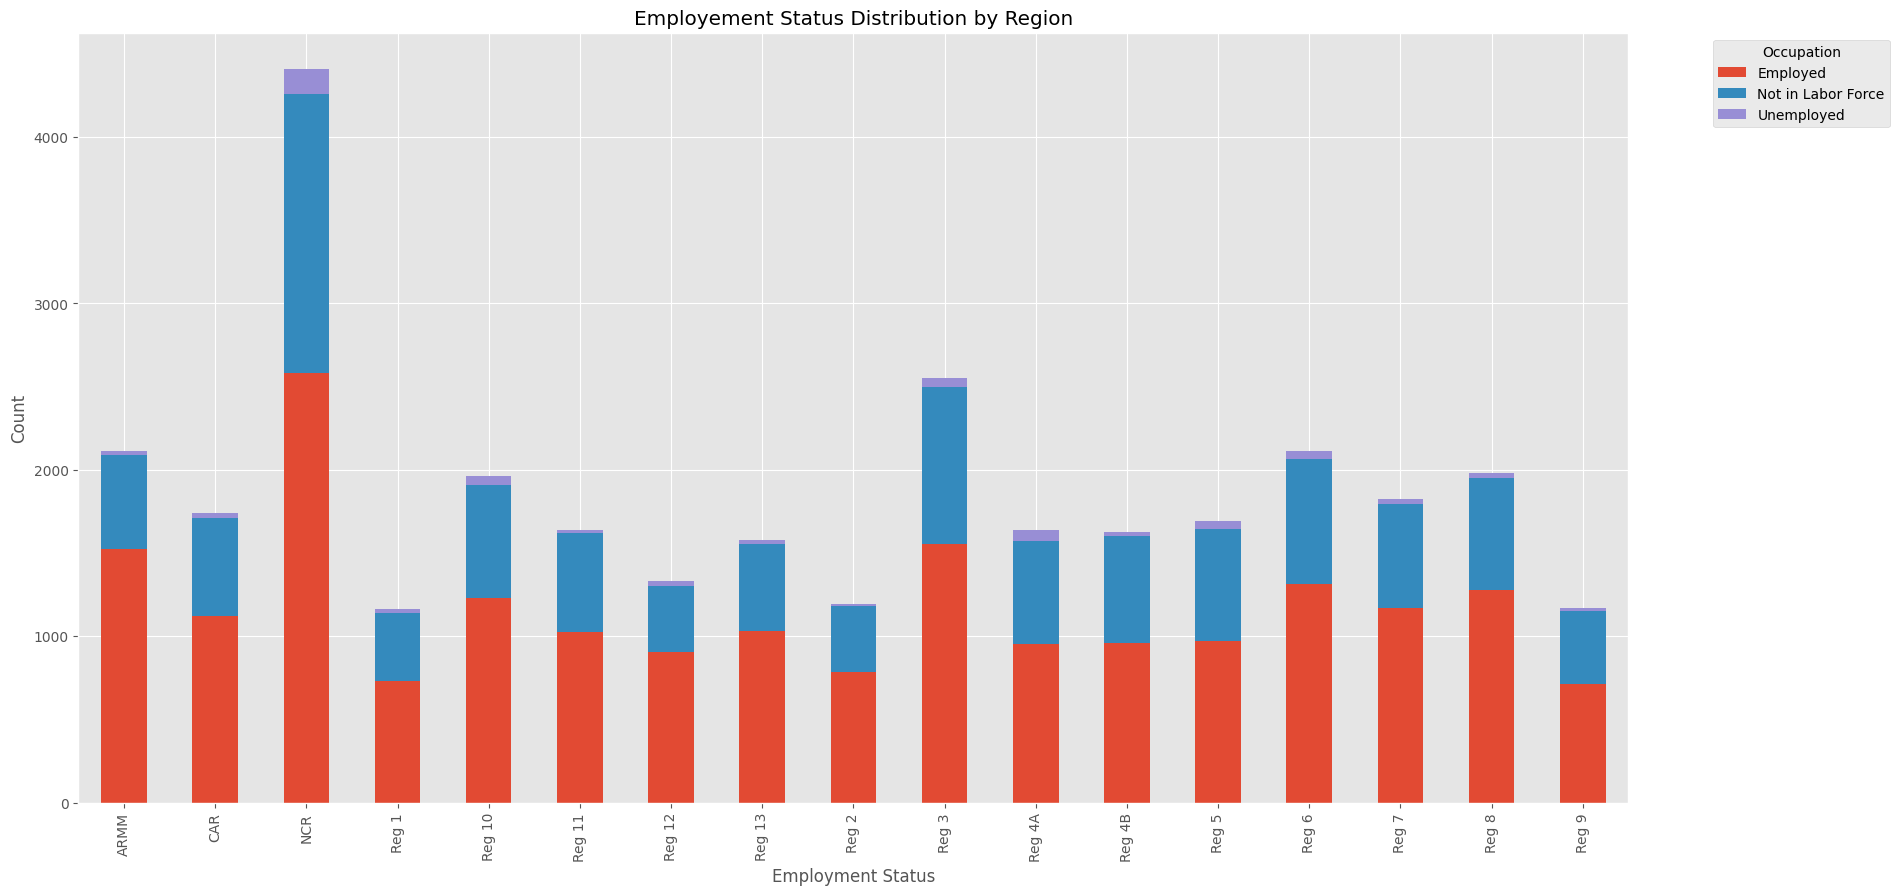

In [38]:
region_employment = df_region_employment.groupby(['Region', 'Employment_Status_Label']).size().unstack(fill_value=0)
region_employment.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Employement Status Distribution by Region')
plt.xlabel('Employment Status')
plt.ylabel('Count')
# plt.xticks([-1, 1, 2, 3], ['Unknown', 'Employed', 'Unemployed', 'Not in the Labor Force'], rotation=0)
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [39]:
print("Statistics for all employment statuses:")
i=0
for status_name, ages_series in {
    "Individuals with Null Employment Status": null_ages,
    "Individuals with Employed Status": employed_ages,
    "Individuals with Unemployed Status": unemployed_ages,
    "Individuals who are not in the Labor Force": not_in_labor_force_ages
}.items():
    if not ages_series.empty:
        print(f"\n--- {status_name} ---")
        print(f"  Number of Individuals: {len(ages_series)}")
        print(f"  Mean Age: {ages_series.mean():.2f}")
        print(f"  Median Age: {ages_series.median():.2f}")
        print(f"  Mode Age: {ages_series.mode().tolist()}")
        print(f"  Standard Deviation of Age: {ages_series.std():.2f}")

        i+=1
    else:
        print(f"\n--- {status_name} (No data) ---")

Statistics for all employment statuses:

--- Individuals with Null Employment Status ---
  Number of Individuals: 11544
  Mean Age: 7.72
  Median Age: 8.00
  Mode Age: [12]
  Standard Deviation of Age: 4.35

--- Individuals with Employed Status ---
  Number of Individuals: 19848
  Mean Age: 41.34
  Median Age: 40.00
  Mode Age: [30]
  Standard Deviation of Age: 14.46

--- Individuals with Unemployed Status ---
  Number of Individuals: 670
  Mean Age: 32.15
  Median Age: 28.00
  Mode Age: [23]
  Standard Deviation of Age: 12.19

--- Individuals who are not in the Labor Force ---
  Number of Individuals: 11197
  Mean Age: 36.87
  Median Age: 25.00
  Mode Age: [16]
  Standard Deviation of Age: 22.34


#### 📉 Summary of Insights:
- Employment tends to increase with age until mid-30s, then plateaus or drops.
- Men are more likely to be employed than women in this dataset.
- Married individuals show higher employment, possibly due to financial responsibility.
- Regional disparities exist, with NCR showing higher employment than other regions.

- The "Null" status correctly identifies a population group that is largely too young to be part of the workforce.
- The "Employed" group is concentrated in the prime working ages, as expected.
- The "Unemployed" are younger individuals likely at the start of their careers and actively seeking employment.
- The "Not in the Labor Force" category is the most varied in terms of age. The skewed distribution points to a mix of younger individuals in precarious work situations and a smaller number of older, more experienced workers who are temporarily without work. This group warrants further investigation to understand the different sub-populations within it.

#### 📉 Summary of Employment and Demographic Patterns:
1. Age Distribution by Employment Status:
    - Employed individuals are the oldest group on average (mean age ~41), suggesting employment is concentrated among working-age adults.
    - Temporarily unemployed and unemployed individuals are younger on average (mean age ~36.9 and ~32.2, respectively), but with greater variation in age (especially among the temporarily unemployed, with a high standard deviation of 22.34).
    - Null or missing employment status is largely associated with children or non-working dependents (mean age ~9.7), confirmed by the mode being 12 years old.
2. Working Hours Reflect Similar Patterns:
    - Those with at least 1 hour of work in the past week mirror the profile of employed individuals (mean age ~41.2).
    - Those with no working hours have a younger average age (~25.5), with many likely being students or dependents.
    - Individuals with null working hours (possibly very young children) show an extremely low median age of 3, reinforcing this interpretation.
3. Gender Ratios:
    - Employed individuals are more likely to be male (M:F ratio of 1.38).
    - Temporarily unemployed individuals are more likely to be female (M:F ratio of 0.56).
    - The unemployed group is also male-leaning, while the unknown group is nearly balanced.
4. Marital Status and Employment:
    - Married individuals have the highest employment rate (74.23%) and dominate the employed group numerically (12,672 people).
    - Single individuals are more evenly distributed, with nearly half not in the labor force (50%) and a modest unemployment rate (3.52%).
    - Widowed individuals are mostly not in the labor force (52.49%), likely due to age or retirement.
    - Those who are divorced/separated have the highest employment percentage overall (80.19%), indicating economic activity post-marriage is common.
    - Annulled and unknown marital statuses are rare, but tend to show high employment rates as well.

### BONUS:

Let's view this with a different lens; compare the occupations of the Filipino population with their ages.

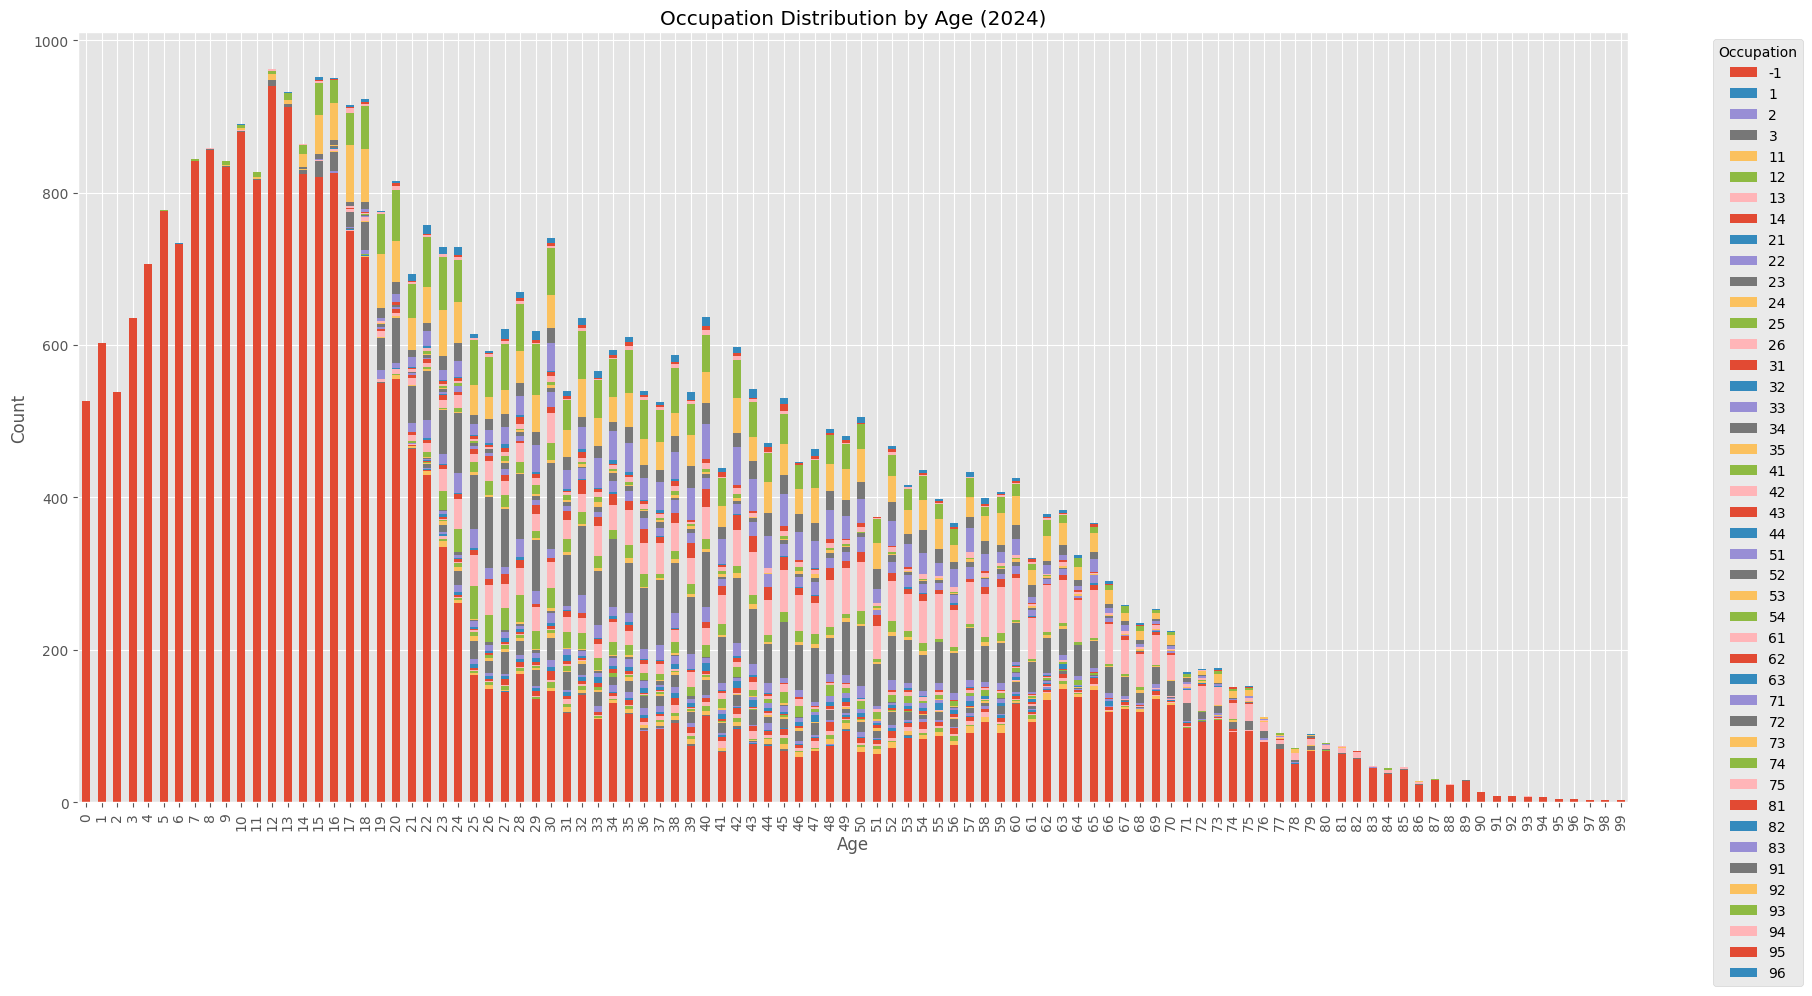

In [40]:
occupation_sex = lfs_data.groupby(['PUFC05_AGE', 'PUFC13_PROCC']).size().unstack(fill_value=0)
occupation_sex.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Occupation Distribution by Age (2024)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Just for the sake of better visibility, let us create a mask and visualize the same histogram but this time without all the whitespace values (all the people who do not have jobs).

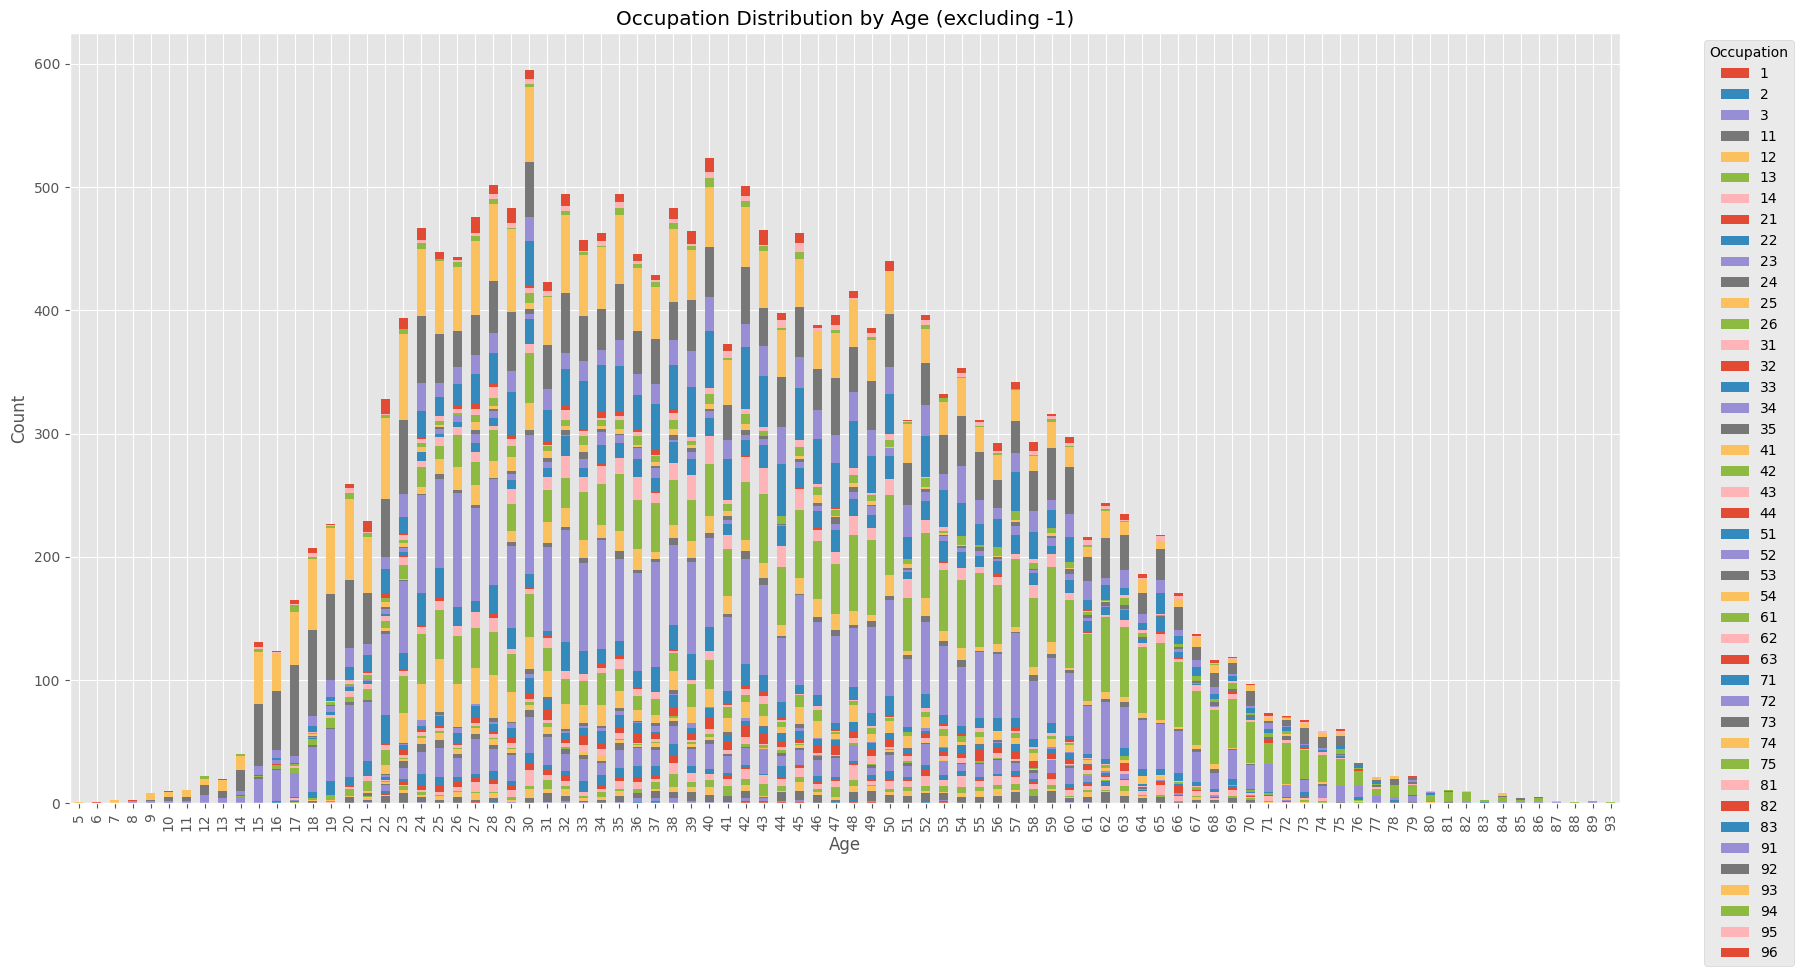

In [41]:
mask = (lfs_data['PUFC13_PROCC'] != -1) & (lfs_data['PUFC13_PROCC'] != '  ')

lfs_data_filtered = lfs_data[mask].copy()

occupation_sex = lfs_data_filtered.groupby(['PUFC05_AGE', 'PUFC13_PROCC']).size().unstack(fill_value=0)
occupation_sex.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Occupation Distribution by Age (excluding -1)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [42]:
print(f"Minimum Age: {lfs_data_filtered['PUFC05_AGE'].min(numeric_only=True)}")
print(f"Maximum Age: {lfs_data_filtered['PUFC05_AGE'].max(numeric_only=True)}")

Minimum Age: 5
Maximum Age: 93


This histogram shows a shocking truth where kids as early as 5 years old are already given jobs and occupations; majority of which are in the agricultural sector. 

That's honestly just a sad reality. 

# ☹️

___

#### Section 2.3.2 - Education & Employability

##### Research Sub-Question: 
* Does the highest grade completed (educational attainment) significantly affect a person's employability?

##### Why This Matters: 
* Educational attainment is widely regarded as a key driver of employability. It shapes skill level, job qualifications, and access to formal employment sectors. Investigating its impact helps assess whether the labor market rewards education fairly and can inform investments in educational reform and workforce development.

##### Stacked bar plot: `Education` vs. `Employment Status`

In the dataset, educational attainment is stored in the `PUFC07_GRADE_VS2` variable as numeric code representing the highest grade completed. The level of schoolings are categorized to the following:
* `No Grade Completed` 
* `Elementary Undergraduate`
* `Elementary Graduate`
* `Junior High School Undergraduate`
* `Junior High School Graduate`
* `Senior High School Undergraduate`
* `Senior High School Graduate`
* `Post Secondary Undergraduate`
* `Post Secondary Graduate`
* `College Undergraduate`
* `College Graduate`

To make it human-readable and easier to analyze, we first mapped each code to its equivalent category using the `classify_education` function:

In [43]:
def classify_education(code):
    if 0 <= code <= 2000:
        return 'No Grade Completed'
    elif 10011 <= code <= 10015 or 10004 <= code <= 10006:
        return 'Elementary Undergraduate'
    elif 10016 <= code <= 10018:
        return 'Elementary Graduate'
    elif 24011 <= code <= 24013 or 24004 <= code <= 24006:
        return 'Junior High School Undergraduate'
    elif code == 24015:
        return 'Junior High School Graduate'
    elif code in [34011, 34021, 34031, 35011]:
        return 'Senior High School Undergraduate'
    elif code in [34013, 34023, 34033, 35013]:
        return 'Senior High School Graduate'
    elif 40001 <= code <= 40003 or 50001 <= code <= 50003:
        return 'Post Secondary Undergraduate'
    elif 40011 <= code <= 49999 or 50011 <= code <= 59999:
        return 'Post Secondary Graduate'
    elif 60001 <= code <= 60006:
        return 'College Undergraduate'
    elif 60000 <= code <= 89999:
        return 'College Graduate'
    else:
        return 'Unknown'

Let's proceed with the cross-tabulation that counts the number of people per education level, categorized by employment status.

In [44]:
education_order = [
    'No Grade Completed',
    'Elementary Undergraduate',
    'Elementary Graduate',
    'Junior High School Undergraduate',
    'Junior High School Graduate',
    'Senior High School Undergraduate',
    'Senior High School Graduate',
    'Post Secondary Undergraduate',
    'Post Secondary Graduate',
    'College Undergraduate',
    'College Graduate',
    'Unknown'
]

employment_status_map = {
    1: 'Employed',
    2: 'Unemployed',
    3: 'Not in Labor Force',
    -1: 'Unknown'
}

df_education_employment = lfs_data.copy()

df_education_employment['Education_Label'] = df_education_employment['PUFC07_GRADE'].apply(classify_education)
df_education_employment['Employment_Status_Label'] = df_education_employment['PUFNEWEMPSTAT'].map(employment_status_map)

# df_education_employment = df_education_employment.dropna(subset=['Education_Label', 'Employment_Status_Label'])

crosstab = pd.crosstab(df_education_employment['Education_Label'], 
    df_education_employment['Employment_Status_Label']).reindex(education_order)

Now, we can plot the employment status by education using a stacked bar chart. 

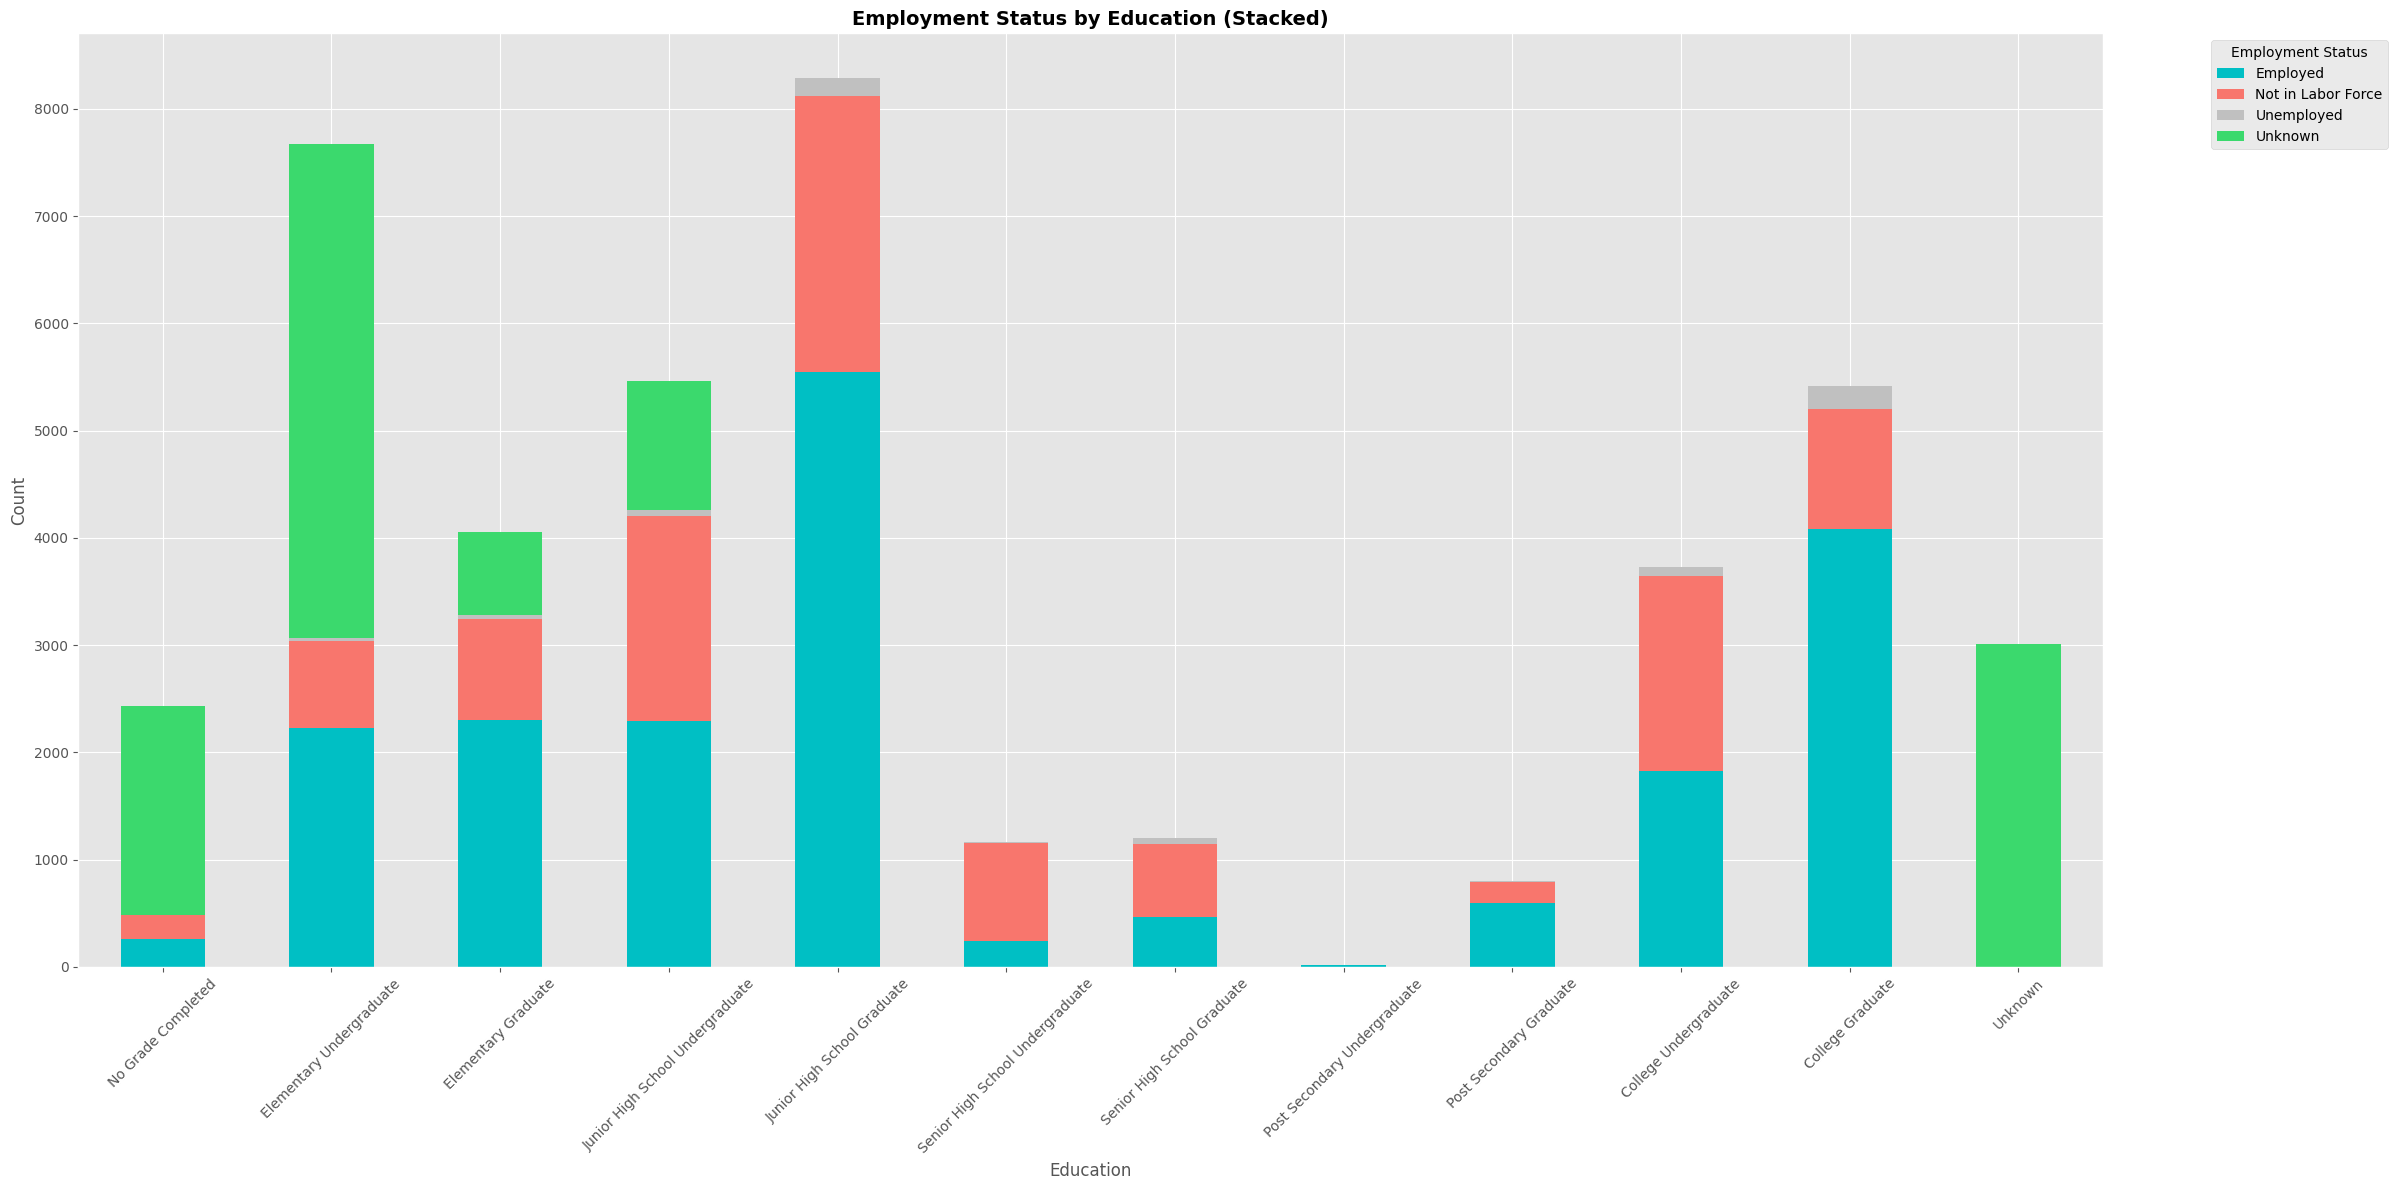

Cross-tabulation of Education vs Employment Status:
Employment_Status_Label           Employed  Not in Labor Force  Unemployed  Unknown
Education_Label                                                                    
No Grade Completed                     260                 223           0     1948
Elementary Undergraduate              2225                 810          31     4610
Elementary Graduate                   2300                 947          35      776
Junior High School Undergraduate      2289                1914          61     1196
Junior High School Graduate           5545                2579         165        1
Senior High School Undergraduate       243                 910          12        0
Senior High School Graduate            461                 687          53        0
Post Secondary Undergraduate            16                   3           2        0
Post Secondary Graduate                600                 188          15        0
College Undergraduate   

In [45]:
crosstab.plot(kind='bar', stacked=True, figsize=(24, 12), color=["#00BFC4", "#F8766D", "#C0C0C0", "#3BD96D"])
plt.title('Employment Status by Education (Stacked)', fontsize=14, fontweight='bold')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
print("Cross-tabulation of Education vs Employment Status:")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)
print(crosstab)

From the results of the cross-tabulation of education and employment status, we can see the following observations:

1. Higher education can result to high employment but not always
    * Individuals with a College Graduate education show the second highest number of employed individuals (4087), supporting the idea that having a college degree affects employability.
    * Those with College Undergraduate education also show a large number of employed individuals (1822). However, a nearly equal number are classified as Not in the Labor Force (1821), which suggests that:
        * They may still studying and have not entered the work force yet.
        * They may have temporarily or permanently exited labor force due to personal reasons such as housekeeping, disability, and retirement.
        - Note: "Not in the Labor Force" includes people aged 15 and above who are neither employed nor unemployed. These may include students, caretakers, persons with disabilities, or retired individuals.
2. Junior High School Graduates show highest employment count
    * Surprisingly, Junior High School Graduates have the highest number of employed individuals (5545). This may suggest:
        * Many Filipinos begin working after completing junior high school.
        * Entering labor force at this education level may be driven by financial difficulties, limited access to further education, or availability of low or mid skill jobs.
3. There is a significant portion that is still in school or too young to work
    * Education levels like Senior High School Undergraduate (243 employed vs 910 not in the labor force) indicate that there is a possibility that individuals are likely still in school studying. This applies to other education levels.
4. The "Unknown" category reflects survey limitations
    * This category likely are consists of children who are too young. As specified in the survey, only 5 years old or older are required to answer the question. 
    * A large number of individuals fall under "Unknown", especially for early education levels, such as No Grade Completed (1950) and Elementary Undergraduate (4622).
    * Nevertheless, the data under this category should be interpret with caution and ideally excluded from analysis that involdes adult employement outcomes.
5. Reported unemployment is relatively low across all education levels
    * Unemployed individuals are people without work, currently available for work, and actively seeking work (or not not seeking due to: waiting for results, illness, discouraged)
    * The number of unemployed individuals is low compared to other categories:
        * Only 212 unemployed College Graduates (the most unemployed individuals) compared to 4087 employed and 1115 not in the labor force. 
    * Possible reasons:
        * Discouraged worker effect: They may be mistakenly classified as "Not in the Labor Force" because they no longer actively look for work.
        * Young students who have yet to start job-hunting may be excluded from unemployed category.
        * The survey design affects the overall low unemployment, as it may have prioritized the intent and effort to find work, not simply joblessness.

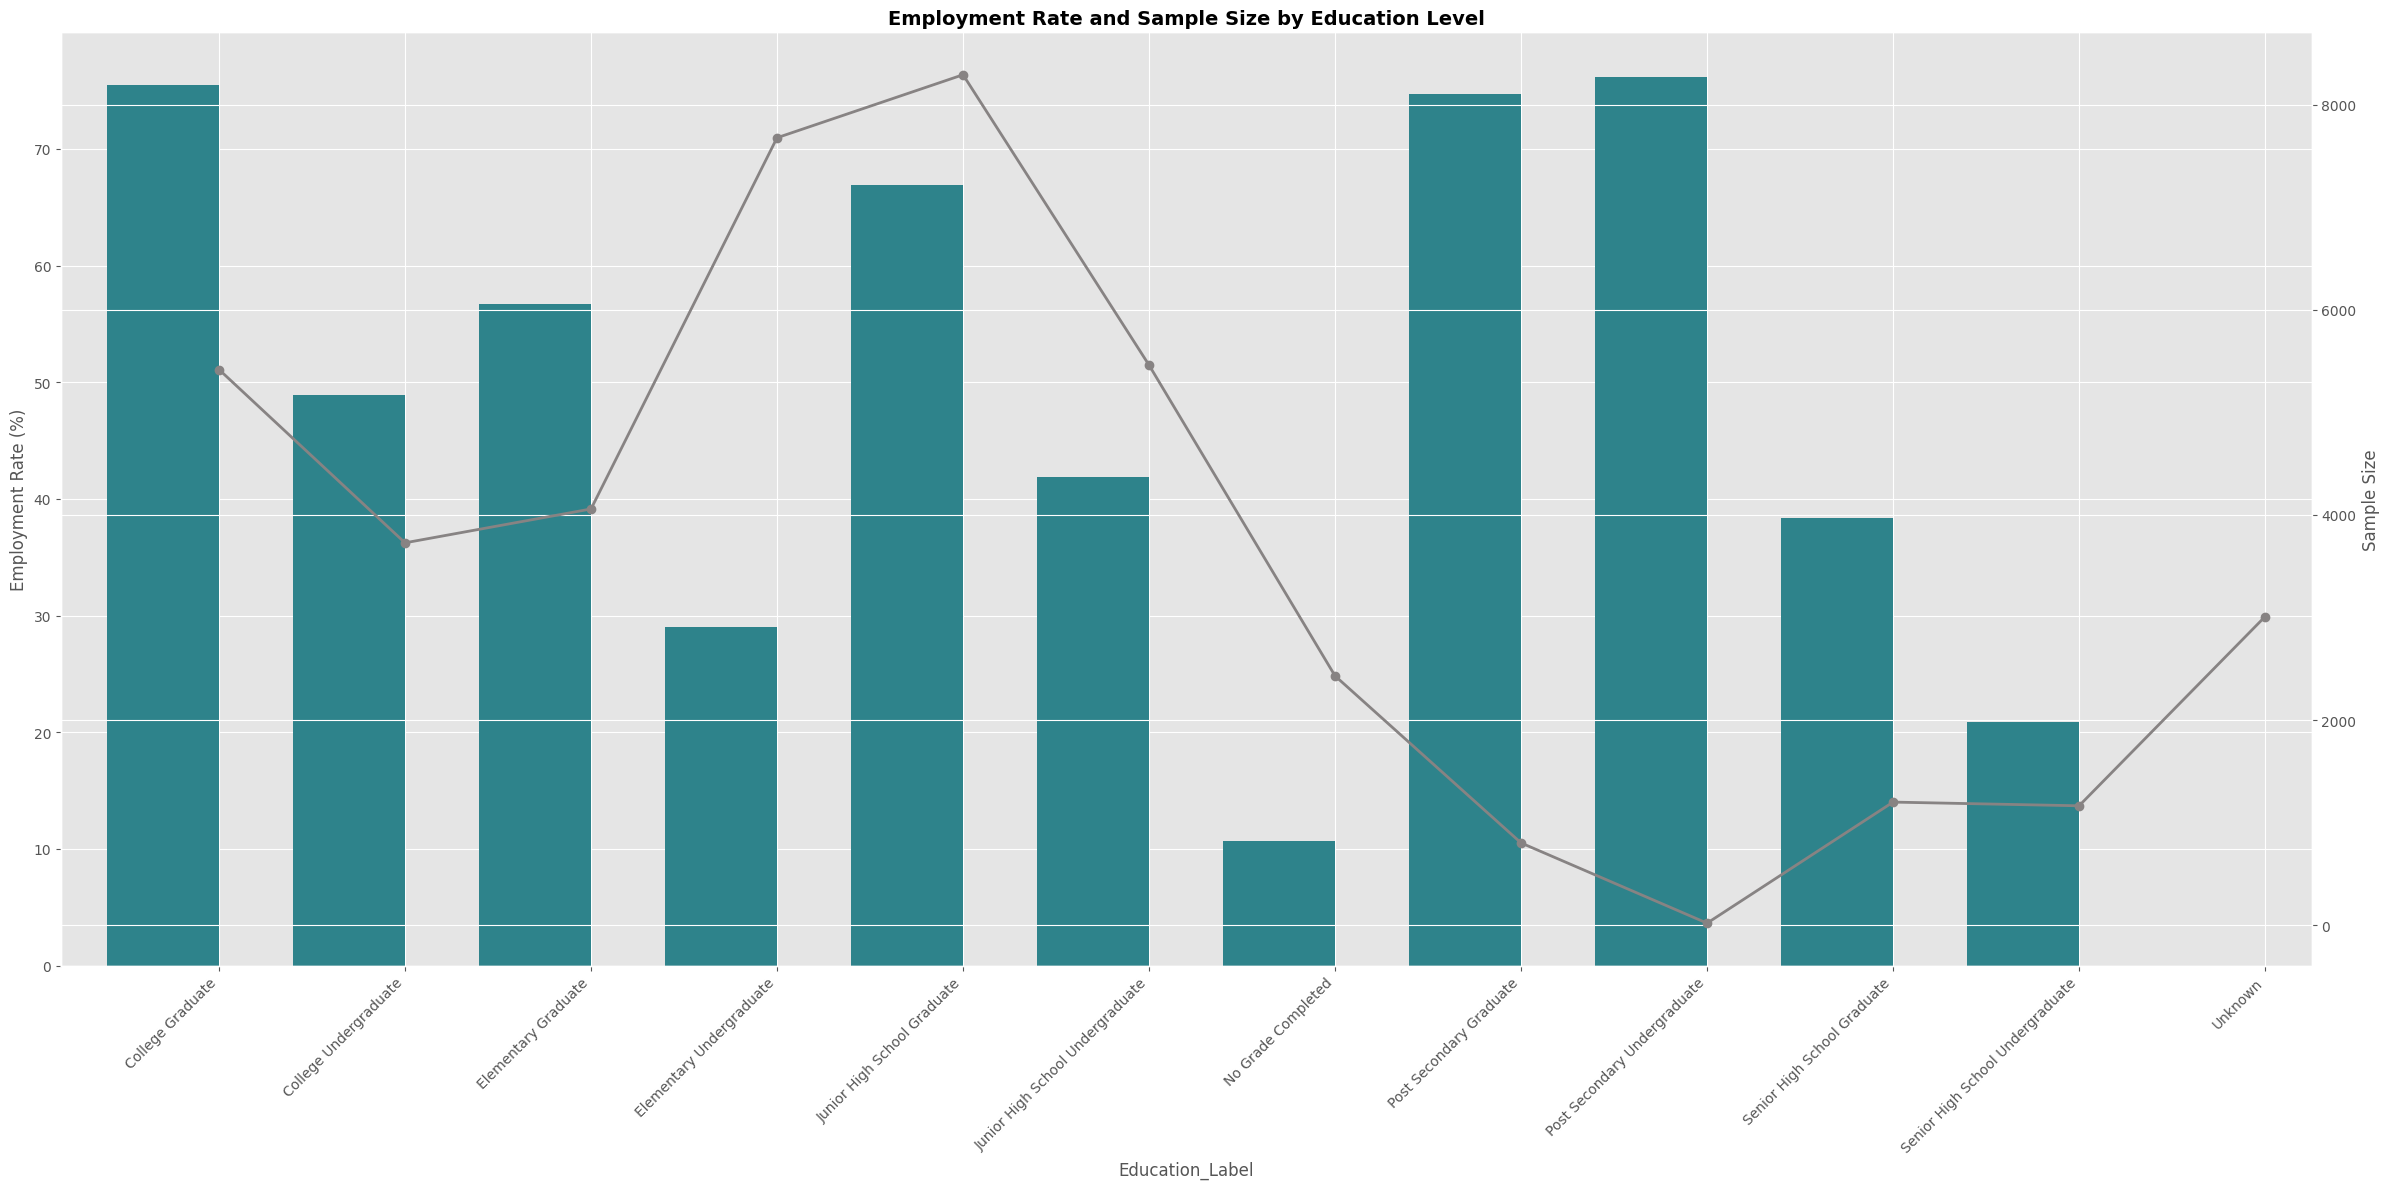


Employment rate by education:
                                  Employment Rate (%)  Sample Size
Education_Label                                                   
College Graduate                                75.45         5417
College Undergraduate                           48.87         3728
Elementary Graduate                             56.68         4058
Elementary Undergraduate                        28.99         7676
Junior High School Graduate                     66.89         8290
Junior High School Undergraduate                41.92         5460
No Grade Completed                              10.70         2431
Post Secondary Graduate                         74.72          803
Post Secondary Undergraduate                    76.19           21
Senior High School Graduate                     38.38         1201
Senior High School Undergraduate                20.86         1165
Unknown                                          0.00         3009


In [46]:
summary = df_education_employment.groupby('Education_Label')['Employment_Status_Label'].agg(
    employment_rate = lambda x: (x == 'Employed').sum(),
    sample_size = 'count'
)
summary['Employment Rate (%)'] = (summary['employment_rate']/summary['sample_size']*100).round(2)
summary = summary[['Employment Rate (%)', 'sample_size']]
summary = summary.rename(columns={'sample_size': 'Sample Size'})

#Plot
fig, bar = plt.subplots(figsize=(24, 12))

#Bar chart: Employment Rate (%)
summary['Employment Rate (%)'].plot(kind='bar', ax=bar, color="#2E838B", width=0.6, position=1)
bar.set_ylabel('Employment Rate (%)')
bar.tick_params(axis='y')
bar.set_xticklabels(summary.index, rotation=45, ha='right')
bar.set_title('Employment Rate and Sample Size by Education Level', fontsize=14, fontweight='bold')

#Line: Sample Size
line = bar.twinx()
line.plot(summary['Sample Size'], color="#878383", marker='o', linewidth=2)
line.set_ylabel('Sample Size')
line.tick_params(axis='y')
plt.tight_layout()
plt.show()

print("\nEmployment rate by education:")
print(summary)


Here, we can see the employment rate by education considering the sample size. At first glance, "Post Secondary Undergraduate" (76.19%) and "Post Secondary Graduate" (71.68%) show the highest employment rates. However, it is important to note that having a high percentage doesn't always mean employment is high, as there are some categories that has very small sample size, like for "Post Secondary Undergraduate" (21) and "Post Secondary Graduate" (837), compared to others, which is not ideal and the results can be misleading. In contrast, "College Graduates" not only have a high employment rate (71.08%) but also a large sample size (5750), making this result more meaningful. Similarly, "Junior High School Graduates" show a moderate employment rate (64.72%) with a large sample size (8568). On the other hand, individuals with a lower educational attainment, such as "No Grade Completed" (10.69%) and "Elementary Undergraduate" (28.94%) tend to have low employment rates, despite having relatively large sample size (2433 and 7688, respectively).

To further analysize the data, we ploted it by the age distribution of the dataset.

In [47]:
#age
df_education_employment = lfs_data.copy()

df_education_employment['Education_Label'] = df_education_employment['PUFC07_GRADE'].apply(classify_education)
df_education_employment['Employment_Status_Label'] = df_education_employment['PUFNEWEMPSTAT'].map(employment_status_map)
df_education_employment['Age'] = df_education_employment['PUFC05_AGE']

df_education_employment = df_education_employment.dropna(
    subset=['Education_Label', 'Employment_Status_Label', 'Age']
)

crosstab = pd.crosstab(
    [df_education_employment['Employment_Status_Label'], df_education_employment['Education_Label']],
    df_education_employment['Age']
)

crosstab = crosstab.reindex(index=pd.MultiIndex.from_product(
    [employment_status_map.values(), education_order],
    names=['Employment Status', 'Education']
), fill_value=0)
# print(crosstab)


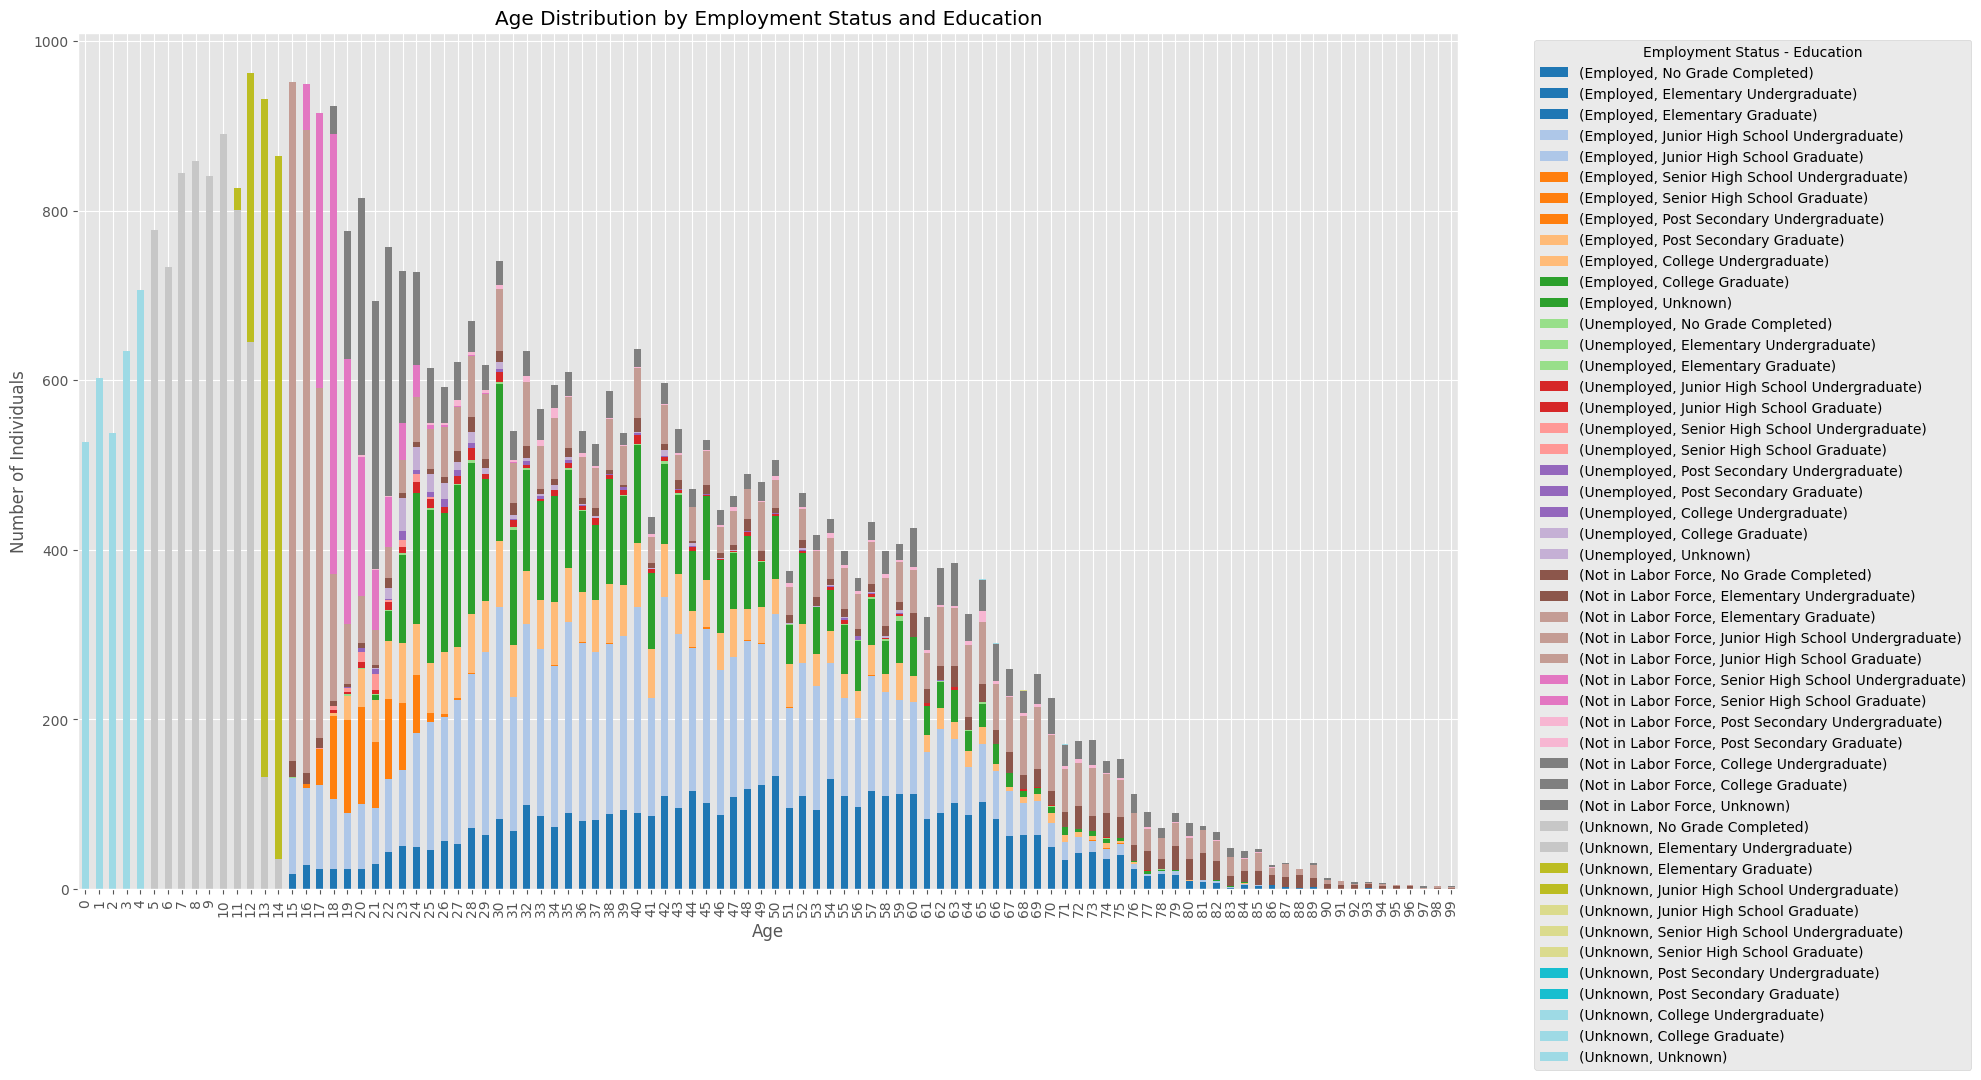

In [48]:
crosstab.T.plot(
    kind='bar',
    stacked=True,
    figsize=(20, 11),
    colormap='tab20'
)

plt.title("Age Distribution by Employment Status and Education")
plt.xlabel("Age")
plt.ylabel("Number of Individuals")
plt.legend(title="Employment Status - Education", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Similar to our approach in the previous sections of this notebook, we can also separate the Age Distribution by Education according to the 4 categories for employment status.

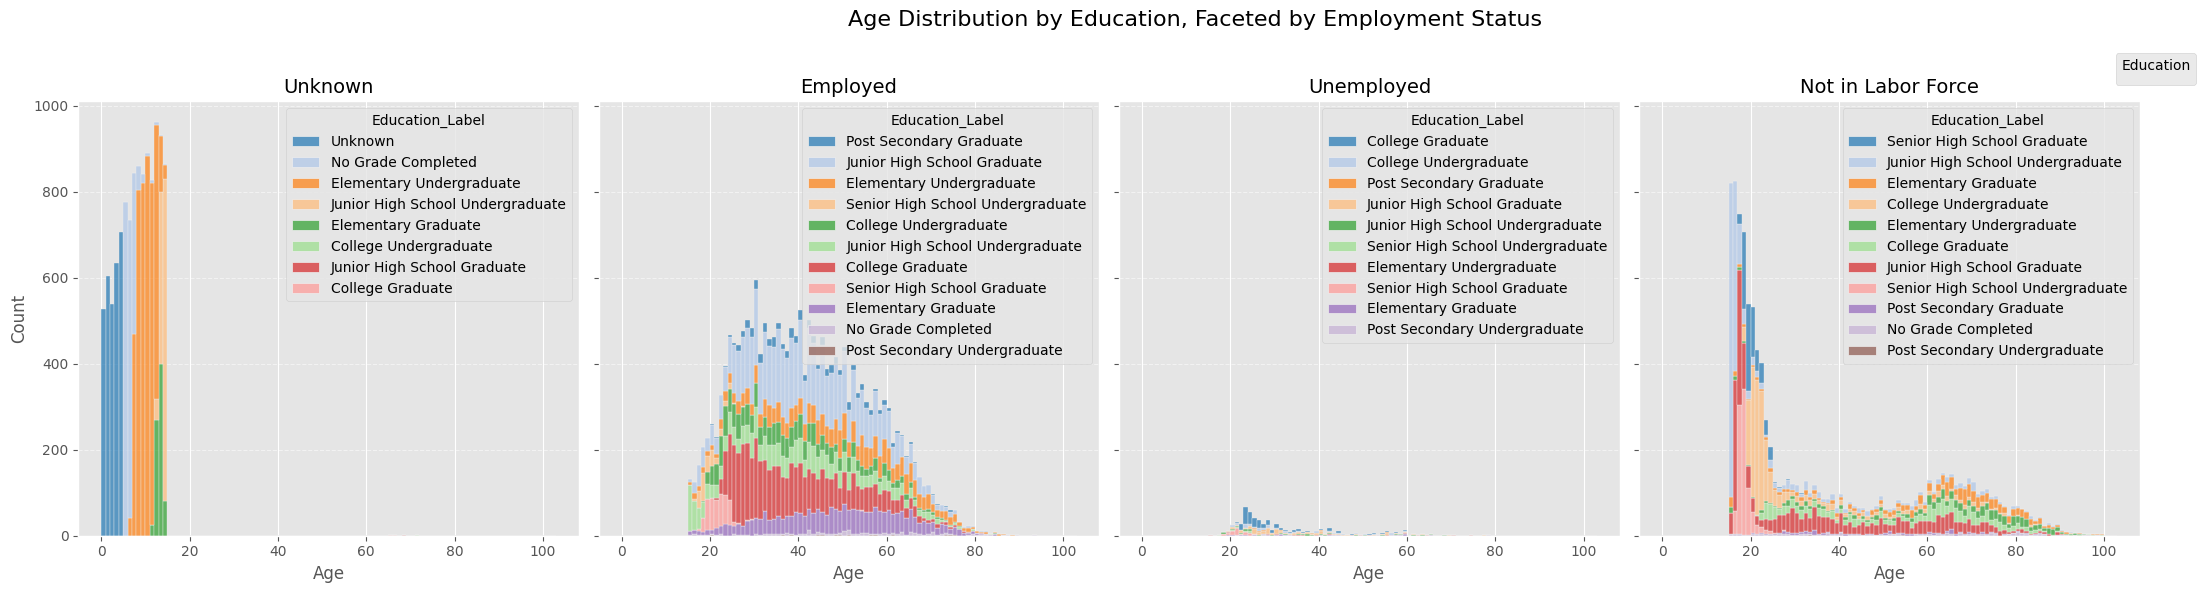

In [49]:
common_bins = np.arange(
    df_education_employment['Age'].min(),
    df_education_employment['Age'].max() + 5,
    1
)

df_plot = df_education_employment.dropna(
    subset=['Age', 'Education_Label', 'Employment_Status_Label']
)

status_order = [
    'Unknown',
    'Employed',
    'Unemployed',
    'Not in Labor Force'
]

fig, axes = plt.subplots(1, 4, figsize=(24, 6), sharex=True, sharey=True)
# fig, axes = plt.subplots(4, 1, figsize=(12, 24), sharex=True, sharey=True)
axes = axes.flatten()

for ax, status in zip(axes, status_order):
    subset = df_plot[df_plot['Employment_Status_Label'] == status]
    sns.histplot(
        data=subset,
        x='Age',
        bins=common_bins,
        hue='Education_Label',
        multiple='stack',
        stat=plot_stat,
        palette='tab20',
        ax=ax,
        alpha=0.7
    )
    ax.set_title(f'{status}', fontsize=14)
    ax.set_xlabel('Age')
    ax.set_ylabel(plot_stat.capitalize())
    ax.grid(axis='y', linestyle='--', alpha=0.5)

# place one shared legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    title='Education',
    loc='upper right',
    bbox_to_anchor=(0.92, 0.92)
)

plt.suptitle(
    f'Age Distribution by Education, Faceted by Employment Status',
    fontsize=16,
    y=0.98
)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

This stacked bar chart shows the number of individuals across the ages 0 to 99, grouped by their employment status and highest grade completed.
1. Young Ages (0-14):
    * Dominated by "Unknown" individuals, mostly likely due to being children and still studying.
    * Employment-related status are absent here, which is expected.
2. Young Adult (15-24):
    * Many individuals appear in "Elementary Graduate" and "Junior/Senior High School" categories.
    * Dominated by "Not in the Labor Force" individuals, most likely still studying or dependents
    * Some individuals started to work.
3. Working-Age Population (25-60):
    * Diverse and active in employment status.
    * Dominated by "Employed" individuals, especially those with Junior High School and College education.
    * Visibly small portion of unemployed individuals.
4. Older Ages (60+):
    * Gradual decline in all categories likely due to age.
    * "Not in Labor Force" slowly becomes the dominant category age increases.

#### 📉 Summary of Insights:
1. Higher education completed increases employability
    * College Graduates show high employment rate with a large sample size.
    * Post Secondary Undergraduates and Graduates have high emplyment rates, but smaller sample size.
2. High employed counts of Junior High School Graduates
    * As the largest sample size, Junior High School Graduates have a moderate employment rate.
    * This suggests that Filipinos often join labor force at this stage, likely due to financial constraints, lack of access to higher education, or job market accessibility.
3. Lower Education results to lower employability
    * Individuals with No Grade Completed and Elementary Undergraduates have low employmennt rates despite large sample sizes, which highlights the possible disadvantage in employability.
4. There is a significant amount of individuals Not in the Labor Force
    * Not in the Labor Force individuals are 15 years old or older stated by PSA
    * Most likely still studying.

---

#### Section 2.3.3 - Previous Work Experience

##### Research Sub-Question: 
* How does prior employment history (e.g., previous job, time since last worked) relate to current employability?

##### Why This Matters: 
* Prior work experience is often used by employers as a signal of readiness, skill, and professionalism. Analyzing how previous employment history affects current employability helps uncover whether gaps in work history or specific career trajectories serve as barriers or advantages in the job market.

In [50]:
# code

#### 📉 Summary of Insights:
- 

---

#### Section 2.3.4 - Job-Seeking Behavior

##### Research Sub-Question: 
* Do individuals actively looking for work or willing to work longer hours have a higher probability of being employed?

##### Why This Matters: 
* Job-seeking activity reflects motivation and availability for work—two essential components of employability. Individuals who are actively seeking work or are open to additional hours may face structural barriers that are not immediately visible. This analysis provides insight into underemployment and unmet labor demand.

In [51]:
# code here

#### 📉 Summary of Insights:
- 

---

#### Section 2.3.5 - Occupation & Industry

##### Research Sub-Question: 
* Which occupation groups and industries are most associated with higher employment rates?

##### Why This Matters: 
* Different occupation and industry sectors vary in terms of growth, automation risk, formality, and wage levels. Identifying which job categories are most associated with higher employment rates can guide career planning, policy support, and skills training programs aligned with market demand.

##### Stacked bar plot: `Occupation` & `Industry` vs. `Employment Status`

In the dataset, Major Occupation Group and Major Industry Group are stored in the `PUFC13_PROCC` and `PUFC15_PKB` variable as numeric code representing the different occupation and industry categories. Major occupation group consists of the following:
* Managers
* Professionals
* Technicians and Associate Professionals
* Clerical Support Workers
* Service and Sales Workers
* Skilled Agricultural, Forestry and Fishery Workers
* Craft and Related Trades Workers
* Plant and Machine Operators and Assemblers
* Elementary Occupations
* Armed Forces Occupations

On the other hand, major industry group consists of the following:
* AGRICULTURE
   * Agriculture and Forestry
   * Fishing and aquaculture
* INDUSTRY
   * Mining and Quarying
   * Manufacturing
   * Electricity, Gas, Steam and Airconditioning Supply
   * Water Supply; Sewerage, Waste Management and Remediation Activities
   * Construction
* SERVICES
   * Whosale and Retail Trade; Repair of Motor Vehicles and Motorcycles
   * Transportation and Storage
   * Accommodation and Food Service Activities
   * Information and Communication
   * Financial and Insurance Activities
   * Real Estate Activities
   * Professional, Scientific  and Technical Activities
   * Administrative and Support Service Activities
   * Public Administration and Defense; Compulsory Social Security
   * Education
   * Human Health and Social Work Activities
   * Arts, Entertainment and Recreation
   * Other Service Activities
   * Activities of Households as Employers
   * Activities of Extraterritorial Organizations and Bodies

To make it human-readable and easier to analyze, we first mapped each code to its equivalent category using the `classify_occupation`, `classify_sector`, and `classify_industry` functions:

In [52]:
def classify_occupation(code):
    if 11 <= code <= 14:
        return 'Managers'
    elif 21 <= code <= 26:
        return 'Professionals'
    elif 31 <= code <= 35:
        return 'Technicians and Associate Professionals'
    elif 41 <= code <= 44:
        return 'Clerical Support Workers'
    elif 51 <= code <= 54:
        return 'Service and Sales Workers'
    elif 61 <= code <= 63:
        return 'Skilled Agricultural, Forestry and Fishery Workers'
    elif 71 <= code <= 75:
        return 'Craft and Related Trades Workers'
    elif 81 <= code <= 83:
        return 'Plant and Machine Operators and Assemblers'
    elif 91 <= code <= 96:
        return 'Elementary Occupations'
    elif 1 <= code <= 3:
        return 'Armed Forces Occupations'
    else:
        return 'Unknown'

#industry sector: agriculture, industry, services
def classify_sector(code):
    if 1 <= code <= 3:
        return 'Agriculture'
    elif 5 <= code <= 43:
        return 'Industry'
    elif 45 <= code <= 99:
        return 'Services'
    else:
        return 'Unknown'
    
def classify_industry(code):
    if 1 <= code <= 2:
        return 'Agriculture and Forestry'
    elif code == 3:
        return 'Fishing and aquaculture'
    
    elif 5 <= code <= 9:
        return 'Mining and Quarying'
    elif 10 <= code <= 33:
        return 'Manufacturing'
    elif code == 35:
        return 'Electricity, Gas, Steam and Airconditioning Supply'
    elif 36 <= code <= 39:
        return 'Water Supply; Sewerage, Waste Management and Remediation Activities'
    elif 41 <= code <= 43:
        return 'Construction'

    elif 45 <= code <= 47:
        return 'Whosale and Retail Trade; Repair of Motor Vehicles and Motorcycles'
    elif 49 <= code <= 53:
        return 'Transportation and Storage'
    elif 55 <= code <= 56:
        return 'Accommodation and Food Service Activities'
    elif 58 <= code <= 63:
        return 'Information and Communication'
    elif 64 <= code <= 66:
        return 'Financial and Insurance Activities'
    elif code == 68:
        return 'Real Estate Activities'
    elif 69 <= code <= 75:
        return 'Professional, Scientific  and Technical Activities'
    elif 77 <= code <= 82:
        return 'Administrative and Support Service Activities'
    elif code == 84:
        return 'Public Administration and Defense; Compulsory Social Security'
    elif code == 85:
        return 'Education'
    elif 86 <= code <= 88:
        return 'Human Health and Social Work Activities'
    elif 90 <= code <= 93:
        return 'Arts, Entertainment and Recreation'
    elif 94 <= code <= 96:
        return 'Other Service Activities'
    elif 97 <= code <= 98:
        return 'Activities of Households as Employers'
    elif code == 99:
        return 'Activities of Extraterritorial Organizations and Bodies'
    else:
        return 'Unknown'

Let's proceed with the cross-tabulation that counts the number of people per occupation group, industry sector, and industry group, categorized by employment status. Then, plot them using stacked bar chart.

In [53]:
# 1. Occupation cross-tabulation
occupation_group = [
    'Managers',
    'Professionals',
    'Technicians and Associate Professionals',
    'Clerical Support Workers',
    'Service and Sales Workers',
    'Skilled Agricultural, Forestry and Fishery Workers',
    'Craft and Related Trades Workers',
    'Plant and Machine Operators and Assemblers',
    'Elementary Occupations',
    'Armed Forces Occupations',
    'Unknown'
]

employment_status_map = {
    1: 'Employed',
    2: 'Unemployed',
    3: 'Not in Labor Force',
    -1: 'Unknown'
}

df_occupation_employment = lfs_data.copy()

df_occupation_employment['Occupation_Label'] = df_occupation_employment['PUFC13_PROCC'].apply(classify_occupation)
df_occupation_employment['Employment_Status_Label'] = df_occupation_employment['PUFNEWEMPSTAT'].map(employment_status_map)

crosstab = pd.crosstab(df_occupation_employment['Occupation_Label'], 
    df_occupation_employment['Employment_Status_Label']).reindex(occupation_group)

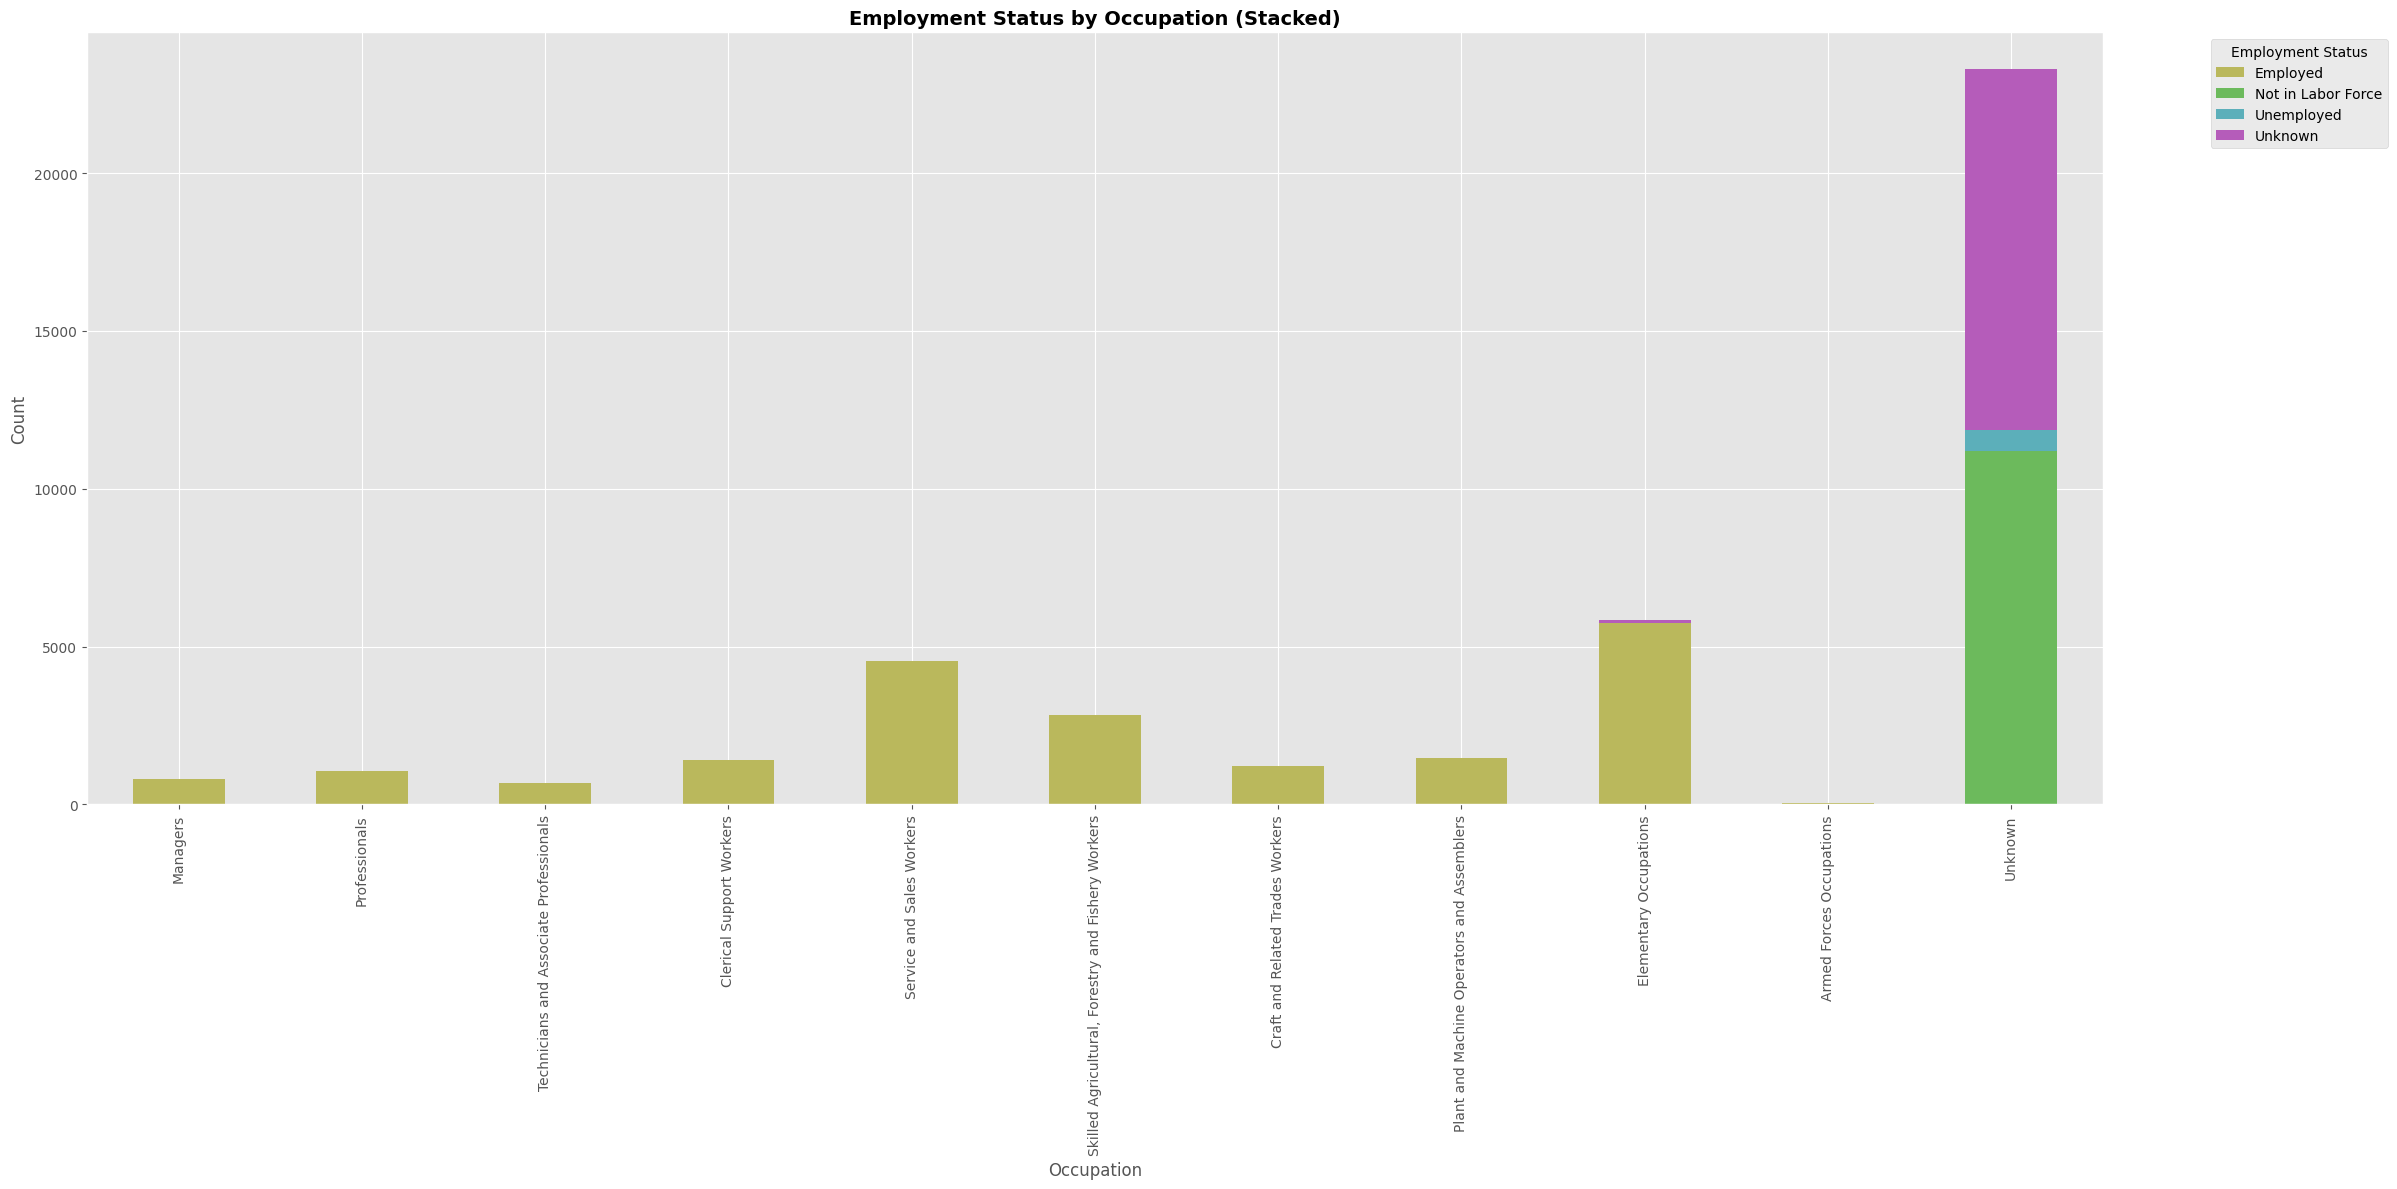

Cross-tabulation of Occupation vs Employment Status:
Employment_Status_Label                             Employed  Not in Labor Force  Unemployed  Unknown
Occupation_Label                                                                                     
Managers                                                 822                   0           0        0
Professionals                                           1061                   0           0        0
Technicians and Associate Professionals                  680                   0           0        1
Clerical Support Workers                                1407                   0           0        0
Service and Sales Workers                               4541                   0           0       19
Skilled Agricultural, Forestry and Fishery Workers      2833                   0           0        2
Craft and Related Trades Workers                        1220                   0           0        3
Plant and Machine Operators a

In [54]:
crosstab.plot(kind='bar', stacked=True, figsize=(24, 12), color=["#BAB85C", "#6CBA5C", "#5CAFBA", "#B55CBA"])
plt.title('Employment Status by Occupation (Stacked)', fontsize=14, fontweight='bold')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks()
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
print("Cross-tabulation of Occupation vs Employment Status:")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)
print(crosstab)

From the results of the cross-tabulation of occuation and employment status, we can see the following observations:
1. Elementary Occupations has the highest number of employed individuals (5750)
    * This indicates that low-skill and labor-intentive jobs, such as cleaners, delivery workers, construction laborers, or street vendors, plays a crucial role in the labor force market of the Philippines.
    * In this category, it typically requires minimal formal education, making it more accessible to even people without high education attainment. 
    * 94 Unknown individuals could imply presence of:
        * Informal/unregistered work/no contract (e.g. freelance)
        * Child labor
        * Children/Youths involvement in family business
2. Service and Sales Workers rank second, having 4541 employed individuals
    * This category includes cashier, food service workers, vendors, and domestic helpers.
    * In this category, it requires communication and emotional skills, which also doesn't much formal education or technical knowledge, making it highly accessible to the general population.
    * 19 Unknown individuals could imply possiblities of: 
        * Retired workers
        * Part timers, which is common in service sector. 
3. Skilled Agricultural, Forestry and Fishery Workers rank third, having 2833 employed individuals
    * This categories includes traditional jobs often found in rural areas.
    * High employment in this category highlights the importance of the agricultural sector of the Philippines.
    * 2 Unknown individuals show possibility of retired worker.
4. Moderately less Managers and Technicians and Associate Professionals
    * There are only 822 Managers employed and 680 Technicians and Associate Professionals employed, which are less compared to other categories.
    * In these categories, it often requires college level or higher educational attainment.
    * This suggests:
        * Higher entry requirements
        * Limited availability in job market
5. Armed Forces Occupations has the lowest number of employed individuals (51)
    * The low number reflects the specialized and limited nature of military service roles, which includes:
        * Strict entry requirements: physical fitness, age limits, psychological assesments, etc.
        * Require specific training programs
    * This may also indicate minimal influence on national employment trends.

In [55]:
# 2. Sector cross-tabulation
sector = [
    'Agriculture',
    'Industry',
    'Services',
    'Unknown'
]

employment_status_map = {
    1: 'Employed',
    2: 'Unemployed',
    3: 'Not in Labor Force',
    -1: 'Unknown'
}

df_sector_employment = lfs_data.copy()

df_sector_employment['Sector_Label'] = df_sector_employment['PUFC15_PKB'].apply(classify_sector)
df_sector_employment['Employment_Status_Label'] = df_sector_employment['PUFNEWEMPSTAT'].map(employment_status_map)

crosstab = pd.crosstab(df_sector_employment['Sector_Label'], 
    df_sector_employment['Employment_Status_Label']).reindex(sector)


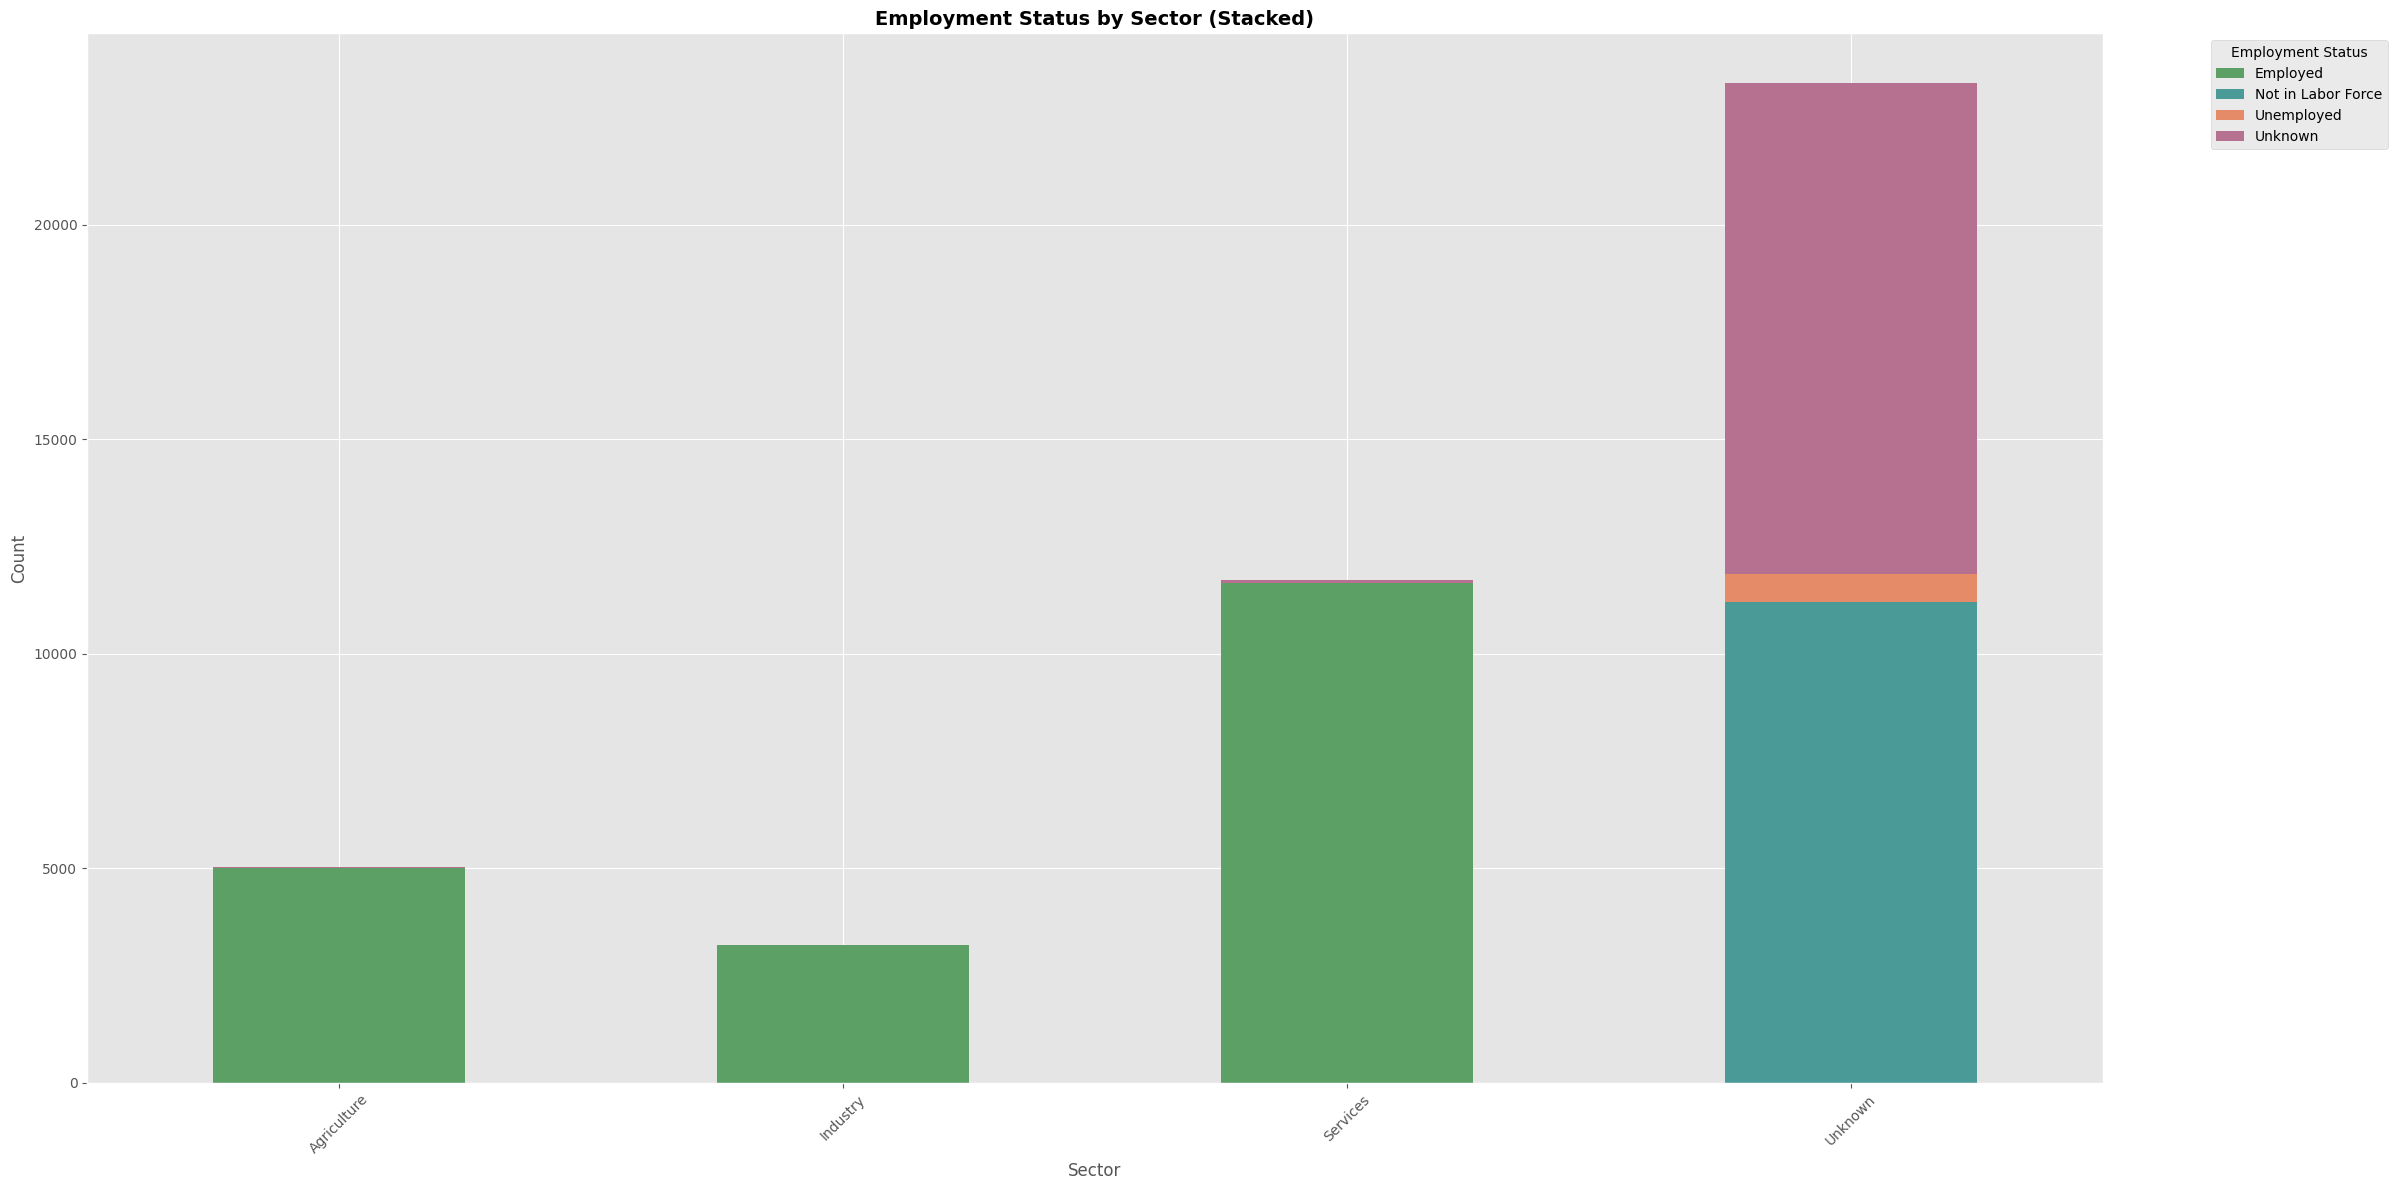

Cross-tabulation of Sector vs Employment Status:
Employment_Status_Label  Employed  Not in Labor Force  Unemployed  Unknown
Sector_Label                                                              
Agriculture                  5000                   0           0       39
Industry                     3206                   0           0       13
Services                    11642                   0           0       67
Unknown                         0               11197         670    11425


In [56]:
crosstab.plot(kind='bar', stacked=True, figsize=(24, 12), color=["#5DA065", "#4A9A98", "#E68B67", "#B67190"])
plt.title('Employment Status by Sector (Stacked)', fontsize=14, fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
print("Cross-tabulation of Sector vs Employment Status:")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)
print(crosstab)

From the results of the cross-tabulation of sector and employment status, we can see the following observations:
1. Most employed individuals are in the Services sector (11642)
    * This suggests that the Services sector is the dominant contributor to the Philippine labor force market.
    * There is a wide range of occupations in this sector, which includes:
        * Whosale and Retail Trade; Repair of Motor Vehicles and Motorcycles
        * Transportation and Storage
        * Accommodation and Food Service Activities
        * Information and Communication
        * Financial and Insurance Activities
        * Real Estate Activities
        * Professional, Scientific  and Technical Activities
        * Administrative and Support Service Activities
        * Public Administration and Defense; Compulsory Social Security
        * Education
        * Human Health and Social Work Activities
        * Arts, Entertainment and Recreation
        * Other Service Activities
        * Activities of Households as Employers
        * Activities of Extraterritorial Organizations and Bodies 
    * 67 Unknown individuals may be due to several informal work/previous retired wokers in this sector.
2. Agriculture sector has the second most employed individuals (5000)
    * As expected, there is a significant amount of individuals that are in this sector.
    * It includes:
        * Agriculture and Forestry
        * Fishing and aquaculture
    * Despite modernization, agriculture still remains a major source of employment, especially in rural areas, and among those with lower educational attainment.
    * 39 Unknown individuals may be due to:
        * Informal or seasonal work
        * Subsistence farming, where individuals produce mainly for personal or family consumption
3. Industry sector has the third highest employed individuals (3206)
    * It includes:
        * Mining and Quarying
        * Manufacturing
        * Electricity, Gas, Steam and Airconditioning Supply
        * Water Supply; Sewerage, Waste Management and Remediation Activities
        * Construction
    * This indicates that it is still a potentially growing sector in the labor market of the Philippines.
4. Majority in the Unknown sector are Not in Labor Force, Unemployed, or Unknown
    * With 11197 not in the labor, 670 unemployed, and 12229 unknown, this sector should include:
        * Children
        * Students
        * House caretakers (housewife, house husband)
        * Retired workers
        * Individuals who did not specify a sector or whose data couldn't be categorized
    

In [57]:
# 3. Industry cross-tabulation
industry_group = [
    'Agriculture and Forestry',
    'Fishing and aquaculture',
    'Mining and Quarying',
    'Manufacturing',
    'Electricity, Gas, Steam and Airconditioning Supply',
    'Water Supply; Sewerage, Waste Management and Remediation Activities',
    'Construction',
    'Whosale and Retail Trade; Repair of Motor Vehicles and Motorcycles',
    'Transportation and Storage',
    'Accommodation and Food Service Activities',
    'Information and Communication',
    'Financial and Insurance Activities',
    'Real Estate Activities',
    'Professional, Scientific  and Technical Activities',
    'Administrative and Support Service Activities',
    'Public Administration and Defense; Compulsory Social Security',
    'Education',
    'Human Health and Social Work Activities',
    'Arts, Entertainment and Recreation',
    'Other Service Activities',
    'Activities of Households as Employers',
    'Activities of Extraterritorial Organizations and Bodies',
    'Unknown'
]

employment_status_map = {
    1: 'Employed',
    2: 'Unemployed',
    3: 'Not in Labor Force',
    -1: 'Unknown'
}

df_industry_employment = lfs_data.copy()

df_industry_employment['Industry_Label'] = df_industry_employment['PUFC15_PKB'].apply(classify_industry)
df_industry_employment['Employment_Status_Label'] = df_industry_employment['PUFNEWEMPSTAT'].map(employment_status_map)

crosstab = pd.crosstab(df_industry_employment['Industry_Label'], 
    df_industry_employment['Employment_Status_Label']).reindex(industry_group)

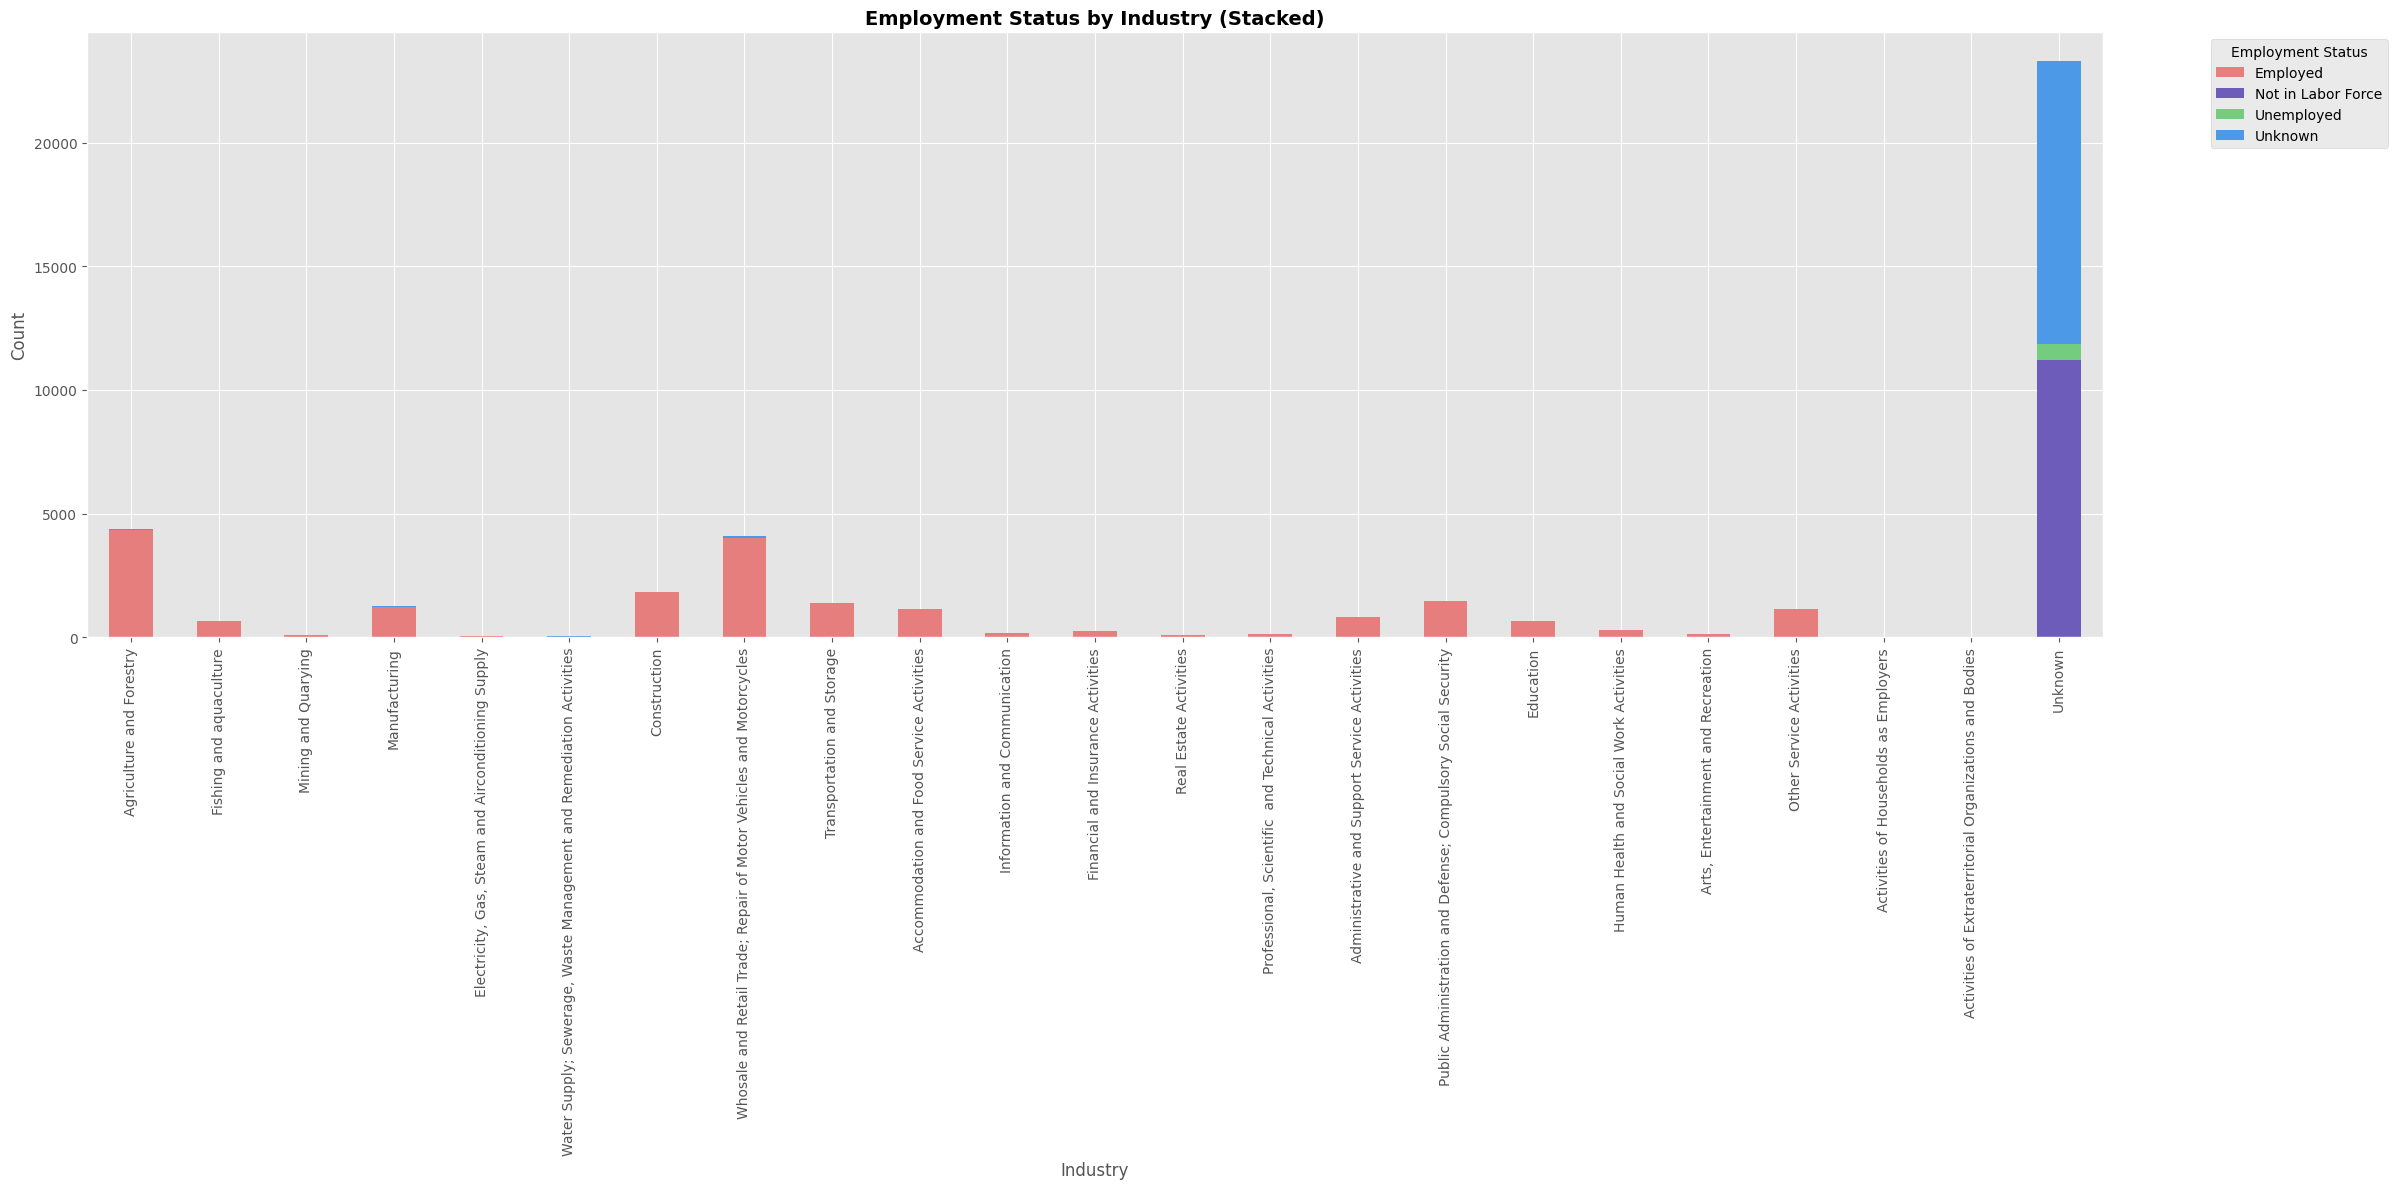

Cross-tabulation of Industry vs Employment Status:
Employment_Status_Label                             Employed  Not in Labor Force  Unemployed  Unknown
Industry_Label                                                                                       
Agriculture and Forestry                              4330.0                 0.0         0.0     38.0
Fishing and aquaculture                                670.0                 0.0         0.0      1.0
Mining and Quarying                                    101.0                 0.0         0.0      0.0
Manufacturing                                         1234.0                 0.0         0.0      9.0
Electricity, Gas, Steam and Airconditioning Supply      31.0                 0.0         0.0      0.0
Water Supply; Sewerage, Waste Management and Re...      29.0                 0.0         0.0      4.0
Construction                                          1811.0                 0.0         0.0      0.0
Whosale and Retail Trade; Repai

In [58]:
crosstab.plot(kind='bar', stacked=True, figsize=(24, 12), color=["#E77E7E", "#6D5CBA", "#74CC7F", "#4B99E7"])
plt.title('Employment Status by Industry (Stacked)', fontsize=14, fontweight='bold')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks()
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
print("Cross-tabulation of Industry vs Employment Status:")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)
crosstab = crosstab.fillna(0)
print(crosstab)

In order to see the data in a more magnified manner, lets temporarily take out the unknown industry where people who are not in the labor force are mostly categorized as.

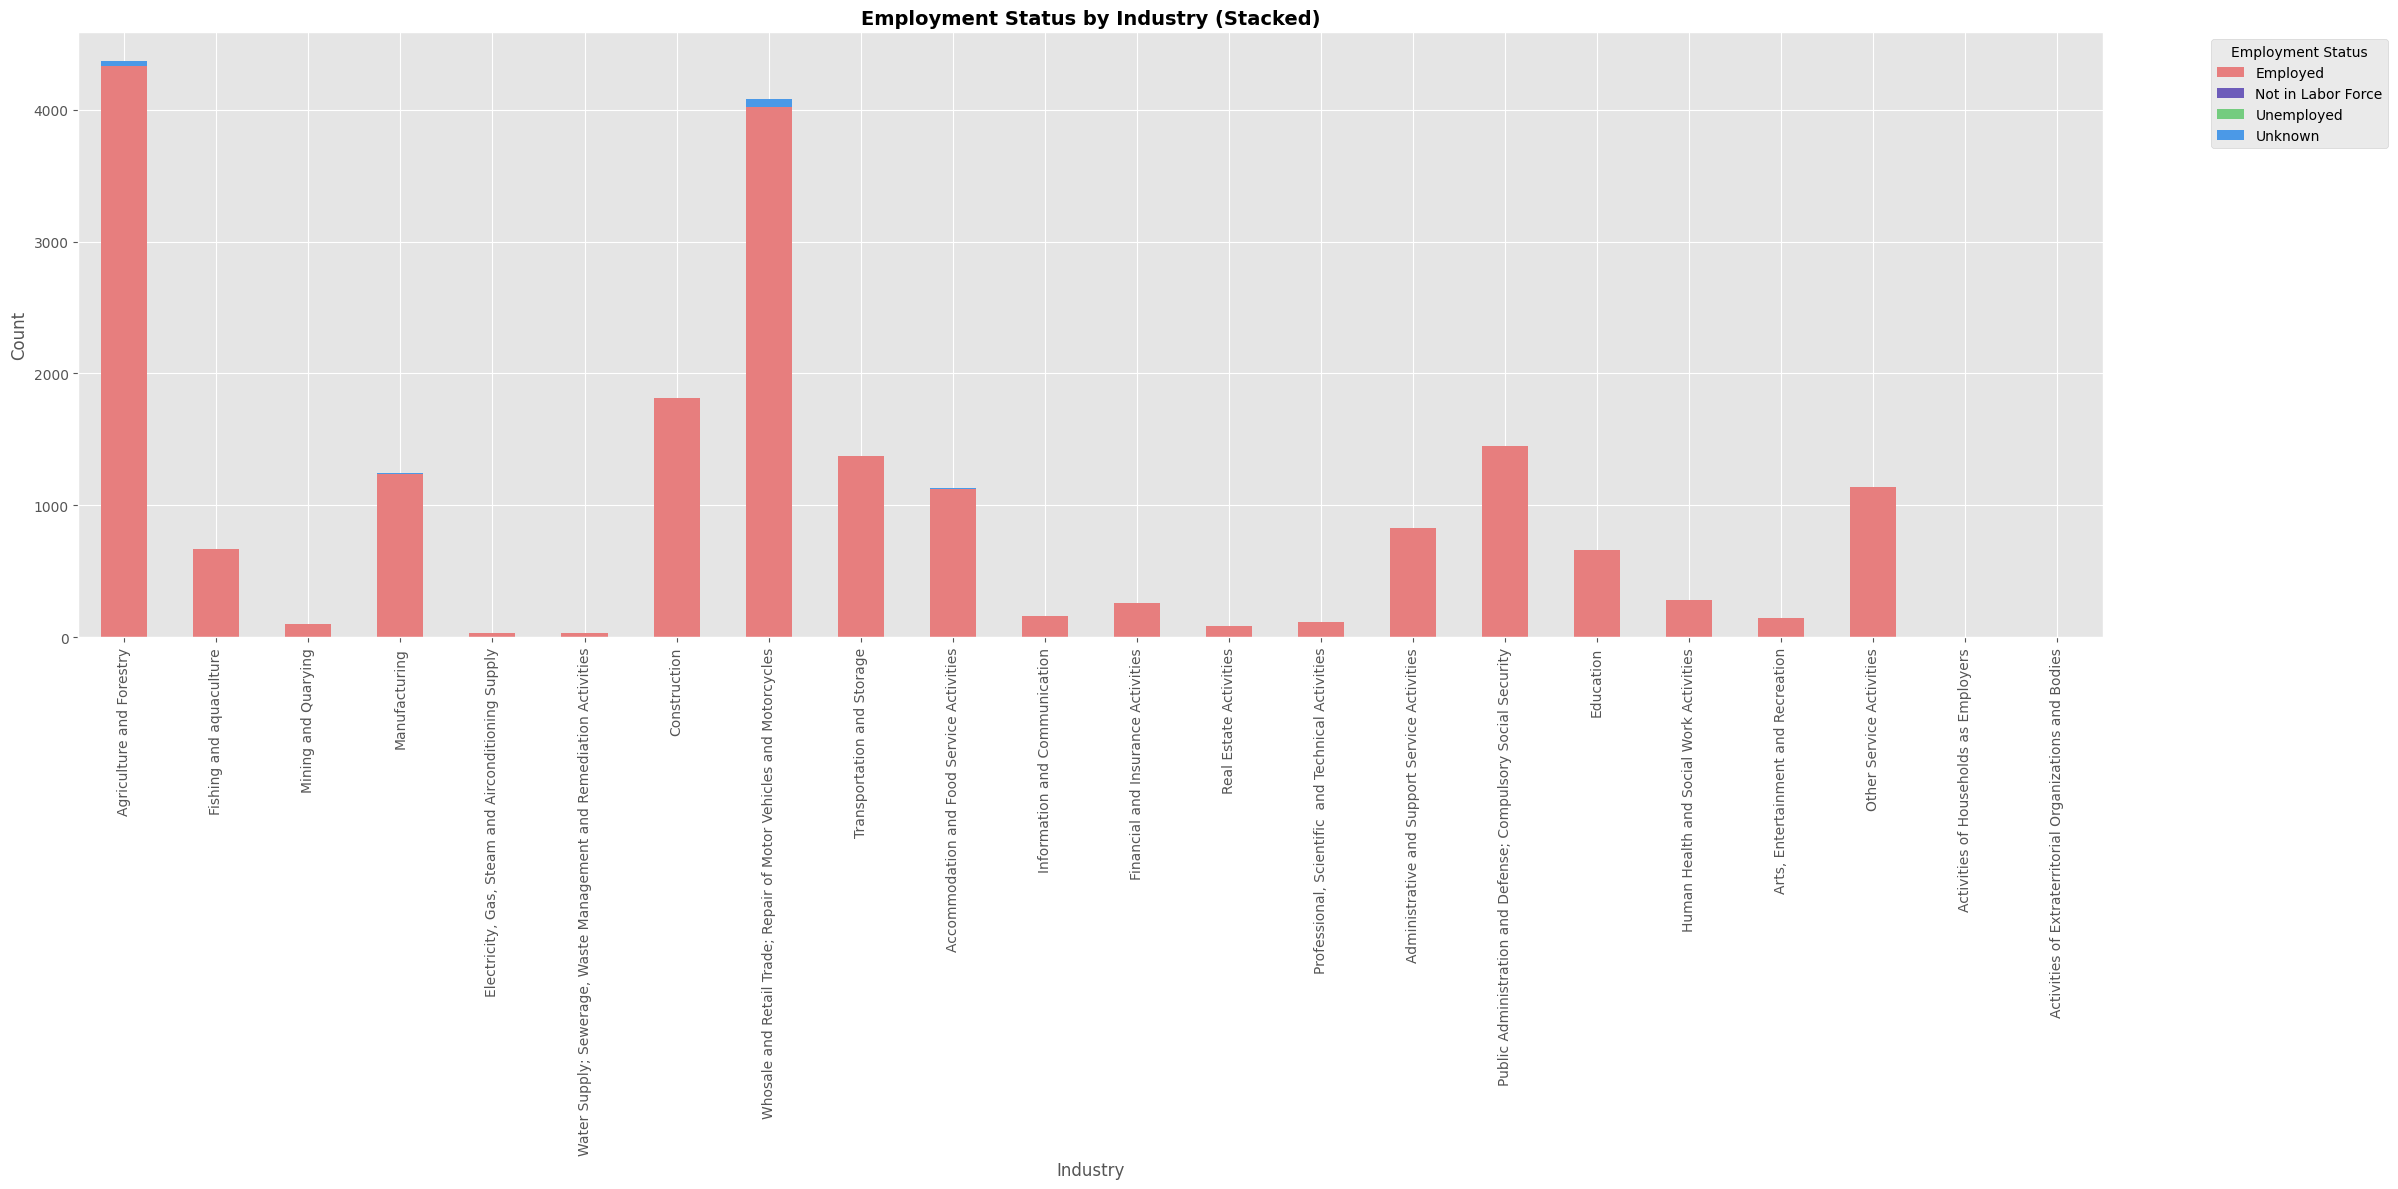

Cross-tabulation of Industry vs Employment Status:
Employment_Status_Label                             Employed  Not in Labor Force  Unemployed  Unknown
Industry_Label                                                                                       
Agriculture and Forestry                              4330.0                 0.0         0.0     38.0
Fishing and aquaculture                                670.0                 0.0         0.0      1.0
Mining and Quarying                                    101.0                 0.0         0.0      0.0
Manufacturing                                         1234.0                 0.0         0.0      9.0
Electricity, Gas, Steam and Airconditioning Supply      31.0                 0.0         0.0      0.0
Water Supply; Sewerage, Waste Management and Re...      29.0                 0.0         0.0      4.0
Construction                                          1811.0                 0.0         0.0      0.0
Whosale and Retail Trade; Repai

In [59]:
# 3. Industry cross-tabulation
industry_group = [
    'Agriculture and Forestry',
    'Fishing and aquaculture',
    'Mining and Quarying',
    'Manufacturing',
    'Electricity, Gas, Steam and Airconditioning Supply',
    'Water Supply; Sewerage, Waste Management and Remediation Activities',
    'Construction',
    'Whosale and Retail Trade; Repair of Motor Vehicles and Motorcycles',
    'Transportation and Storage',
    'Accommodation and Food Service Activities',
    'Information and Communication',
    'Financial and Insurance Activities',
    'Real Estate Activities',
    'Professional, Scientific  and Technical Activities',
    'Administrative and Support Service Activities',
    'Public Administration and Defense; Compulsory Social Security',
    'Education',
    'Human Health and Social Work Activities',
    'Arts, Entertainment and Recreation',
    'Other Service Activities',
    'Activities of Households as Employers',
    'Activities of Extraterritorial Organizations and Bodies'
]

employment_status_map = {
    1: 'Employed',
    2: 'Unemployed',
    3: 'Not in Labor Force',
    -1: 'Unknown'
}

df_industry_employment = lfs_data.copy()

df_industry_employment['Industry_Label'] = df_industry_employment['PUFC15_PKB'].apply(classify_industry)
df_industry_employment['Employment_Status_Label'] = df_industry_employment['PUFNEWEMPSTAT'].map(employment_status_map)

crosstab = pd.crosstab(df_industry_employment['Industry_Label'], 
    df_industry_employment['Employment_Status_Label']).reindex(industry_group)

crosstab.plot(kind='bar', stacked=True, figsize=(24, 12), color=["#E77E7E", "#6D5CBA", "#74CC7F", "#4B99E7"])
plt.title('Employment Status by Industry (Stacked)', fontsize=14, fontweight='bold')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks()
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
print("Cross-tabulation of Industry vs Employment Status:")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)
crosstab = crosstab.fillna(0)
print(crosstab)

We are now diving deeper into the industry group and see which specific industry has the most employed in each sector:
1. Top 3 employers in each sector:
    * Agricultural and Forestry (4330) - Agriculture Sector
        * This industry dominates employment among rural areas and industries in other sectors.
    * Whosale and Retail Trade; Repair of Motor Vehicles and Motorcycles (4024) - Services Sector
        * This industry highlights importance of commerce and business in urban areas.
    * Construction (1811) - Industry Sector
        * This industry reflects development of infrastructure in the Philippines.

#### 📉 Summary of Insights:
1. High employment in occupations that requires low education attainment
    * These occupations are typically low-skill, labor-intensive, and can be accessible without needing of completing high education.
    * There are also occupations that are more on interpersonal skills rather than technical skills.
    * Fewer employment in occupations that are highly skill-based, wherein individuals usually need to be at least college-level.
2. Sectors: Services > Agriculture > Industry
    * Services sector has a large range/selction of industry.
    * Agriculture sector remains a major employment source, especially in rural areas.
    * Industry sector reflects ongoing growth in infrastructure of the Philippines.
3. Top industries by sector:
    * Agriculture and Forestry - rural employment backbone
    * Whosale and Retail Trade - key urban employer
    * Construction - infrastructure development

---

#### Section 2.3.6 - Work Hours & Nature of Work

##### Research Sub-Question: 
* Are people working more hours or in specific employment classes (e.g., self-employed vs. private sector) more likely to stay employed?

##### Why This Matters: 
* The structure and intensity of a person’s work—measured in hours and employment class—reflect both the quality and stability of their employment. Exploring how these variables relate to employability helps assess the sustainability of current labor conditions and highlight potential exploitation or overwork.

In [60]:
# code

#### 📉 Summary of Insights:
- 

---

#### Section 2.3.7 - Geographical Differences

##### Research Sub-Question: 
* Are there regional disparities in employability across the Philippines?

##### Why This Matters: 
* Employment opportunities in the Philippines are unevenly distributed due to differences in economic development, infrastructure, and industry presence across regions. Understanding regional disparities enables more equitable policy development and better targeting of employment programs at the local level.

In [61]:
# code

#### 📉 Summary of Insights:
- 

---

### Phase 2: Statistical Inference, Data Mining, Key Insights and Conclusions

> Delivarables:
> 
> 1. A Jupyter Notebook containing all the data processing you did in the project. The Notebook should include Markdown
cells explaining each process, and highlighting the insights and conclusions. The Notebook should be structured in a
way that (1) is easy to understand, and (2) can be run sequentially to reproduce all outputs in your work.
> 
> 2. A poster that communicates all key findings and insights of your work. The poster should be intuitive to understand,
and intended for a general audience.

In [62]:
for column in lfs_data.columns:
    unique_values = lfs_data[column].unique()
    print(f"Column '{column}':")
    print(f"  Unique Values: {unique_values}")
    print("-" * 30) 

Column 'PUFREG':
  Unique Values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 19]
------------------------------
Column 'PUFHHNUM':
  Unique Values: [    1     2     3 ... 11112 11113 11114]
------------------------------
Column 'PUFPWGTPRV':
  Unique Values: [1511.3933 1536.8579 1162.8655 ... 1688.9772 1560.6849 1463.5117]
------------------------------
Column 'PUFSVYMO':
  Unique Values: [3]
------------------------------
Column 'PUFSVYYR':
  Unique Values: [2024]
------------------------------
Column 'PUFPSU':
  Unique Values: [ 636  261   11  386  511  136  322   22  472  172  772  622  770  933
  281  444  118  607 2024  146 1398 2650 3276    4   16   28  283   42
 1247 1006  524  765  854 1844  194 1514 1184    1  304  405  506  102
  203  176   56   96  216  460  305  615  925  150 1912 1171  430 3394
 4135 2653 2001  609 1537 2465  145 1073 2525 1625 1175  275  725 2075
  941 1501 1221  381  101  661  279  527  403  155   31  651  139   84
   29  249  362   12   82  502  2

## 💎 Section 3 - Data Mining

In order to get close to answering our research question of identifying the nature of `employed` individuals, our group has decided to use the K-Means Clustering algoritm in understanding the different characteristics of these individuals.

### K-Means Clustering

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

### 1. Load & Filter Data

We want to create a working copy of our processed `lfs_data` dataframe and only keep those who have a PUFNEWEMPSTAT value of 1 or only the `Employed` individuals. 

Doing such clustering across only a homogeneous subgroup allows for us to avoid creating clusters that simply separate “employed” vs. “unemployed.”

In [64]:
new_emp = lfs_data[lfs_data['PUFNEWEMPSTAT'] == 1].copy()

### 2. Specify Columns as Numeric vs. Categorical

This configuration step is crucial to be taken before our pipeline. We will use this late on to tell the pipeline which features need standardization (numeric) and which need dummy‑coding (categorical).

As discussed in class, this is necessary because the k‑means algorithm relies on Euclidean distance, so mixing unscaled numeric and raw categorical integers would introduce skews to our clusters otherwise.

This step simplifies the job of choosing imputers/encoders.

In [65]:
int_obj = new_emp.select_dtypes(include=['int64','object']).columns
mask   = new_emp[int_obj].nunique() < 20
cat_cols = list(int_obj[mask])
num_cols = list(new_emp.select_dtypes(include=['number']).columns.difference(cat_cols))

### 3. Build Preprocessing + Clustering Pipeline

We want to initialize a preprocessor object with Scikit-Learn's Column Transformer object. With this, we can use the tools in the library that standardizes our numerical columns and applies One Hot Encoding to the categorical columns.

In [66]:
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=-1)),
    ('onehot',  OneHotEncoder(drop='first', sparse_output=False))
])
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=-1)),
    ('scale',   StandardScaler())
])

preprocessor = ColumnTransformer([
    ('cat', cat_pipe, cat_cols),
    ('num', num_pipe, num_cols)
], remainder='drop')


The `StandardScaler()` object standardizes features by removing the mean and scaling to unit variance. It subtracts each numeric feature’s mean and divides by its standard deviation, therefore giving it a zero mean & unit variance.

The `OneHotEncoder()` object creates new binary columns for each unique category in a feature; creating the One Hot Encoding pre-processing for us automatically. The input parameters this object takes in are as stated in the comments within the code. This object turns each categorical column into N–1 dummy columns, dropping the first level to avoid linear dependence (“dummy‑variable trap”).

The `Pipeline` object chains preprocessing and clustering so that we can treat the whole thing as one estimator.

For categoricals, we want to fill -1 with the most common category, then one‑hot encode it (dropping the first to avoid collinearity). 

For numerics, fill -1 with the median then standardize.

This step ensures no missing values and comparable scales.

In [67]:
X = preprocessor.fit_transform(new_emp)
print("Feature matrix shape:", X.shape)

Feature matrix shape: (19848, 127)


We now have an array X with 19,848 rows and ~230 features (one‑hots + scaled numerics). 

We can now say that we are ready for clustering.

### 4. Choose K with Elbow Method & Silhouette scans

Credits to Andy McDonald's YouTube Video on K-Means Clustering Algorithm with Python Tutorial (2021, November 17): https://youtu.be/iNlZ3IU5Ffw
for this crucial step in identifying the inertia for choosing k.

The `Inertia` is sum of squared distances from each point to its cluster center; it always decreases as K increases.

The `Elbow Method` looks for the “knee” in that curve where the marginal gain in inertia slows down. 

In [68]:
K = range(2, 11)
inertias   = []
sil_scores = []

for k in K:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)
    labels = km.predict(X)
    sil_scores.append(silhouette_score(X, labels))

In [ ]:
plt.figure(figsize=(24,8))
plt.subplot(1,2,1)
plt.plot(K, inertias, 'o-'); plt.title('Elbow');   plt.xlabel('k'); plt.ylabel('Inertia')
plt.subplot(1,2,2)
plt.plot(K, sil_scores, 'o-'); plt.title('Silhouette'); plt.xlabel('k'); plt.ylabel('Score')
plt.tight_layout()
plt.show()

We can see here on the Elbow Method that there is a steep declicing curve at k = 2, 3

But upon observing the change in slope between k = 4 and k = 5, we can see that the steepness of the slope plateaus and levels off. 

As for the Silhouette plot, it peaks at k=3 and dips at k=4.

In [ ]:
best_k = 4

As such, we will subjectively pick this `BEST_K` because of the marginal gain in inertia slowed down in comparison to the other k values.

### 5. Fit the Final Model & Assign Cluster Labels

We simply want to refit k‑means with our chosen K and assign each person a cluster label (0 to 4).

In [ ]:
km_final = KMeans(n_clusters=best_k, init='k-means++', n_init=20, random_state=42)
new_emp['cluster'] = km_final.fit_predict(X)
print("Cluster sizes:\n", new_emp['cluster'].value_counts().sort_index())

With this, we can see that Cluster 3 is the largest, with roughly 7.7 K instances, and Cluster 2 is the smallest, with roughly 2.2 K rows.

We see that no cluster is vanishingly small, so we can say that all k=4 clusters have some mass.

### 6. Build DataFrame of Cluster Centers

We want to build a DataFrame of our scaled/encoded data, then compute each cluster’s mean on every feature. That way, we can identify which our centroids in the preprocessed space will be. 

We basically want to get the one-hot encoder to extract feature names.

This is also a necessary step because by looking at the largest positive or negative values, we can see which features most strongly characterize each cluster.

In order to inspect the data, we want to put each cluster’s center (in standardized/encoded space) into a DataFrame.

We should also undo the StandardScaler so numeric centers are back on the original scale, making them interpretable to us.

In [ ]:
feat_names = preprocessor.get_feature_names_out()
centers_df = pd.DataFrame(km_final.cluster_centers_, columns=feat_names)

scaler = preprocessor.named_transformers_['num'].named_steps['scale']
num_tf_cols = [c for c in feat_names if c.startswith('num__')]
centers_df[num_tf_cols] = scaler.inverse_transform(centers_df[num_tf_cols])

orig_num_centers = pd.DataFrame(
    centers_df[num_tf_cols].values,
    columns=[c.split('__')[1] for c in num_tf_cols]
).round(2)

print("Numeric centers (original scale):")
print(orig_num_centers)

Interpretation:
- Cluster 1 has the highest mean age (~43.9) but low hours (~21 h).
- Cluster 3 works the most hours (~51 h).

In [ ]:
cat_centers = centers_df.drop(columns=num_tf_cols).round(3)
print("\nCategorical centers (proportions):")
print(cat_centers)

Each cell is the fraction of that one‑hot being “1” in the cluster. 

So if cat__PUFREG_5 is 0.222 for cluster 0, then ~22.2% of cluster 0 members are in region 5.

### 7. Visualize Clusters in 2D with PCA

In order to address the issues of the `Curse of Dimensionality` and multicollinearity, we want to introduce a reduction technique that simplifies complex datasets. Principal Component Analysis or PCA addresses such by transforming a large set of potentially correlated variables into a smaller set of uncorrelated variables, creating a new, lower-dimensional representation of our data.

Same story as the centers table: cluster 1 is older & works fewer hours, cluster 3 younger & works the most, etc.

In [ ]:
profile = new_emp.groupby('cluster')[['PUFC05_AGE','PUFC18_PHOURS','PUFC23_THOURS']].agg(['mean','count']).round(1)
print("\nCluster profile on age & hours:")
print(profile)

In [ ]:
proj = PCA(2, random_state=42).fit_transform(X)
plt.figure(figsize=(6,5))
plt.scatter(proj[:,0], proj[:,1], c=new_emp['cluster'], cmap='tab10', s=10, alpha=0.6)
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('Clusters via PCA')
plt.show()

A 2D scatter showing how the four clusters separate on the first two principal components.

There is much overlap so this might now be the best k for clustering.

### 8. Assessing cluster quality via silhouette

In [ ]:
labels = km_final.labels_     # or new_emp['cluster'].values
score  = silhouette_score(X, labels)

print(f"Average silhouette score for k={km_final.n_clusters}: {score:.3f}")


Average silhouette score for k=4: 0.103


A silhouette of around 0.10 is quite low.

This means that our observation of the graph earlier was correct: the clusters overlap.

This signals us to try having maybe fewer clusters (e.g. k=3) for better separation.

In [ ]:
sample_silhouette_values = silhouette_samples(X, labels)

# for instance, to look at cluster 0’s values:
cluster_0_vals = sample_silhouette_values[labels == 0]
print("Cluster 0 silhouette scores — min, mean, max:", 
      np.min(cluster_0_vals), np.mean(cluster_0_vals), np.max(cluster_0_vals))


Cluster 0 silhouette scores — min, mean, max: 0.009162000934355732 0.14919839982005997 0.29019707324219396


Some points in cluster 0 are barely above 0 (poorly matched), though a few are quite tight (near 0.29).

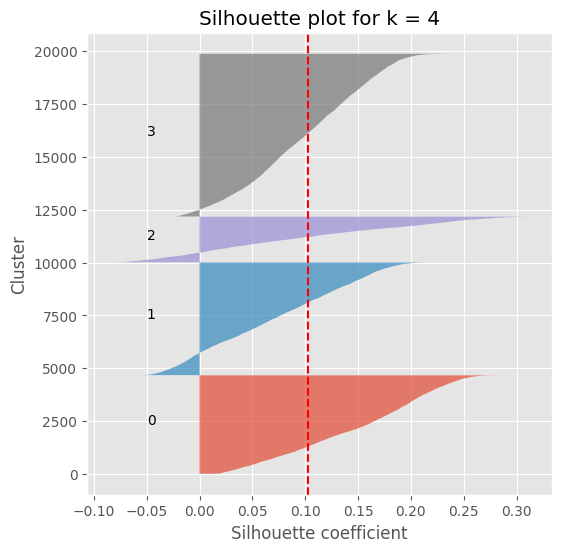

In [ ]:
n_clusters = km_final.n_clusters
y_lower = 10

fig, ax = plt.subplots(figsize=(24,24))
for i in range(n_clusters):
    ith_vals = sample_silhouette_values[labels == i]
    ith_vals.sort()
    size_cluster_i = ith_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0, ith_vals,
        alpha=0.7
    )
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for spacing

ax.set_xlabel("Silhouette coefficient")
ax.set_ylabel("Cluster")
ax.axvline(x=score, color="red", linestyle="--")
ax.set_title(f"Silhouette plot for k = {n_clusters}")
plt.show()


Seeing as how Cluster 1 has a few negative widths, this indicates that some points that were categorized in this cluster may belong elsewhere.

Cluster 2 seems the tightest.

### 9. Automatic silhouette scan & revisiting k

Seeing as how our silhouette score for the earlier k was low, lets try checking the scores of the different ks.

In [ ]:
best_score = -1
best_k = None
for k in range(2, 11):
    labels = KMeans(n_clusters=k, random_state=42).fit_predict(X)
    score  = silhouette_score(X, labels)
    print(f"k={k:2d}: silhouette={score:.3f}")
    if score > best_score:
        best_score, best_k = score, k

print(f"\nBest k by silhouette: {best_k} (score={best_score:.3f})")


k= 2: silhouette=0.106
k= 3: silhouette=0.114
k= 4: silhouette=0.103
k= 5: silhouette=0.088
k= 6: silhouette=0.084
k= 7: silhouette=0.089
k= 8: silhouette=0.082
k= 9: silhouette=0.080
k=10: silhouette=0.072

Best k by silhouette: 3 (score=0.114)


Purely by average silhouette, k=3 outperforms k=4. 

This indicates that we want to switch to k=3.

### 10. PCA pre‑reduction & re‑assessment

In the same train of thought as the previous step and given how we scored low for k=3, we may want to reduce the number of PCs to improve separation.

In [ ]:
pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X)
labels = KMeans(n_clusters=best_k, random_state=42).fit_predict(X_pca)
print("Silhouette on 10 PCs:", silhouette_score(X_pca, labels).round(3))


Silhouette on 10 PCs: 0.16


Reducing to 10 PCs indeed improved separation (0.16 vs. 0.114).

This supports the idea that dimensionality reduction can sometimes sharpen clusters.

### 11. Compare clusters on original vs. PCA‐reduced data

Let's compare the before and after.

In [ ]:
# — on the original preprocessed data X —
km_orig = KMeans(n_clusters=3, init='k-means++', n_init=20, random_state=42)
labels_orig = km_orig.fit_predict(X)
sil_orig   = silhouette_score(X, labels_orig)
new_emp['cluster_orig3'] = labels_orig
print(f"Silhouette on original data (k=3): {sil_orig:.3f}")

# — on the PCA‐reduced data (10 PCs) —
pca10 = PCA(n_components=10, random_state=42)
X10   = pca10.fit_transform(X)

km_pca = KMeans(n_clusters=3, init='k-means++', n_init=20, random_state=42)
labels_pca = km_pca.fit_predict(X10)
sil_pca   = silhouette_score(X10, labels_pca)
new_emp['cluster_pca3'] = labels_pca
print(f"Silhouette on 10‐PC data (k=3): {sil_pca:.3f}")


Silhouette on original data (k=3): 0.114
Silhouette on 10‐PC data (k=3): 0.160


These scores confirm the boost from our PCA adjustment. 

This is a favorable solution for us.

In [ ]:
print("Original data clusters:")
print(new_emp['cluster_orig3'].value_counts().sort_index())

print("\nPCA data clusters:")
print(new_emp['cluster_pca3'].value_counts().sort_index())

Original data clusters:
cluster_orig3
0     7111
1    10255
2     2482
Name: count, dtype: int64

PCA data clusters:
cluster_pca3
0     2497
1    10192
2     7159
Name: count, dtype: int64


PCA‐based clustering redistributes membership.

The cluster labels don’t map 1:1, but sizes shift.

In [ ]:
for col in ['cluster_orig3','cluster_pca3']:
    print(f"\nProfile for {col}:")
    profile = (
        new_emp
          .groupby(col)[['PUFC05_AGE','PUFC18_PHOURS','PUFC23_THOURS']]
          .agg(['mean','count'])
          .round(1)
    )
    print(profile)


Profile for cluster_orig3:
              PUFC05_AGE        PUFC18_PHOURS        PUFC23_THOURS       
                    mean  count          mean  count          mean  count
cluster_orig3                                                            
0                   44.2   7111          24.7   7111          26.3   7111
1                   39.7  10255          48.7  10255          49.2  10255
2                   39.9   2482          43.1   2482          43.7   2482

Profile for cluster_pca3:
             PUFC05_AGE        PUFC18_PHOURS        PUFC23_THOURS       
                   mean  count          mean  count          mean  count
cluster_pca3                                                            
0                  39.9   2497          43.0   2497          43.7   2497
1                  39.7  10192          48.7  10192          49.2  10192
2                  44.1   7159          24.9   7159          26.5   7159


Both clusterings yield similar group‑level summaries

One cluster of older/low‑hours, one of mid‑hours, one of high‑hours, etc.

But we can still observe that PCA sometimes sharpens the contrasts.

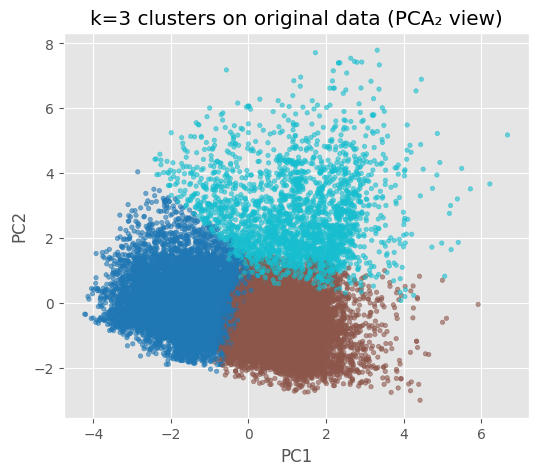

In [ ]:
proj2 = PCA(n_components=2, random_state=42).fit_transform(X)
plt.figure(figsize=(24,12))
plt.scatter(proj2[:,0], proj2[:,1],
            c=new_emp['cluster_orig3'],
            cmap='tab10', s=10, alpha=0.6)
plt.title('k=3 clusters on original data (PCA₂ view)')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.show()


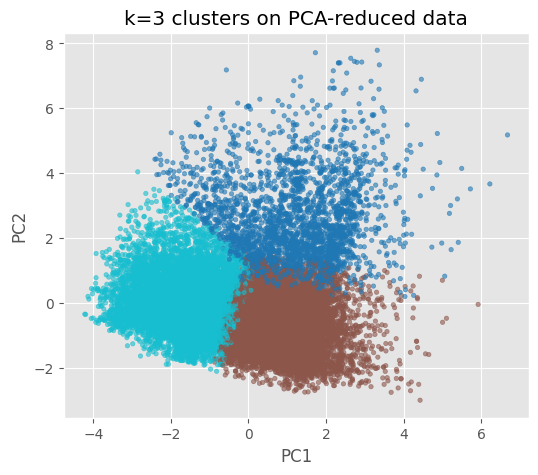

In [ ]:
proj2_10 = pca10.transform(X)[:,:2]  # first 2 PCs from the 10‑PC fit
plt.figure(figsize=(24,12))
plt.scatter(proj2_10[:,0], proj2_10[:,1],
            c=new_emp['cluster_pca3'],
            cmap='tab10', s=10, alpha=0.6)
plt.title('k=3 clusters on PCA-reduced data')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.show()


## 🧮 Section 4 - Statistical Inference

### Chi-Square Tests of Independence (for categorical predictors)

We used the Chi-Square Test of Independence to determine whether there is a statistically significant relationship between employment status and other categorical variables such as Sex, Marital Status, and Education. The Chi-Square test is specifically designed to assess whether two categorical variables are related, which makes it ideal for testing associations with people's employment status.

#### 1. Employment Status vs Sex

Let's first compare the relationship between people's employment status and sex.

To prepare the data for analysis, these are the following renamed variables for readability:

Variables to be tested:
- 'PUFNEWEMPSTAT': 'EmploymentStatus'
- 'PUFC04_SEX': 'Sex'
- 'PUFC06_MSTAT': 'MaritalStatus'
- 'PUFC07_GRADE': 'Education'

Employment status:
- Unknown
- Employed
- Unemployed
- Not in the Labor Force

Sex:
- Male (1)
- Female (2)

In [ ]:
df_chi = lfs_data.copy()
df_chi = df_chi.rename(columns={
    'PUFNEWEMPSTAT': 'EmploymentStatus',
    'PUFC04_SEX': 'Sex',
    'PUFC06_MSTAT': 'MaritalStatus',
    'PUFC07_GRADE': 'Education'
})

employment_status_labels = {
    -1: 'Unknown',
    1: 'Employed',
    2: 'Unemployed',
    3: 'Not in Labor Force'
}

df_chi['EmploymentStatus'] = df_chi['EmploymentStatus'].map(lambda x: employment_status_labels.get(int(x), str(x)))

Now that they are renamed, we can proceed to analyze the data by first organizing the data depending on people's sex and employment status.

We can count how many people are in each subgroup by grouping them together first.

In [ ]:
counts = df_chi.groupby('Sex')['EmploymentStatus'].value_counts()
counts

We can initially see that there are generally more employed males than females, but we do not know if this is statistically significant.

To find out, we can use the Chi-square test to see if sex affects the employment status of people.

Let's convert it to a table so that we are able to apply the Chi-square test to the data.

In [ ]:
table = pd.DataFrame([counts[1], counts[2]], index=['male', 'female'])
table

Afterwards, we can perform the Chi-Square test to see if Employment Status is independent of a person's sex, given the null hypothesis: employment status is indepedent of sex.

In [ ]:
chi2_contingency(table)

Results:
- Null hypothesis: Employment status is indepedent of sex.
- Chi-Square statistic: 1427.7672
- p-value: 2.7789 e-309

The big value of the Chi-Square statistic shows that there is a significant relationship between a person’s sex and their employment status. Since the p-value is much less than the confidence level of 0.05, we reject the null hypothesis. This means there is a statistically significant association between employment status and sex. 

Therefore, employment status and sex are NOT independent

Sex  being a factor affecting employment status shows us that the sex-employment gap exists and is statistically confirmed. In our previous exploratory data analysis, we have found a 1.38:1 male-to-female employment ratio, which we can confirm now, is not due to chance. 
This suggests that there are systemic factors that affect women's participation in the workforce. Some common factors may include: cultural norms, caregiving responsibilities, and discrimination.

#### 2. Employment Status vs Marital Status

The same steps done previously can be repeated for the next comparison: determining if marital status and education are independent of employment status or not.

In [ ]:
counts2 = df_chi.groupby('MaritalStatus')['EmploymentStatus'].value_counts()
table2 = pd.DataFrame([counts2[1], counts2[2]], index=['Single', 'Married'])
chi2_contingency(table2)

Results:
- Null hypothesis: Martial status and employment status are independent.
- Chi-Square Statistic: 10485.1075
- p-value: 0.0

Since the p-value is 0.0, which is far below the significance level  of 0.05, we reject the null hypothesis with high confidence. 

Therefore, marital status and employment are NOT independent.

With this in mind, we can confirm that marriage indeed does affect employment patterns differently for different groups. The statistically significant 74.23% employment rate of married individuals may suggest that the financial responsibilities of marriage leads to employment participation. Moreover, this may be a demonstration of the "breadwinner effect", wherein married people seek stable employment in order to be a "breadwinner" for the family.

#### 3. Employment Status vs Educational Attainment

For the education variable, specific 5-digit codes were used in specifying the attained grade level and course. The PSCED documentation was used to interpret this (https://www.scribd.com/document/412136805/PSCED-Publication-as-of-24-April-2018). The reference was used in order to classify them into categories or ranges, and perform a cleaner data analysis.

In [ ]:
def map_psced(code):
    code = int(code)
    if code <= 0:
        return 'No Education'
    elif 10000 <= code < 20000:
        return 'Primary'
    elif 20000 <= code < 40000:
        return 'Secondary'
    elif 40000 <= code < 60000:
        return 'Vocational'
    elif 60000 <= code < 80000:
        return 'Tertiary'
    elif 80000 <= code <= 99999:
        return 'Graduate'
    else:
        return 'Unknown'
df_chi['EduLevel'] = df_chi['Education'].apply(map_psced)

counts3 = df_chi.groupby('EduLevel')['EmploymentStatus'].value_counts()
table3 = pd.crosstab(df_chi['EduLevel'], df_chi['EmploymentStatus'])
chi2_contingency(table3)

Results:

- Null hypothesis: Education level and employment status are independent.
- Chi-square Statistic: 19073.2865
- p-value: 0.0

Of all three tests, this had the highest Chi-Square statistic, having the strongest statistical relationship between the two variables. Similar to the previous test, since the p-value is very close to 0.0 and far less than 0.05, we reject the null hypothesis with very high confidence.

Thus, employment status and education level are NOT independent.

In comparison to the other two Chi-Square tests, education was found to be the most powerful demographic predictor of employment status. Throughout the data population, the relationship between the two variables were very statistially significant and consistent. This proves a common preconceived notion that educational attainment fundamentally shapes employment outcomes. Our previous finding that college graduates have 71.08% employment vs. 10.69% for no education is statistically significant.

### Summary

Overall Chi-Square results:
- All Chi-Square statistics are significantly high, showing that the actual data differs greatly from what we would expect if the variables were independent.
- All p-values are extremely small, far below the significance level, α = 0.05.

By Chi-Square magnitude, we can rank the variables based on the amount of influence they have over employment status.
1. Education (χ² = 19,073)
2. Marital Status (χ² = 10,485) 
3. Gender (χ² = 1,428)

The Chi-Square tests provide overwhelming statistical evidence (all p < 0.001) that employment status in the Philippines is significantly associated with education level (χ² = 19,073), marital status (χ² = 10,485), and gender (χ² = 1,428). These results confirm that the demographic factors are not merely correlated with employment, but are valuable predictors that likely play major roles in shaping labor market outcomes in the Philippine workforce.

___

### One-Way ANOVA Test

We decided to use the One-Way ANOVA to test whether the average age significantly differs across different employment status categories. Since age is a single continuous variable, we found One-Way ANOVA to be the most appropriate method for comparing means across multiple groups. This test helps identify whether employment status is associated with differences in age, which is also useful as a pre-step before modeling.

Although Kruskal-Wallis is a valid alternative when ANOVA's assumptions are violated, ANOVA is generally more powerful when those assumptions hold. In this case, the data satisfied ANOVA requirements, making it the preferred choice.

We want to test whether the mean age differs significantly across different categories of employment status using a One-Way ANOVA.

Let's start by renaming the columns for clarity.

In [ ]:
df = lfs_data.copy()
df = df.rename(columns={
    'PUFC05_AGE': 'Age',
    'PUFNEWEMPSTAT': 'EmploymentStatus'
})

ANOVA requires a continuous variable divided across two or more independent categorical groups.

In this case:
- Age is the continuous variable
- EmploymentStatus is the categorical grouping variable with categories like "Employed", "Unemployed", etc. 

In order to perform the one-way ANOVA test, we must convert the data into a list of panda Series in order to run the ANOVA test function.

Let's split the dataset based on EmploymentStatus and extract only the Age values for each group.

In doing so, we will create a list of panda Series, where:
- Each Series contains the Age values for one employment category
- These groups are independent of each other, which is a key assumption of ANOVA


In [ ]:
groups = [group['Age'] for name, group in df.groupby('EmploymentStatus')]
groups

Now that the data is structured, we can run the one-way ANOVA test.

In [ ]:
f_stat, p_val_anova = stats.f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.4f}, p-value: {p_val_anova:.4f}")

Results:
- Null hypothesis: The mean Age is the same across all employment categories.
- F-statistic: 10968.5721
- p-value is < 0.05

The large F-statistic indicates that the variation between the group means (across employment statuses) is much larger than the variation within the groups. Hence, we can infer that different employment categories have very different average ages. Additionally, the p value being smaller than 0.05 tells us the result is statistically significant.

Therefore, we reject the null hypothesis and can conclude that there is strong statistical evidence that age differs significantly between employment status groups. 

### Summary

The One-Way ANOVA test (F = 10,968.57, p < 0.05) provides strong statistical evidence that age significantly predicts employment status among Filipinos. This supports our finding that employment follows a predictable lifecycle pattern, with prime working-age individuals (mean age 41.3) showing the highest employment rates.

The statistical results confirm the following:
- Age differences between employment groups are real and significant
- Age is strongly associated with employment status
- The relationship is statistically significant across a large sample

These findings reveal important insights into the labor market. We can see that age discrimination may exist, as younger workers face higher unemployment rates; and that career stability increases with age, since older workers are more likely to be employed. This age pattern complements our education findings, where younger unemployed individuals may be recent graduates entering a competitive job market, while older employed individuals benefit from both experience and established career networks

## 💡 Section 5 - Insights and Conclusions

Your must ensure that you will go through all of these minimum requirement tasks in your project:
1. identify a general research question that you aim to answer in your data narrative
2. perform exploratory data analysis, covering at least 3 EDA questions, to get a good understanding of the data
3. conduct at least 3 statistical tests to establish three sound conclusions from the data
4. apply at least one of the following techniques: (1) rule mining, (2) clustering, or (3) collaborative filtering to discover
meaningful insights from the data (you may also choose to apply any of the variants of the above approaches)

## 🖋️ Section 6 - References


* *Median age of the labor force, by sex, race, and ethnicity*. (2024, August 29). Bureau of Labor Statistics. https://www.bls.gov/emp/tables/median-age-labor-force.htm
* Andy McDonald. (2021, November 17). *K-Means Clustering Algorithm with Python Tutorial [Video].* YouTube. https://www.youtube.com/watch?v=iNlZ3IU5Ffw

### AI Models Used:

* ChatGPT (04-mini):
    - Used for reasoning between using different columns in tandem with each
    - Used for validation of interpretation of results
* Google Gemini (2.5 Flash): 
    - Used for brainstorming ideas 
    - Used for **occassional/minimal** code generation

Changes to MCO1:
1. redefinition of what the labor force consists of
2. (PUFNEWEMPSTAT)3 == not in labor force, 3 != temp unemployed 
3. removed outliers in Null Employment status
4. 

Data Mining
Statistical Inferences